In [1]:
# Import pandas
import pandas as pd

# Reading in our larger/modified dataset
df = pd.read_csv('https://raw.githubusercontent.com/cacress/CSC442/refs/heads/main/datasets/modified_v2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   title                            7688 non-null   object 
 1   type                             7688 non-null   object 
 2   release_year                     7688 non-null   int64  
 3   age_certification                4685 non-null   object 
 4   runtime                          7688 non-null   int64  
 5   genres                           7688 non-null   object 
 6   production_countries             7688 non-null   object 
 7   seasons                          3166 non-null   float64
 8   imdb_score                       7234 non-null   float64
 9   imdb_votes                       7219 non-null   float64
 10  tmdb_popularity                  7688 non-null   float64
 11  normalized_tmdb_score            7483 non-null   float64
 12  top_genres          

In [2]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,top_genres,genres_count,production_countries_count,average_score,score_difference,genres_uniqueness,production_countries_uniqueness,title_uniqueness_norm
0,Saturday Night Live,SHOW,1975,TV-14,89,"['comedy', 'music']",['US'],47.0,8.0,47910.0,54.345,7.21,"['comedy', 'music']",2.0,1.0,7.605,0.79,0.873750,0.554522,0.409792
1,M*A*S*H,SHOW,1972,TV-PG,26,"['comedy', 'drama', 'war']",['US'],11.0,8.4,55882.0,27.308,8.20,"['comedy', 'war']",3.0,1.0,8.300,0.20,0.825484,0.554522,0.612190
2,I Love Lucy,SHOW,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,8.5,25944.0,17.088,8.29,"['comedy', 'family']",2.0,1.0,8.395,0.21,0.824894,0.554522,0.675970
3,Taxi,SHOW,1978,TV-PG,25,"['comedy', 'drama']",['US'],5.0,7.7,13379.0,14.346,7.57,"['comedy', 'drama']",2.0,1.0,7.635,0.13,0.676587,0.554522,0.822959
4,The Mary Tyler Moore Show,SHOW,1970,TV-PG,28,['comedy'],['US'],7.0,8.2,8692.0,9.290,7.75,['comedy'],1.0,1.0,7.975,0.45,0.774358,0.554522,0.301641


In [3]:
import time

# For my query, I will focus only on the movies where the US is not one of its production countries
# Go through the dataframe and remove observations where the US is a production country

start_time = time.time()

df = df[df['production_countries'].str.contains('US') == False]
df.reset_index(drop=True, inplace=True)

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

df.info()

Time taken: 0.02153921127319336 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   title                            3906 non-null   object 
 1   type                             3906 non-null   object 
 2   release_year                     3906 non-null   int64  
 3   age_certification                1973 non-null   object 
 4   runtime                          3906 non-null   int64  
 5   genres                           3906 non-null   object 
 6   production_countries             3906 non-null   object 
 7   seasons                          1620 non-null   float64
 8   imdb_score                       3663 non-null   float64
 9   imdb_votes                       3658 non-null   float64
 10  tmdb_popularity                  3906 non-null   float64
 11  normalized_tmdb_score            3773 non-

In [4]:
df.head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,top_genres,genres_count,production_countries_count,average_score,score_difference,genres_uniqueness,production_countries_uniqueness,title_uniqueness_norm
0,Akira,MOVIE,1988,R,124,"['action', 'animation', 'drama', 'fantasy', 's...",['JP'],NaN,8.0,181098.0,45.959,8.20,"['action', 'scifi']",6.0,1.0,8.10,-0.20,0.759921,0.927648,0.822959
1,Dragon Ball,SHOW,1986,TV-14,24,"['action', 'animation', 'comedy', 'fantasy', '...",['JP'],10.0,8.6,55153.0,16.956,8.38,"['scifi', 'thriller']",6.0,1.0,8.49,0.22,0.755724,0.927648,0.746032


In [5]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,genres_count,production_countries_count,average_score,score_difference,genres_uniqueness,production_countries_uniqueness,title_uniqueness_norm
count,3906.000000,3906.000000,1620.000000,3663.000000,3658.000000,3906.000000,3773.000000,3906.000000,3906.000000,3906.000000,3530.000000,3906.000000,3906.000000,3906.000000
mean,2016.191244,78.347414,2.095062,6.574420,9060.440678,20.926359,7.186765,2.863031,1.137225,6.891809,-0.598560,0.794514,0.960656,0.539858
std,6.770013,41.259814,2.775896,1.182818,34128.367914,85.650688,1.109900,1.505918,0.526493,1.052689,1.045611,0.065053,0.029070,0.226330
min,1954.000000,0.000000,1.000000,1.500000,5.000000,0.272976,1.450000,1.000000,1.000000,1.450000,-6.780000,0.666562,0.895656,0.002192
25%,2015.000000,44.000000,1.000000,5.900000,409.500000,2.669500,6.580000,2.000000,1.000000,6.235000,-1.040000,0.766554,0.927648,0.370196
50%,2018.000000,85.000000,1.000000,6.700000,1644.000000,6.408000,7.300000,3.000000,1.000000,7.000000,-0.490000,0.780947,0.968691,0.554156
75%,2020.000000,108.000000,2.000000,7.400000,5575.750000,15.366250,7.930000,4.000000,1.000000,7.618987,-0.020000,0.841174,0.989002,0.675970
max,2022.000000,240.000000,63.000000,9.500000,742045.000000,2989.846000,10.000000,9.000000,9.000000,10.000000,6.000000,0.979668,0.999870,1.000000


In [ ]:
'''
Preliminary question: Is there a correlation between a movie's/show's production_countries
(along with its related features -- count and uniqueness) and its average_score/tmdb_popularity?

Questions I could potentially explore from the data:
1) Where are most non-US produced movies/show from? (Any outliers?) (Continental distribution?)
2) Are there correlations between the production_countries and average_score/tmdb_popularity?
3) What about association of production_countries_uniqueness or production_countries_count
   and average_score/tmdb_popularity?
4) Does greater production_countries_count correlate with more imdb_votes?
5) More general stuff - whether more shows or movies come from a country?
6) What is the correlation between the combination of production_countries and tmdb_popularity?

I predict that more non-US produced movies/show come from the 'Western World' e.g., European
countries. Maybe there's a language barrier involved, movies in English likely appeal to most
Americans, as opposed to those requiring subtitles/dubs. There might be some 'bag of words'
technique I could use for 2) and 3). As for 5) I think that shows will come from non-Western
countries while both come from Western countries. Possibly with 4), having more countries
appeals to more American audiences, leading to higher imdb_votes and user engagement.

How does my query/exploration fit in with our primary goal?
Our main goal is to understand the relationship between a movie's/show's features
and its 'attention' or 'success' (tied to tmdb_popularity, average_score, imdb_votes). My exploration ties
into this goal because it focuses on production_countries, along with its associated features,
and checks for these associations.

Also, worth to mention my unit of analysis: a movie/show available on Netflix or Hulu that is without the US as a production country.
'''

# Also, website for alpha-2 country codes: https://www.iban.com/country-codes

"\nPreliminary question: Is there a correlation between a movie's/show's production_countries\n(along with its related features -- count and uniqueness) and its average_score/tmdb_popularity?\n\nQuestions I could potentially explore from the data:\n1) Where are most non-US produced movies/show from? (Any outliers?) (Continental distribution?)\n2) Are there correlations between the production_countries and average_score/tmdb_popularity?\n3) What about association of production_countries_uniqueness or production_countries_count\n   and average_score/tmdb_popularity?\n4) Does greater production_countries_count correlate with more imdb_votes?\n5) More general stuff - whether more shows or movies come from a country?\n6) (Probably beyond the tools available in EDA) What is the correlation between the combination of production_countries and tmdb_popularity?\n\nI predict that more non-US produced movies/show come from the 'Western World' e.g., European\ncountries. Maybe there's a language bar

In [6]:
import ast

# 1) Where are most non-US produced movies/shows from?

# Get the unique country codes (singular, not the full list)
# And compute their frequency
unique_codes_dict = {}
for i in range(len(df)):
    obs = df.loc[i, 'production_countries']
    # Convert to a list
    string = ast.literal_eval(obs)
    for code in string:
      # If unique, add it to the dictionary, otherwise, increment the existing key/value pair
      if code not in unique_codes_dict:
        unique_codes_dict[code] = 1;
      else:
        unique_codes_dict[code] += 1;

# How many entries are in the dictionary?
len(unique_codes_dict)
# There are 105 non-US countries that have appeared on Hulu and Netflix

105

In [7]:
# The dictionary by frequency value (most to least)
frequency_dict = dict(sorted(unique_codes_dict.items(), key=lambda x: x[1], reverse=True))

# Check to make sure it is in order
frequency_dict.values()

dict_values([601, 540, 438, 257, 237, 205, 205, 142, 126, 103, 99, 84, 84, 84, 83, 70, 69, 61, 58, 58, 47, 46, 45, 44, 44, 39, 36, 36, 35, 34, 34, 27, 22, 18, 17, 17, 16, 16, 15, 14, 14, 13, 12, 12, 12, 11, 11, 11, 10, 10, 8, 7, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
# Output the top twenty countries that have appeared in movies/shows
freq_list = list(frequency_dict.items())
for i in range(20):
  print(freq_list[i])

# Honestly, didn't expect Japan to have so many -- even more than Great Britain
# It appears that India has produced more movies/shows than all other countries.
# France, the Republic of Korea, Canada, and Spain are relatively close

('IN', 601)
('JP', 540)
('GB', 438)
('FR', 257)
('KR', 237)
('CA', 205)
('ES', 205)
('DE', 142)
('MX', 126)
('AU', 103)
('BR', 99)
('CN', 84)
('TR', 84)
('PH', 84)
('IT', 83)
('BE', 70)
('AR', 69)
('TW', 61)
('ID', 58)
('NG', 58)


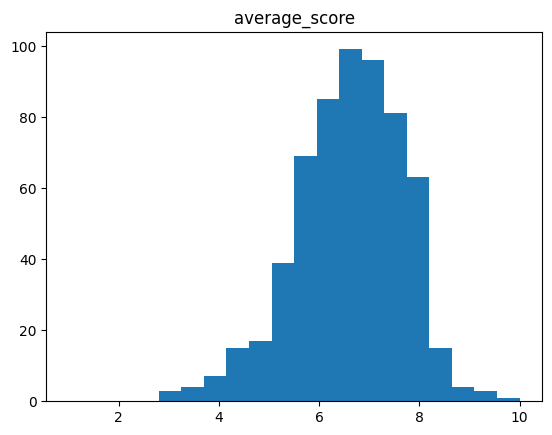

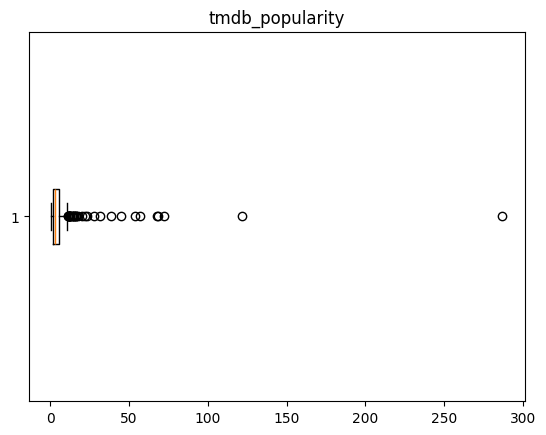

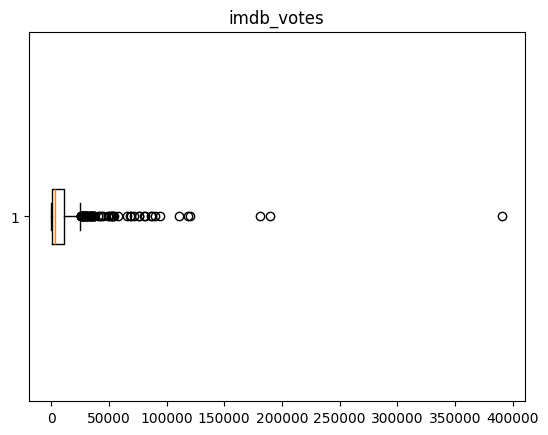

In [9]:
import matplotlib.pyplot as plt

# 2) Are there correlations between the production_countries and average_score/tmdb_popularity?

# For now, I will just split the current dataframe into multiple
# and do a univariate analysis of the average_score, tmdb_popularity, and imdb_votes
# Let's start with India
india_df = df[df['production_countries'].str.contains('IN')]
india_df.reset_index(drop=True, inplace=True)

plt.figure(1)
plt.hist(india_df['average_score'], range=(1, 10), bins=20)
plt.title('average_score')
plt.show()

plt.figure(2)
plt.boxplot(india_df['tmdb_popularity'], orientation='horizontal')
plt.title('tmdb_popularity')
plt.show()

plt.figure(3)
# Remove nan values in imdb_votes
without_nan_votes_id = india_df[india_df['imdb_votes'].notna()]
plt.boxplot(without_nan_votes_id['imdb_votes'], orientation='horizontal')
plt.title('imdb_votes')
plt.show()

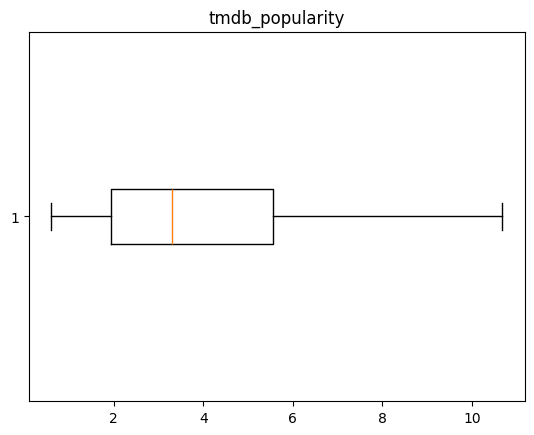

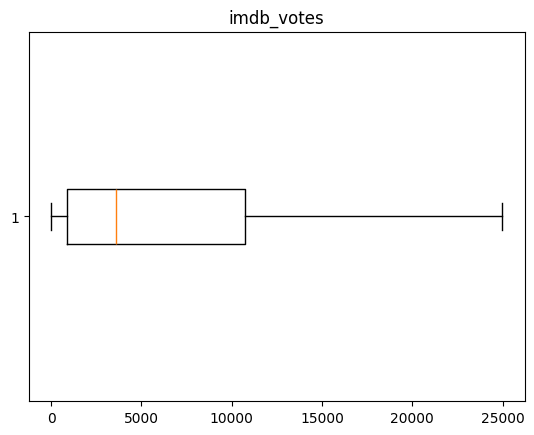

In [10]:
# Let's try removing the outlier observations in tmdb_popularity and imdb_votes
plt.figure(2)
plt.boxplot(india_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('tmdb_popularity')
plt.show()

plt.figure(3)
# Remove nan values in imdb_votes
without_nan_votes_id = india_df[india_df['imdb_votes'].notna()]
plt.boxplot(without_nan_votes_id['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('imdb_votes')
plt.show()


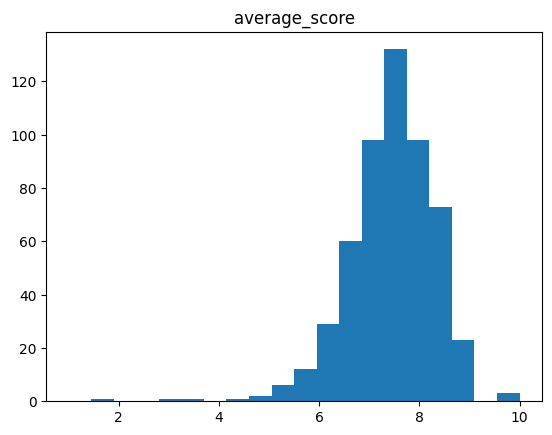

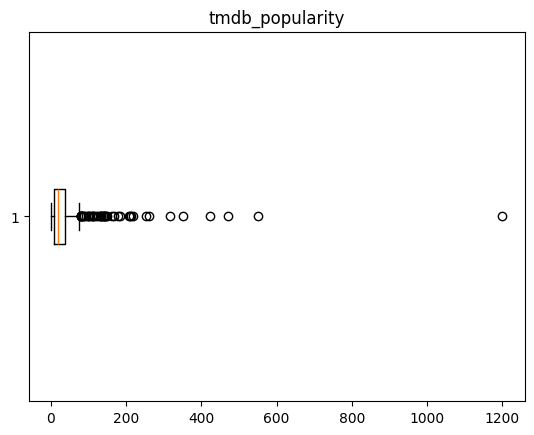

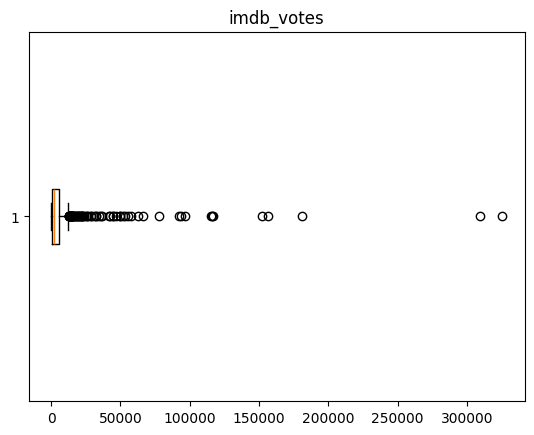

In [11]:
# Let's try this with Japan
japan_df = df[df['production_countries'].str.contains('JP')]
japan_df.reset_index(drop=True, inplace=True)

plt.figure(1)
plt.hist(japan_df['average_score'], range=(1, 10), bins=20)
plt.title('average_score')
plt.show()

plt.figure(2)
plt.boxplot(japan_df['tmdb_popularity'], orientation='horizontal')
plt.title('tmdb_popularity')
plt.show()

plt.figure(3)
# Remove nan values in imdb_votes
without_nan_votes_jp = japan_df[japan_df['imdb_votes'].notna()]
plt.boxplot(without_nan_votes_jp['imdb_votes'], orientation='horizontal')
plt.title('imdb_votes')
plt.show()

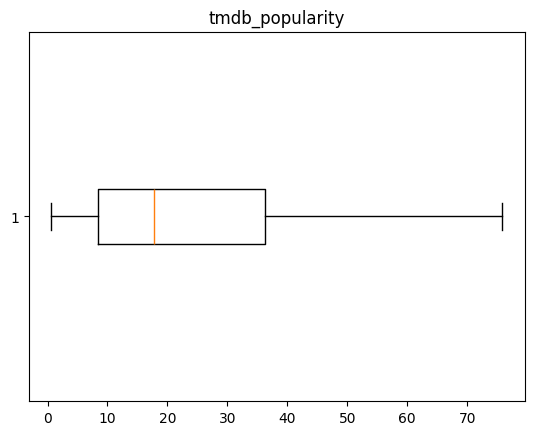

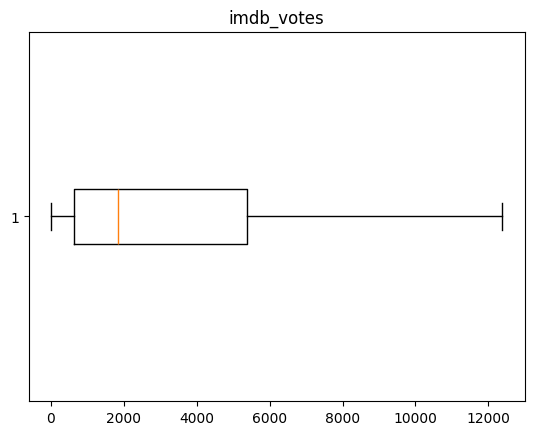

In [12]:
# Removing outliers
plt.figure(2)
plt.boxplot(japan_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('tmdb_popularity')
plt.show()

plt.figure(3)
# Remove nan values in imdb_votes
without_nan_votes_jp = japan_df[japan_df['imdb_votes'].notna()]
plt.boxplot(without_nan_votes_jp['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('imdb_votes')
plt.show()

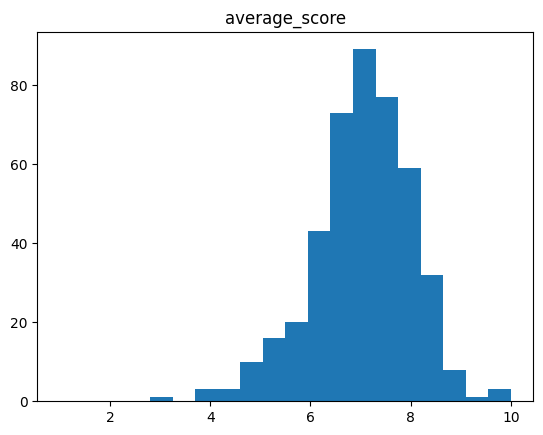

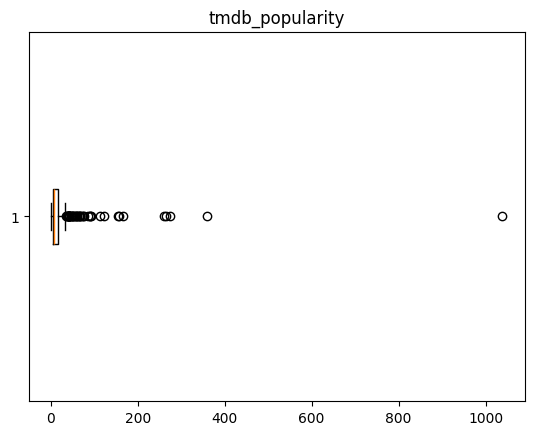

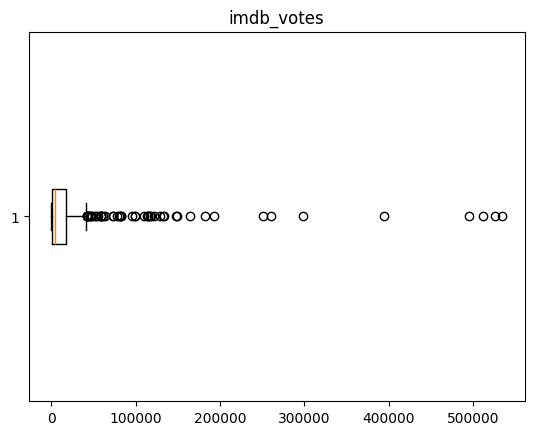

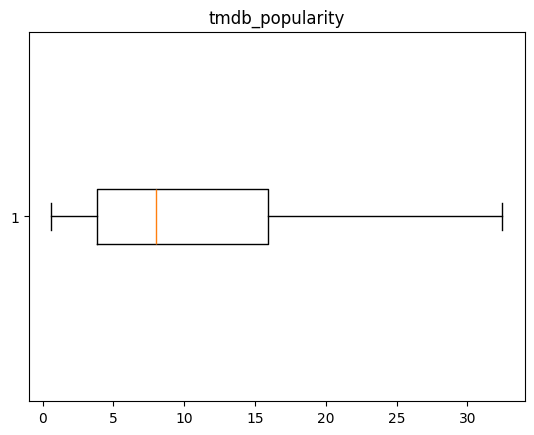

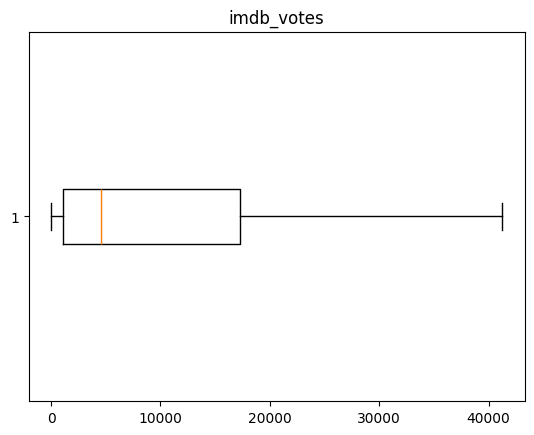

In [13]:
# Filter observations that have Great Britain as a production country.
britain_df = df[df['production_countries'].str.contains('GB')]
britain_df.reset_index(drop=True, inplace=True)

plt.figure(1)
plt.hist(britain_df['average_score'], range=(1, 10), bins=20)
plt.title('average_score')
plt.show()

plt.figure(2)
plt.boxplot(britain_df['tmdb_popularity'], orientation='horizontal')
plt.title('tmdb_popularity')
plt.show()

plt.figure(3)
# Remove nan values in imdb_votes
without_nan_votes_gb = britain_df[britain_df['imdb_votes'].notna()]
plt.boxplot(without_nan_votes_gb['imdb_votes'], orientation='horizontal')
plt.title('imdb_votes')
plt.show()

# Without outliers
plt.figure(4)
plt.boxplot(britain_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('tmdb_popularity')
plt.show()

plt.figure(5)
# Remove nan values in imdb_votes
plt.boxplot(without_nan_votes_gb['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('imdb_votes')
plt.show()

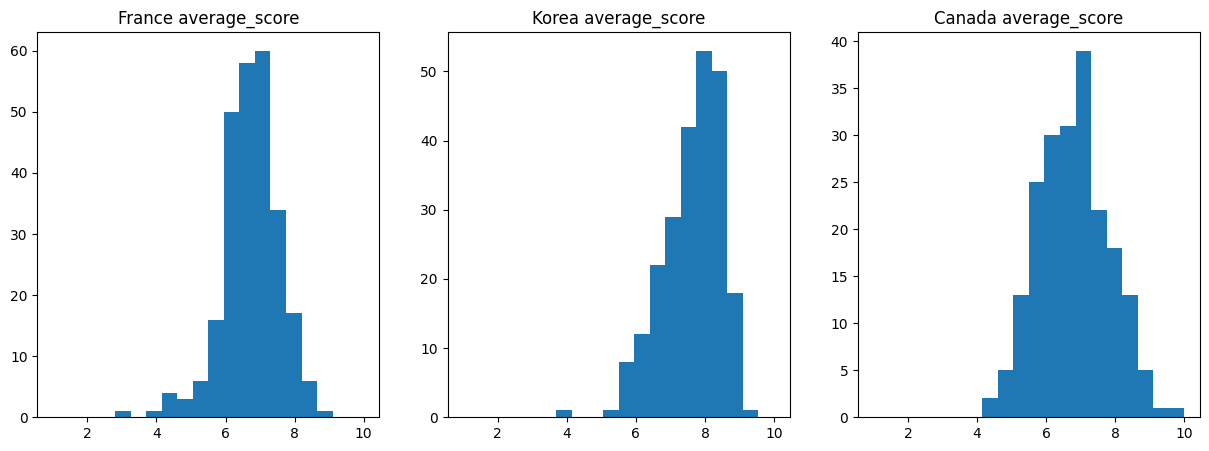

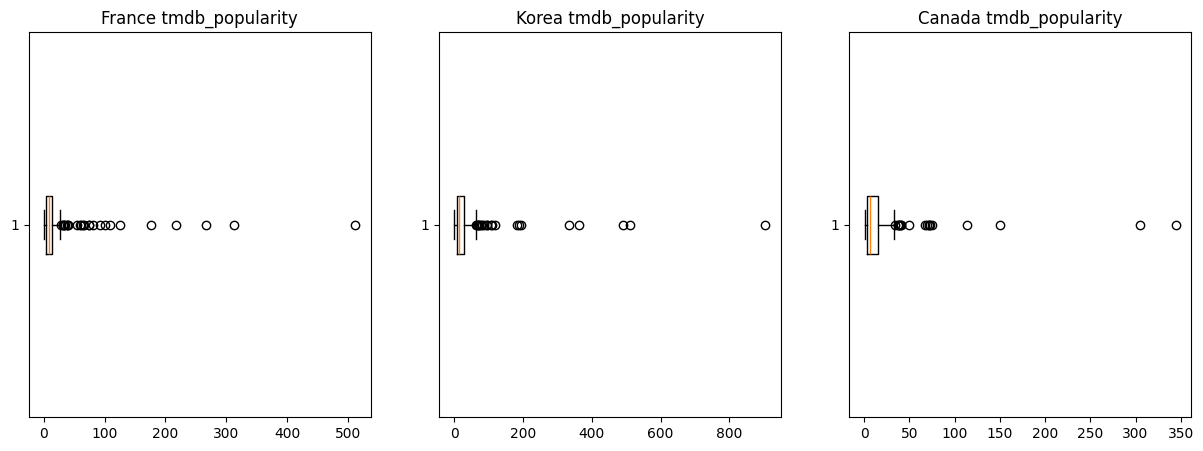

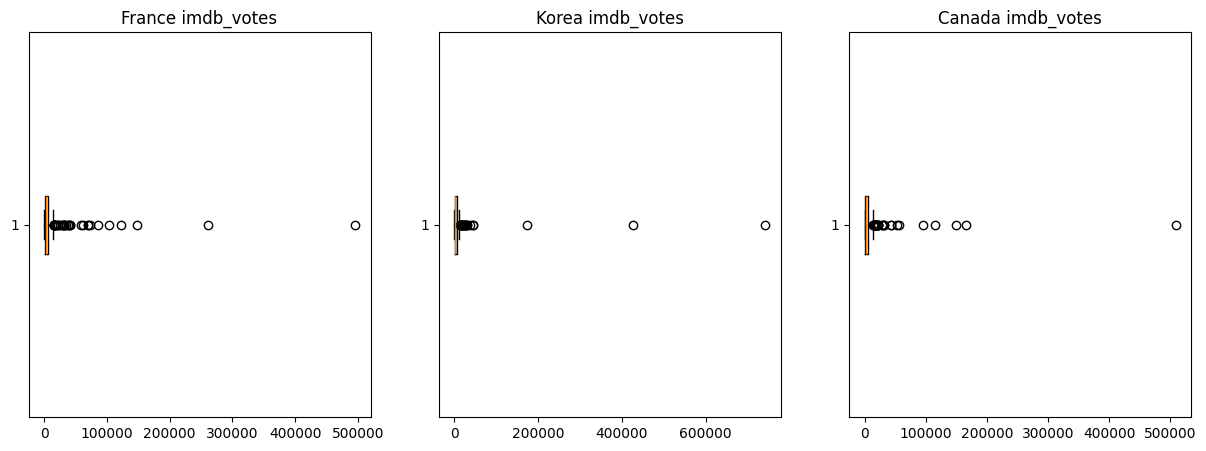

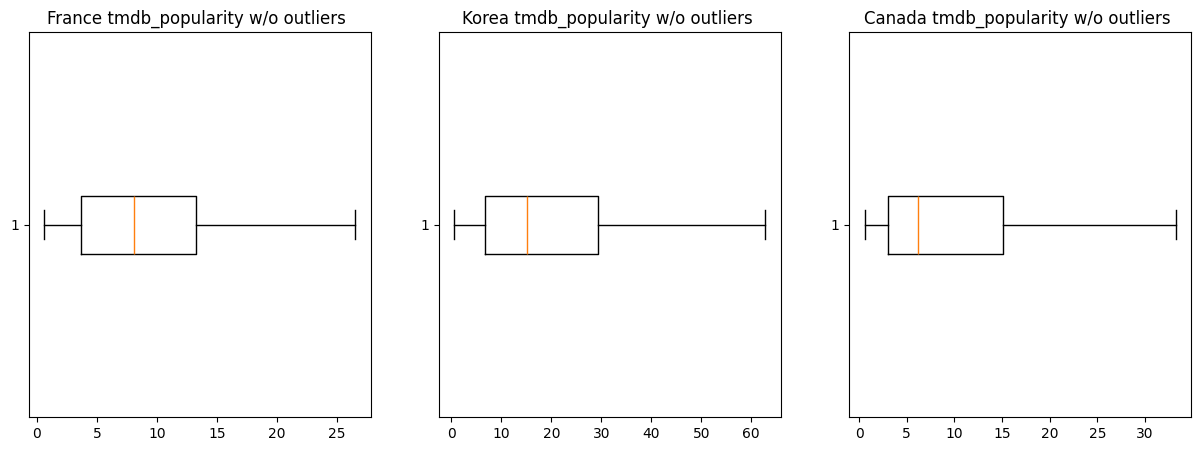

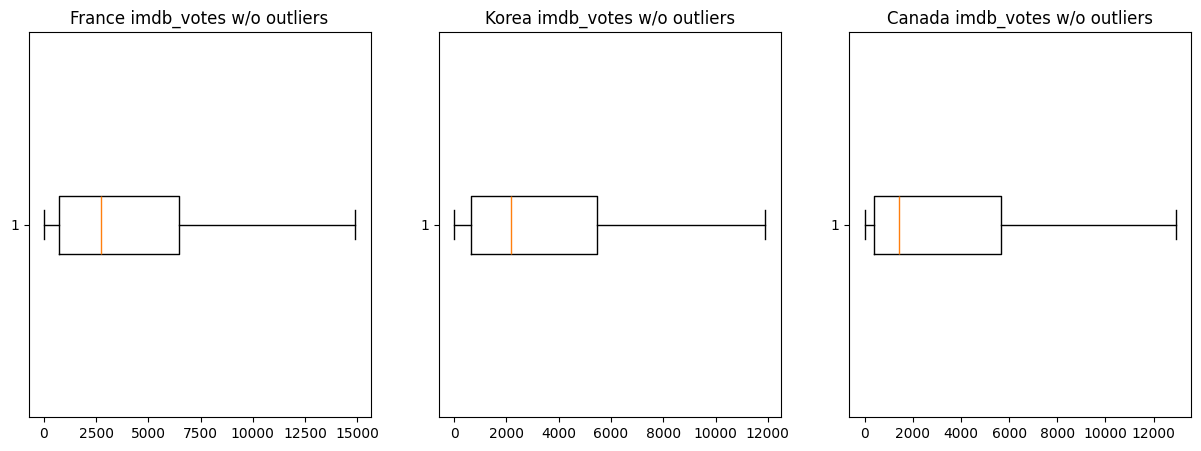

In [14]:
# Let's do the same for France, Republic of Korea, and Canada
france_df = df[df['production_countries'].str.contains('FR')]
france_df.reset_index(drop=True, inplace=True)

korea_df = df[df['production_countries'].str.contains('KR')]
korea_df.reset_index(drop=True, inplace=True)

canada_df = df[df['production_countries'].str.contains('CA')]
canada_df.reset_index(drop=True, inplace=True)

# average_score
plt.figure(1, figsize=(15, 5))
# France
plt.subplot(1, 3, 1)
plt.hist(france_df['average_score'], range=(1, 10), bins=20)
plt.title('France average_score')
# Korea
plt.subplot(1, 3, 2)
plt.hist(korea_df['average_score'], range=(1, 10), bins=20)
plt.title('Korea average_score')
# Canada
plt.subplot(1, 3, 3)
plt.hist(canada_df['average_score'], range=(1, 10), bins=20)
plt.title('Canada average_score')
plt.show()

# tmdb_popularity
plt.figure(2, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(france_df['tmdb_popularity'], orientation='horizontal')
plt.title('France tmdb_popularity')
plt.subplot(1, 3, 2)
plt.boxplot(korea_df['tmdb_popularity'], orientation='horizontal')
plt.title('Korea tmdb_popularity')
plt.subplot(1, 3, 3)
plt.boxplot(canada_df['tmdb_popularity'], orientation='horizontal')
plt.title('Canada tmdb_popularity')
plt.show()

# imdb_votes
plt.figure(3, figsize=(15, 5))
without_nan_votes_fr = france_df[france_df['imdb_votes'].notna()]
without_nan_votes_kr = korea_df[korea_df['imdb_votes'].notna()]
without_nan_votes_ca = canada_df[canada_df['imdb_votes'].notna()]
plt.subplot(1, 3, 1)
plt.boxplot(without_nan_votes_fr['imdb_votes'], orientation='horizontal')
plt.title('France imdb_votes')
plt.subplot(1, 3, 2)
plt.boxplot(without_nan_votes_kr['imdb_votes'], orientation='horizontal')
plt.title('Korea imdb_votes')
plt.subplot(1, 3, 3)
plt.boxplot(without_nan_votes_ca['imdb_votes'], orientation='horizontal')
plt.title('Canada imdb_votes')
plt.show()

# tmdb_popularity w/o outliers
plt.figure(4, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(france_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('France tmdb_popularity w/o outliers ')
plt.subplot(1, 3, 2)
plt.boxplot(korea_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('Korea tmdb_popularity w/o outliers ')
plt.subplot(1, 3, 3)
plt.boxplot(canada_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('Canada tmdb_popularity w/o outliers ')
plt.show()

# imdb_votes w/o outliers
plt.figure(5, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(without_nan_votes_fr['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('France imdb_votes w/o outliers')
plt.subplot(1, 3, 2)
plt.boxplot(without_nan_votes_kr['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('Korea imdb_votes w/o outliers')
plt.subplot(1, 3, 3)
plt.boxplot(without_nan_votes_ca['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('Canada imdb_votes w/o outliers')
plt.show()

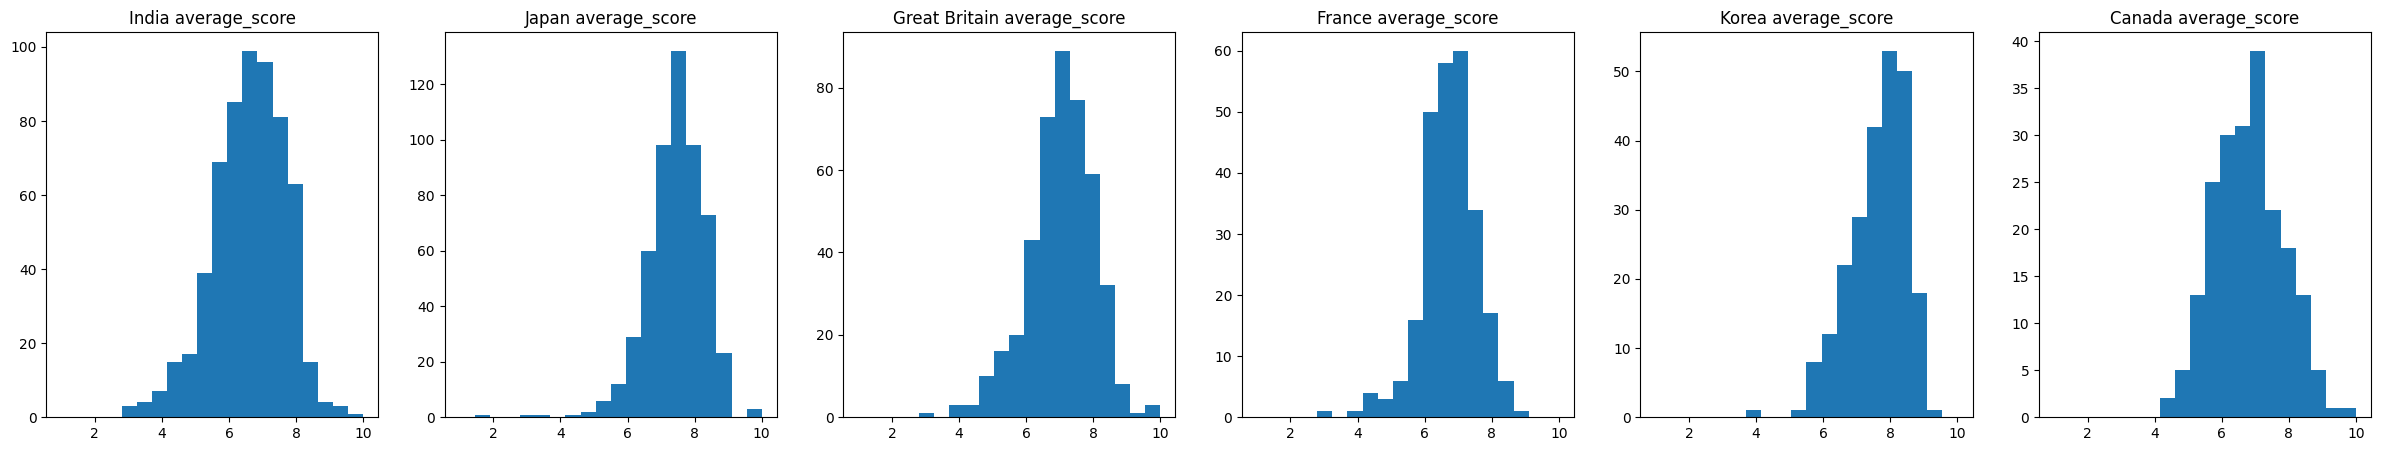

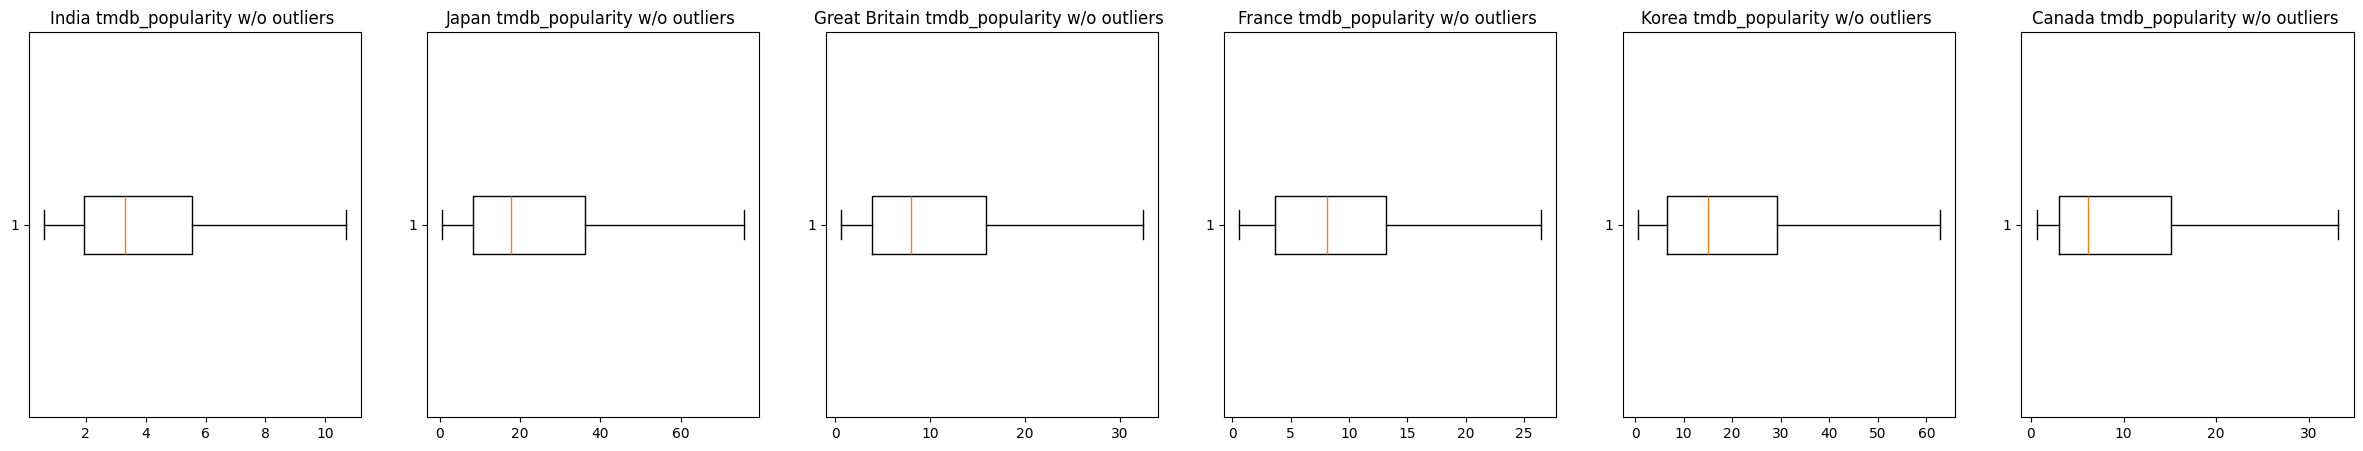

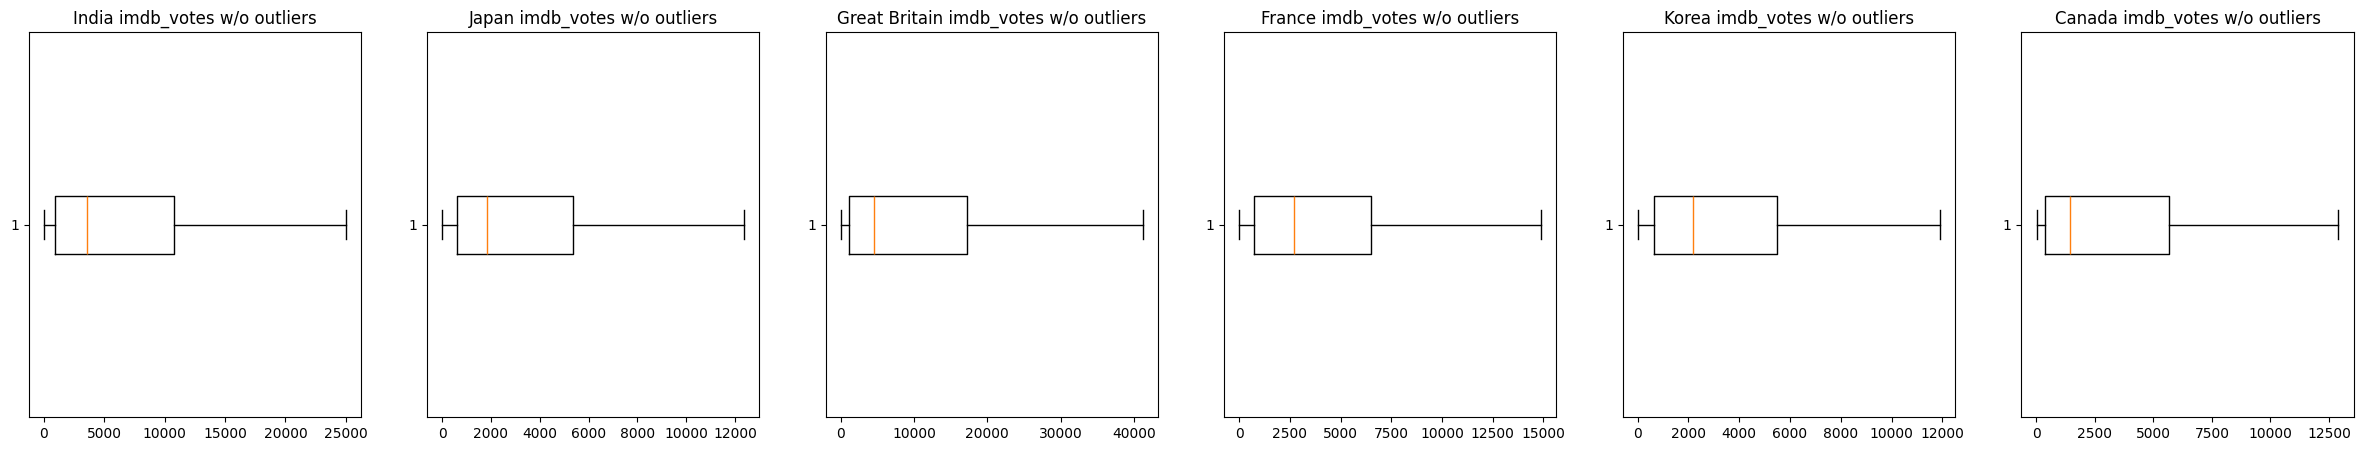

In [15]:
# Let's look at the six countries we've done so far and compare them side by side

# average_score
plt.figure(1, figsize=(30, 5))
# India
plt.subplot(1, 6, 1)
plt.hist(india_df['average_score'], range=(1, 10), bins=20)
plt.title('India average_score')
# Japan
plt.subplot(1, 6, 2)
plt.hist(japan_df['average_score'], range=(1, 10), bins=20)
plt.title('Japan average_score')
# Great Britain
plt.subplot(1, 6, 3)
plt.hist(britain_df['average_score'], range=(1, 10), bins=20)
plt.title('Great Britain average_score')
# France
plt.subplot(1, 6, 4)
plt.hist(france_df['average_score'], range=(1, 10), bins=20)
plt.title('France average_score')
# Korea
plt.subplot(1, 6, 5)
plt.hist(korea_df['average_score'], range=(1, 10), bins=20)
plt.title('Korea average_score')
# Canada
plt.subplot(1, 6, 6)
plt.hist(canada_df['average_score'], range=(1, 10), bins=20)
plt.title('Canada average_score')
plt.show()

# tmdb_popularity w/o outliers
plt.figure(2, figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.boxplot(india_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('India tmdb_popularity w/o outliers ')
plt.subplot(1, 6, 2)
plt.boxplot(japan_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('Japan tmdb_popularity w/o outliers ')
plt.subplot(1, 6, 3)
plt.boxplot(britain_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('Great Britain tmdb_popularity w/o outliers ')
plt.subplot(1, 6, 4)
plt.boxplot(france_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('France tmdb_popularity w/o outliers ')
plt.subplot(1, 6, 5)
plt.boxplot(korea_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('Korea tmdb_popularity w/o outliers ')
plt.subplot(1, 6, 6)
plt.boxplot(canada_df['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('Canada tmdb_popularity w/o outliers ')
plt.show()

# imdb_votes w/o outliers
plt.figure(5, figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.boxplot(without_nan_votes_id['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('India imdb_votes w/o outliers')
plt.subplot(1, 6, 2)
plt.boxplot(without_nan_votes_jp['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('Japan imdb_votes w/o outliers')
plt.subplot(1, 6, 3)
plt.boxplot(without_nan_votes_gb['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('Great Britain imdb_votes w/o outliers')
plt.subplot(1, 6, 4)
plt.boxplot(without_nan_votes_fr['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('France imdb_votes w/o outliers')
plt.subplot(1, 6, 5)
plt.boxplot(without_nan_votes_kr['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('Korea imdb_votes w/o outliers')
plt.subplot(1, 6, 6)
plt.boxplot(without_nan_votes_ca['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('Canada imdb_votes w/o outliers')
plt.show()

In [ ]:
'''
Clearly, there are differences in the distributions of average_score, tmdb_popularity, and imdb_votes between the six countries.
Maybe certain countries appeal to more audiences than others.
Some observations:
- The max for Japan and Korea tmdb_popularity w/o outliers is nearly double all other shown country's max tmdb_popularity
- Average score for all shown countries is centered between 6 and 8, with Korea being a borderline 8
- Right skew for tmdb_popularity and imdb_votes w/o outliers shared by all countries
- Great Britain and India having a considerably higher max for imdb_votes w/o outliers
'''

"\nClearly, there are differences in the distributions of average_score, tmdb_popularity, and imdb_votes between the six countries.\nMaybe certain countries appeal to more audiences than others.\nSome observations:\n- The max for Japan and Korea tmdb_popularity w/o outliers is nearly double all other shown country's max tmdb_popularity\n- Average score for all shown countries is centered between 6 and 8, with Korea being a borderline 8\n- Right skew for tmdb_popularity and imdb_votes w/o outliers shared by all countries\n- Great Britain and India having a considerably higher max for imdb_votes w/o outliers\n"

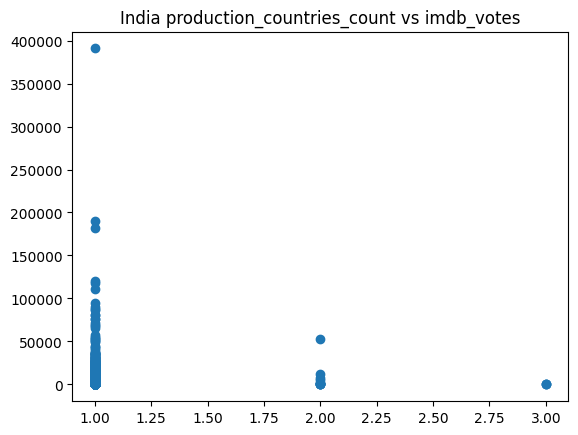

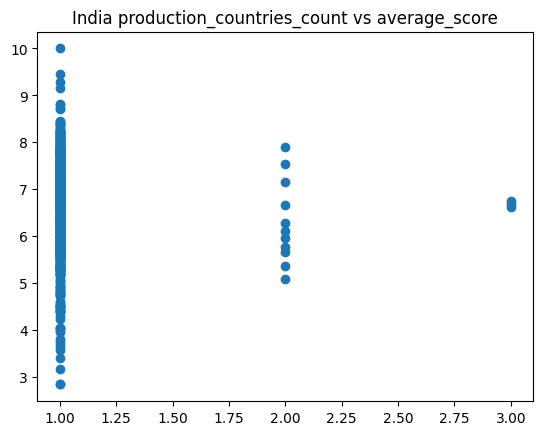

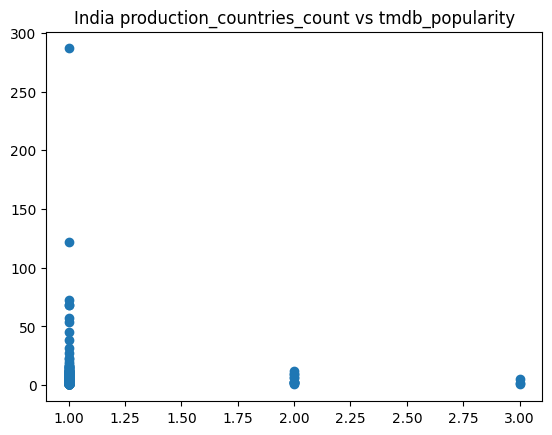

In [16]:
# 3) and 4)

# Let's use a scatter plot to visualize production_countries_count and imdb_votes/average_score_/tmdb_popularity
# Using the dataframe containing India-produced stuff
plt.figure()
plt.scatter(india_df['production_countries_count'], india_df['imdb_votes'])
plt.title('India production_countries_count vs imdb_votes')
plt.show()

plt.figure()
plt.scatter(india_df['production_countries_count'], india_df['average_score'])
plt.title('India production_countries_count vs average_score')
plt.show()

plt.figure()
plt.scatter(india_df['production_countries_count'], india_df['tmdb_popularity'])
plt.title('India production_countries_count vs tmdb_popularity')
plt.show()
# Again, these graphs indicate that most movies/shows coming from India are produced strictly in India
# (assuming they weren't also produced in the US)

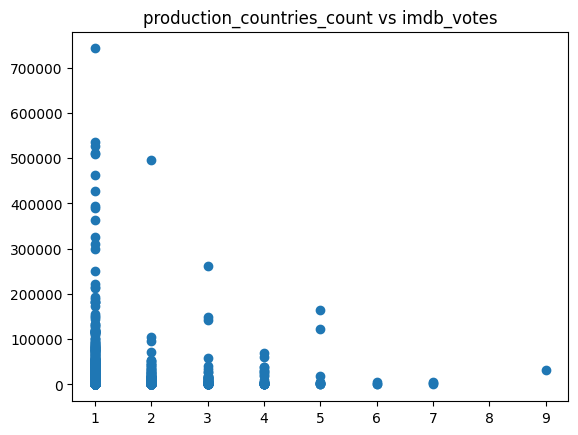

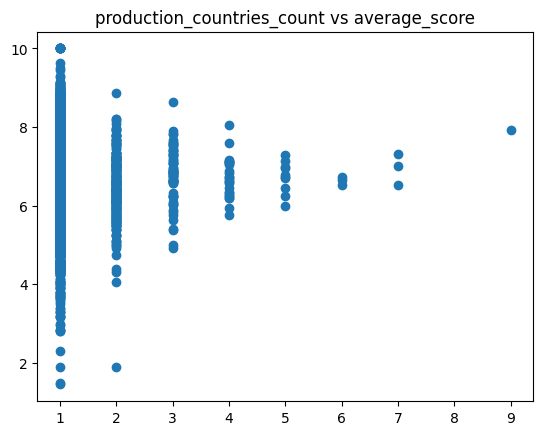

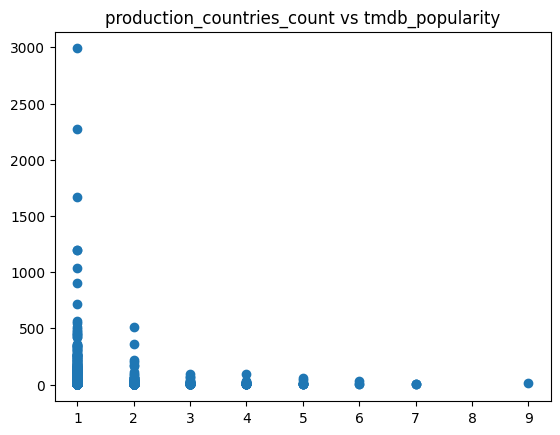

In [17]:
# Let's try with the original dataframe
plt.figure()
plt.scatter(df['production_countries_count'], df['imdb_votes'])
plt.title('production_countries_count vs imdb_votes')
plt.show()

plt.figure()
plt.scatter(df['production_countries_count'], df['average_score'])
plt.title('production_countries_count vs average_score')
plt.show()

plt.figure()
plt.scatter(df['production_countries_count'], df['tmdb_popularity'])
plt.title('production_countries_count vs tmdb_popularity')
plt.show()

In [18]:
# Just curious, check correlation matrix between production_countries_count and genres_count
print(df[['production_countries_count', 'genres_count']].corr())
# Very weak positive correlation

# What about production_countries_count and average_score
df[['production_countries_count', 'average_score']].corr()
# Very weak negative correlation

                            production_countries_count  genres_count
production_countries_count                    1.000000      0.021774
genres_count                                  0.021774      1.000000


,production_countries_count,average_score
production_countries_count,1.00000,-0.05805
average_score,-0.05805,1.00000


Text(0.5, 1.0, 'Great Britain production_countries_count vs imdb_votes')

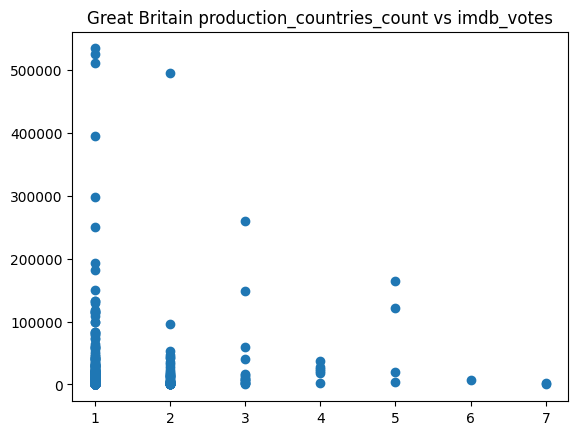

In [19]:
# Filter observations that have Great Britain as a production country.
britain_df = df[df['production_countries'].str.contains('GB')]
britain_df.reset_index(drop=True, inplace=True)

# Scatterplot of production_countries_count against imdb_votes
plt.figure()
plt.scatter(britain_df['production_countries_count'], britain_df['imdb_votes'])
plt.title('Great Britain production_countries_count vs imdb_votes')

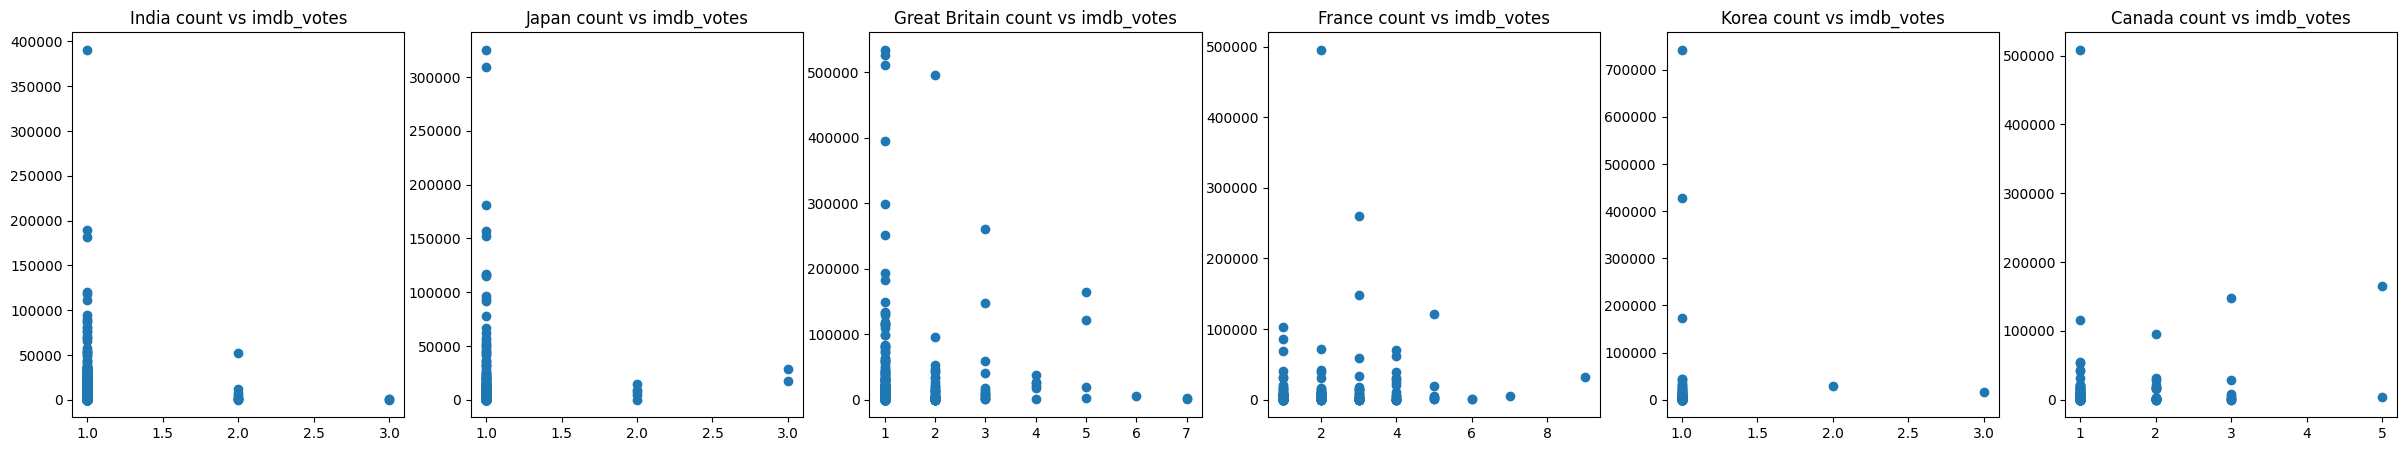

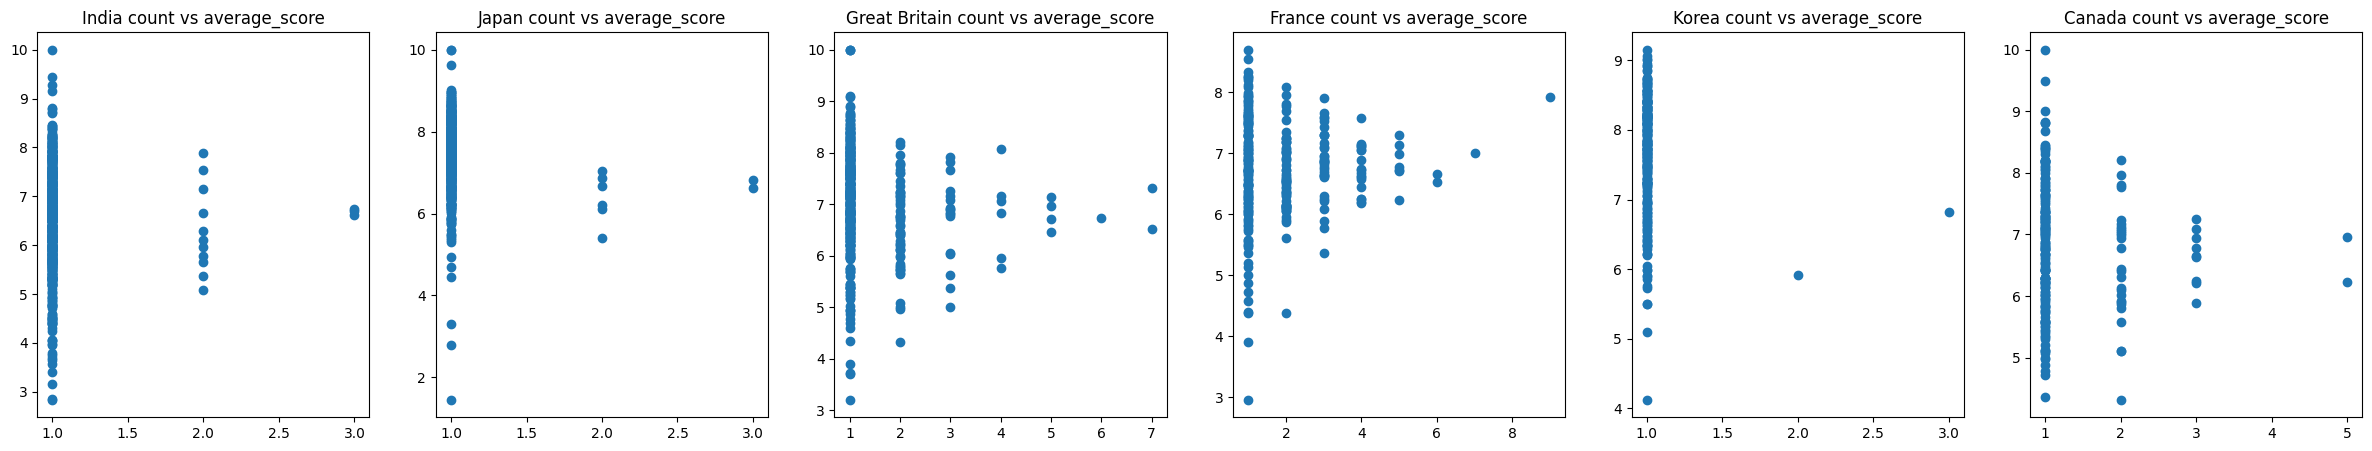

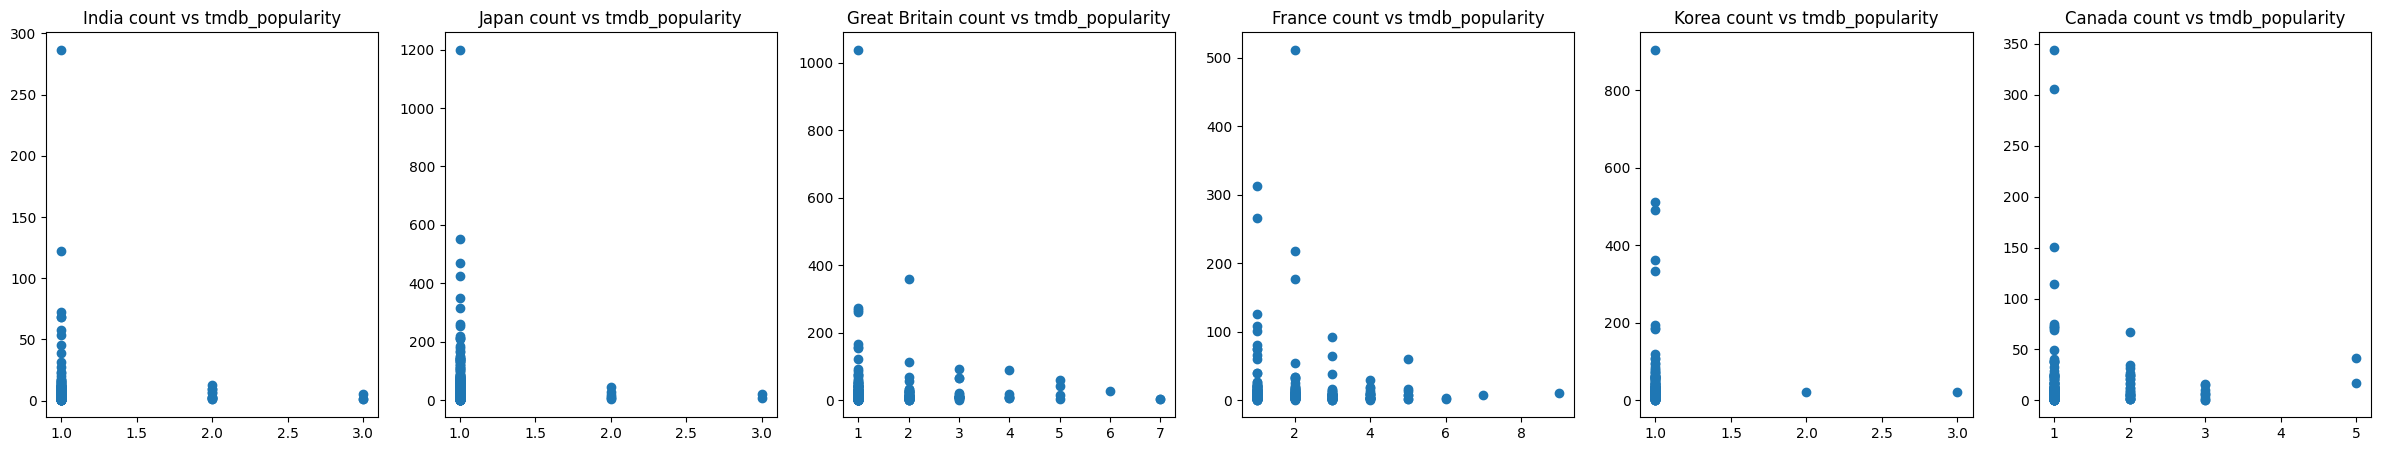

In [20]:
# Let's create scatterplot for production_countries_count vs imdb_votes, average_score, and tmdb_popularity
# for the six countries used in the previous sections

# production_countries_count vs imdb_votes
plt.figure(1, figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.scatter(india_df['production_countries_count'], india_df['imdb_votes'])
plt.title('India count vs imdb_votes')
plt.subplot(1, 6, 2)
plt.scatter(japan_df['production_countries_count'], japan_df['imdb_votes'])
plt.title('Japan count vs imdb_votes')
plt.subplot(1, 6, 3)
plt.scatter(britain_df['production_countries_count'], britain_df['imdb_votes'])
plt.title('Great Britain count vs imdb_votes')
plt.subplot(1, 6, 4)
plt.scatter(france_df['production_countries_count'], france_df['imdb_votes'])
plt.title('France count vs imdb_votes')
plt.subplot(1, 6, 5)
plt.scatter(korea_df['production_countries_count'], korea_df['imdb_votes'])
plt.title('Korea count vs imdb_votes')
plt.subplot(1, 6, 6)
plt.scatter(canada_df['production_countries_count'], canada_df['imdb_votes'])
plt.title('Canada count vs imdb_votes')
plt.show()

# production_countries_count vs average_score
plt.figure(2, figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.scatter(india_df['production_countries_count'], india_df['average_score'])
plt.title('India count vs average_score')
plt.subplot(1, 6, 2)
plt.scatter(japan_df['production_countries_count'], japan_df['average_score'])
plt.title('Japan count vs average_score')
plt.subplot(1, 6, 3)
plt.scatter(britain_df['production_countries_count'], britain_df['average_score'])
plt.title('Great Britain count vs average_score')
plt.subplot(1, 6, 4)
plt.scatter(france_df['production_countries_count'], france_df['average_score'])
plt.title('France count vs average_score')
plt.subplot(1, 6, 5)
plt.scatter(korea_df['production_countries_count'], korea_df['average_score'])
plt.title('Korea count vs average_score')
plt.subplot(1, 6, 6)
plt.scatter(canada_df['production_countries_count'], canada_df['average_score'])
plt.title('Canada count vs average_score')
plt.show()

# production_countries_count vs tmdb_popularity
plt.figure(3, figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.scatter(india_df['production_countries_count'], india_df['tmdb_popularity'])
plt.title('India count vs tmdb_popularity')
plt.subplot(1, 6, 2)
plt.scatter(japan_df['production_countries_count'], japan_df['tmdb_popularity'])
plt.title('Japan count vs tmdb_popularity')
plt.subplot(1, 6, 3)
plt.scatter(britain_df['production_countries_count'], britain_df['tmdb_popularity'])
plt.title('Great Britain count vs tmdb_popularity')
plt.subplot(1, 6, 4)
plt.scatter(france_df['production_countries_count'], france_df['tmdb_popularity'])
plt.title('France count vs tmdb_popularity')
plt.subplot(1, 6, 5)
plt.scatter(korea_df['production_countries_count'], korea_df['tmdb_popularity'])
plt.title('Korea count vs tmdb_popularity')
plt.subplot(1, 6, 6)
plt.scatter(canada_df['production_countries_count'], canada_df['tmdb_popularity'])
plt.title('Canada count vs tmdb_popularity')
plt.show()

In [ ]:
'''
As one can see, there are differences in the distributions of average_score, tmdb_popularity, and imdb_votes between the six countries.
Some observations:
- Great Britain and France have a fair number of movies/shows that have involved more than 3 production countries (Canada somewhat included as well).
- India, Japan, and Korea have been used in productions involving 3 countries, though it appears Korea has strictly single-country productions.
'''

'\nAs one can see, there are differences in the distributions of average_score, tmdb_popularity, and imdb_votes between the six countries.\nSome observations:\n- Great Britain and France have a fair number of movies/shows that have involved more than 3 production countries (Canada somewhat included as well).\n- India, Japan, and Korea have been used in productions involving 3 countries, though it appears Korea has strictly single-country productions.\n'

In [21]:
# 5) Check whether more shows or movies come from a country

# Let's do this for the top countries that been part of a movie/show's production countries

# Divide df into movies only and shows only
movies_df = df[df['type'] == 'MOVIE']
shows_df = df[df['type'] == 'SHOW']
movies_df.reset_index(drop=True, inplace=True)
shows_df.reset_index(drop=True, inplace=True)

# Get the unique country codes (singular, not the full list)
# And compute their frequency
unique_codes_movies_dict = {}
for i in range(len(movies_df)):
    obs = movies_df.loc[i, 'production_countries']
    # Convert to a list
    string = ast.literal_eval(obs)
    for code in string:
      # If unique, add it to the dictionary, otherwise, increment the existing key/value pair
      if code not in unique_codes_movies_dict:
        unique_codes_movies_dict[code] = 1;
      else:
        unique_codes_movies_dict[code] += 1;

# Same, but for shows_df
unique_codes_shows_dict = {}
for i in range(len(shows_df)):
    obs = shows_df.loc[i, 'production_countries']
    string = ast.literal_eval(obs)
    for code in string:
      if code not in unique_codes_shows_dict:
        unique_codes_shows_dict[code] = 1;
      else:
        unique_codes_shows_dict[code] += 1;

In [22]:
# The dictionary by frequency value (most to least)
frequency_movies_dict = dict(sorted(unique_codes_movies_dict.items(), key=lambda x: x[1], reverse=True))
frequency_shows_dict = dict(sorted(unique_codes_shows_dict.items(), key=lambda x: x[1], reverse=True))

print('Top 20 countries that produced the most movies:')
# Output the top twenty countries that have appeared in movies/shows
freq_list = list(frequency_movies_dict.items())
for i in range(20):
  print(freq_list[i])

print('\n')

print('Top 20 countries that produced the most shows:')
# Output the top twenty countries that have appeared in movies/shows
freq_list = list(frequency_shows_dict.items())
for i in range(20):
  print(freq_list[i])

# Interesting observations:
# - A majority of the stuff produced by India are movies.
# - Meanwhile opposite is true for Japan
# - Great Britain seems to a good split between shows and movies.

Top 20 countries that produced the most movies:
('IN', 557)
('GB', 209)
('FR', 196)
('ES', 129)
('CA', 128)
('JP', 119)
('DE', 102)
('PH', 80)
('MX', 76)
('TR', 62)
('IT', 60)
('BR', 59)
('BE', 58)
('ID', 57)
('NG', 56)
('KR', 53)
('AR', 50)
('AU', 45)
('EG', 41)
('CN', 40)


Top 20 countries that produced the most shows:
('JP', 421)
('GB', 229)
('KR', 184)
('CA', 77)
('ES', 76)
('FR', 61)
('AU', 58)
('MX', 50)
('CN', 44)
('IN', 44)
('DE', 40)
('BR', 40)
('TW', 40)
('CO', 26)
('IT', 23)
('TR', 22)
('TH', 20)
('AR', 19)
('PL', 13)
('BE', 12)


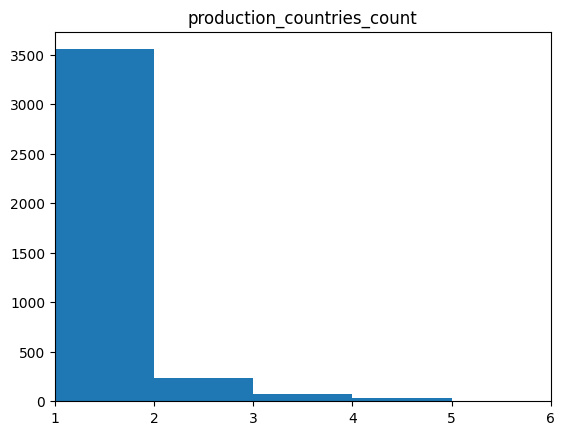

In [23]:
# Histogram for production_countries_count (from 1 to 5) for entire dataframe
plt.hist(df['production_countries_count'], range=(0, 5), bins=5)
plt.title('production_countries_count')
plt.xlim(1, 6)
plt.show()

In [25]:
# Is there a correlation between production_countries_count and score_difference?
df[['production_countries_count', 'score_difference']].corr()
# Doesn't seem that strong.

,production_countries_count,score_difference
production_countries_count,1.000000,0.045379
score_difference,0.045379,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   title                            3906 non-null   object 
 1   type                             3906 non-null   object 
 2   release_year                     3906 non-null   int64  
 3   age_certification                1973 non-null   object 
 4   runtime                          3906 non-null   int64  
 5   genres                           3906 non-null   object 
 6   production_countries             3906 non-null   object 
 7   seasons                          1620 non-null   float64
 8   imdb_score                       3663 non-null   float64
 9   imdb_votes                       3658 non-null   float64
 10  tmdb_popularity                  3906 non-null   float64
 11  normalized_tmdb_score            3773 non-null   float64
 12  top_genres          

In [27]:
# Just checking correlations for IMDB/TMDB-related variables
# These may be unrelated to production countries, but are worth considering
print(df[['imdb_votes', 'imdb_score']].corr())
print(df[['imdb_votes', 'tmdb_popularity']].corr())
print(df[['imdb_votes', 'normalized_tmdb_score']].corr())
print(df[['imdb_score', 'normalized_tmdb_score']].corr())
print(df[['average_score', 'tmdb_popularity']].corr())
print(df[['imdb_votes', 'score_difference']].corr())
print(df[['production_countries_count', 'imdb_votes']].corr())

            imdb_votes  imdb_score
imdb_votes    1.000000    0.212533
imdb_score    0.212533    1.000000
                 imdb_votes  tmdb_popularity
imdb_votes         1.000000         0.133358
tmdb_popularity    0.133358         1.000000
                       imdb_votes  normalized_tmdb_score
imdb_votes               1.000000               0.129718
normalized_tmdb_score    0.129718               1.000000
                       imdb_score  normalized_tmdb_score
imdb_score                1.00000                0.57688
normalized_tmdb_score     0.57688                1.00000
                 average_score  tmdb_popularity
average_score          1.00000          0.06099
tmdb_popularity        0.06099          1.00000
                  imdb_votes  score_difference
imdb_votes          1.000000          0.109058
score_difference    0.109058          1.000000
                            production_countries_count  imdb_votes
production_countries_count                    1.000000    0.036985

In [28]:
# For 6), I will work with three countries, Great Britain, France, and Canada and separate them into two dataframes:
# One where the country is the only producer and another where it is not
britain_df_1 = britain_df[britain_df['production_countries_count'] == 1]
britain_df_2 = britain_df[britain_df['production_countries_count'] != 1]
britain_df_1.reset_index(drop=True, inplace=True)
britain_df_2.reset_index(drop=True, inplace=True)
# Output how many observations are in these two dataframes
print('GB sole:', britain_df_1.shape)
print('GB multi:', britain_df_2.shape)

france_df_1 = france_df[france_df['production_countries_count'] == 1]
france_df_2 = france_df[france_df['production_countries_count'] != 1]
france_df_1.reset_index(drop=True, inplace=True)
france_df_2.reset_index(drop=True, inplace=True)
print('FR sole:', france_df_1.shape)
print('FR multi:', france_df_2.shape)

canada_df_1 = canada_df[canada_df['production_countries_count'] == 1]
canada_df_2 = canada_df[canada_df['production_countries_count'] != 1]
canada_df_1.reset_index(drop=True, inplace=True)
canada_df_2.reset_index(drop=True, inplace=True)
print('CA sole:', canada_df_1.shape)
print('CA multi:', canada_df_2.shape)


GB sole: (354, 20)
GB multi: (84, 20)
FR sole: (132, 20)
FR multi: (125, 20)
CA sole: (167, 20)
CA multi: (38, 20)


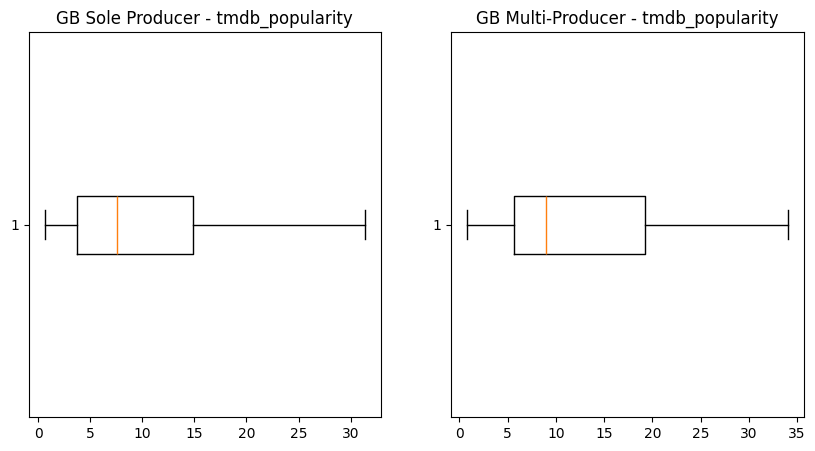

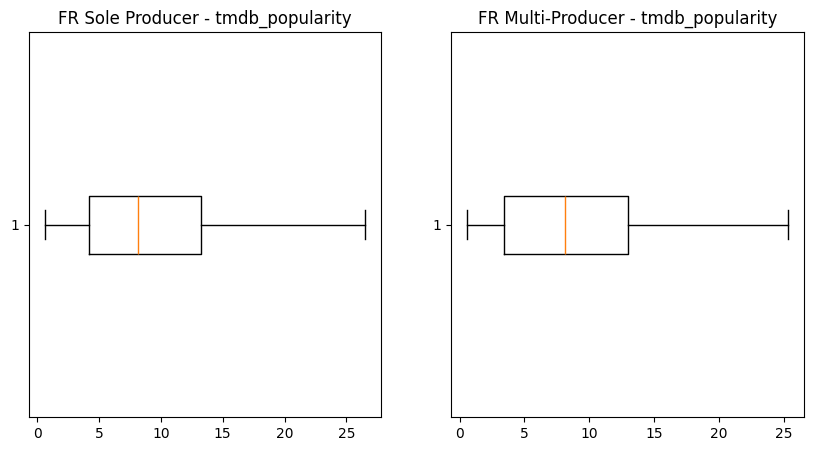

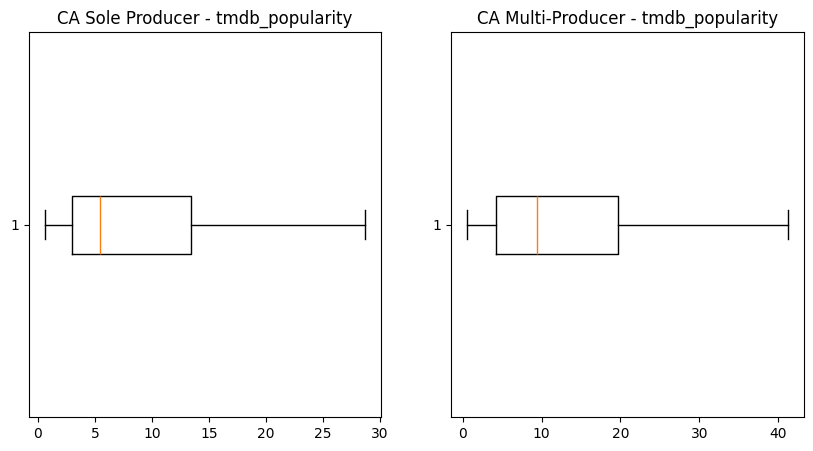

In [29]:
# Next, compare the distributions of tmdb_popularity between the two dataframes for each country

# Great Britain
plt.figure(1, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(britain_df_1['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('GB Sole Producer - tmdb_popularity')
plt.subplot(1, 2, 2)
plt.boxplot(britain_df_2['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('GB Multi-Producer - tmdb_popularity')
plt.show()

# France
plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(france_df_1['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('FR Sole Producer - tmdb_popularity')
plt.subplot(1, 2, 2)
plt.boxplot(france_df_2['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('FR Multi-Producer - tmdb_popularity')
plt.show()

# Canada
plt.figure(3, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(canada_df_1['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('CA Sole Producer - tmdb_popularity')
plt.subplot(1, 2, 2)
plt.boxplot(canada_df_2['tmdb_popularity'], orientation='horizontal', showfliers=False)
plt.title('CA Multi-Producer - tmdb_popularity')
plt.show()

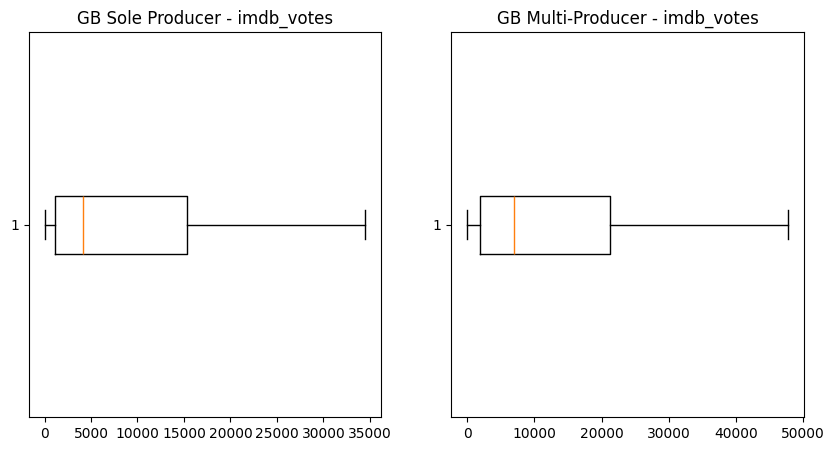

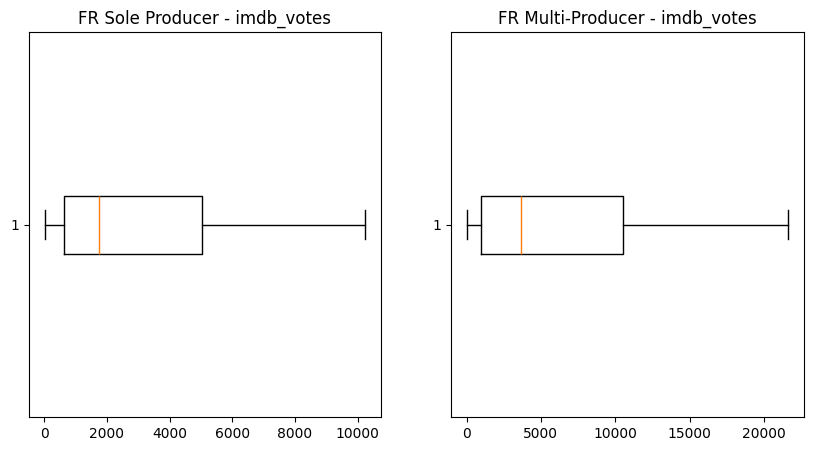

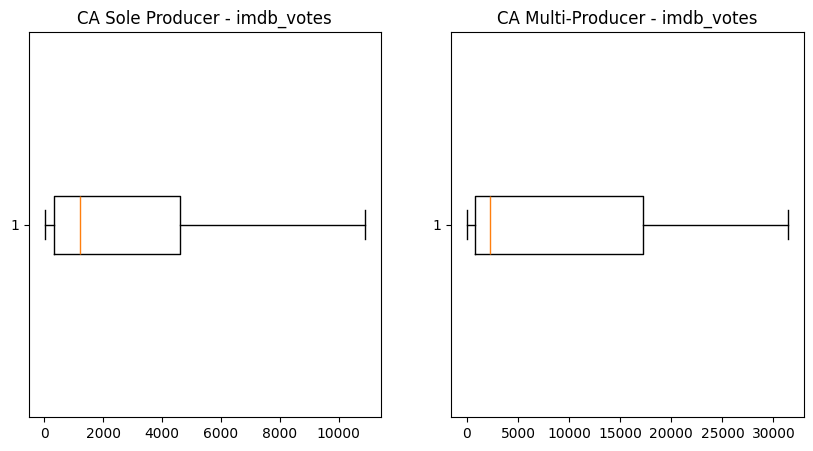

In [32]:
# Not much here, what about imdb_votes?
# Great Britain
temp1 = britain_df_1[britain_df_1['imdb_votes'].notna()]
temp2 = britain_df_2[britain_df_2['imdb_votes'].notna()]
plt.figure(1, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(temp1['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('GB Sole Producer - imdb_votes')
plt.subplot(1, 2, 2)
plt.boxplot(temp2['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('GB Multi-Producer - imdb_votes')
plt.show()

# France
temp1 = france_df_1[france_df_1['imdb_votes'].notna()]
temp2 = france_df_2[france_df_2['imdb_votes'].notna()]
plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(temp1['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('FR Sole Producer - imdb_votes')
plt.subplot(1, 2, 2)
plt.boxplot(temp2['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('FR Multi-Producer - imdb_votes')
plt.show()

# Canada
temp1 = canada_df_1[canada_df_1['imdb_votes'].notna()]
temp2 = canada_df_2[canada_df_2['imdb_votes'].notna()]
plt.figure(3, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(temp1['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('CA Sole Producer - imdb_votes')
plt.subplot(1, 2, 2)
plt.boxplot(temp2['imdb_votes'], orientation='horizontal', showfliers=False)
plt.title('CA Multi-Producer - imdb_votes')
plt.show()

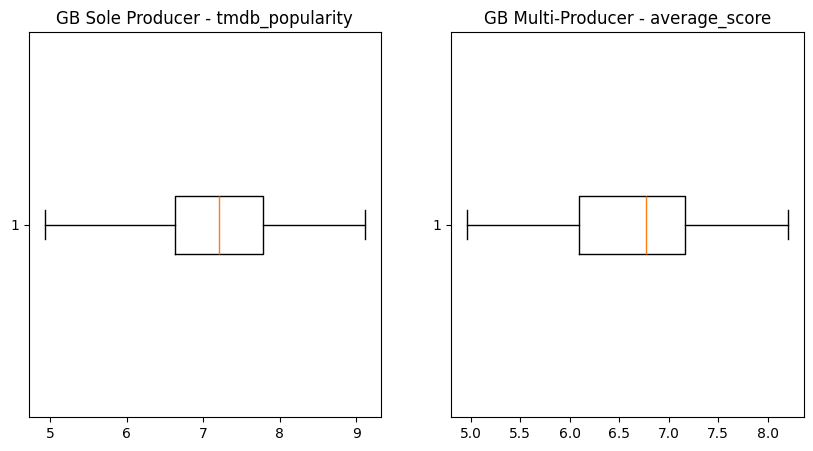

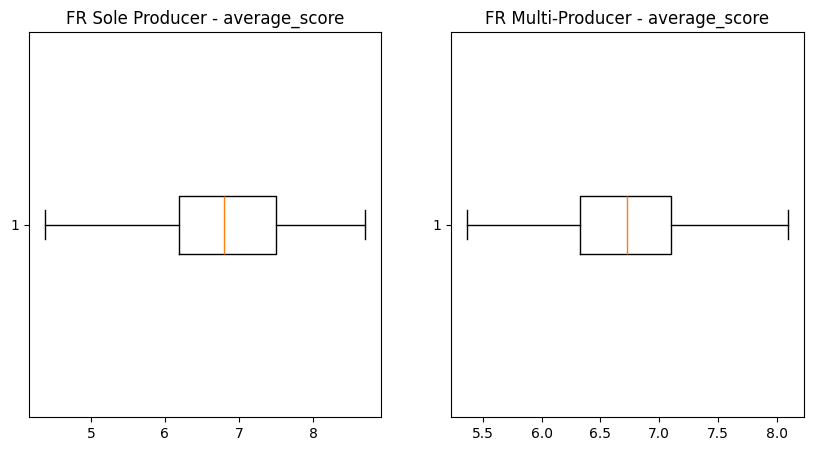

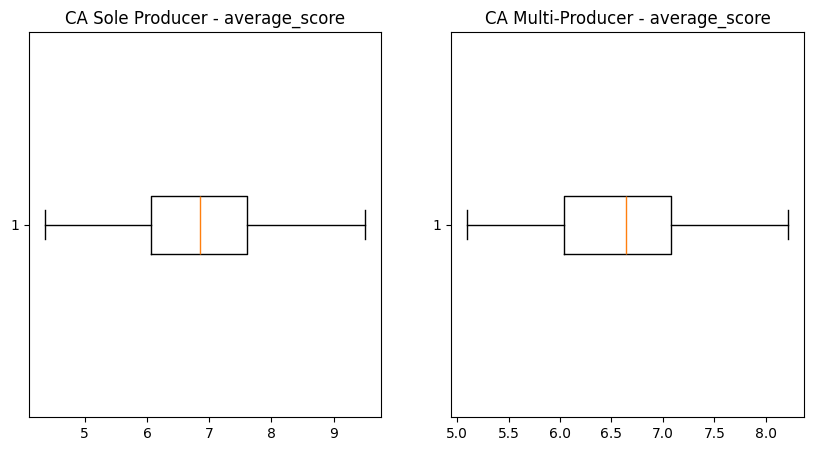

In [33]:
# Interesting observation -- seems that multi-produced movies/shows have higher imdb_votes values than single-country produced

# Just for fun, let's do this for average_score
# Great Britain
plt.figure(1, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(britain_df_1['average_score'], orientation='horizontal', showfliers=False)
plt.title('GB Sole Producer - tmdb_popularity')
plt.subplot(1, 2, 2)
plt.boxplot(britain_df_2['average_score'], orientation='horizontal', showfliers=False)
plt.title('GB Multi-Producer - average_score')
plt.show()

# France
plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(france_df_1['average_score'], orientation='horizontal', showfliers=False)
plt.title('FR Sole Producer - average_score')
plt.subplot(1, 2, 2)
plt.boxplot(france_df_2['average_score'], orientation='horizontal', showfliers=False)
plt.title('FR Multi-Producer - average_score')
plt.show()

# Canada
plt.figure(3, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(canada_df_1['average_score'], orientation='horizontal', showfliers=False)
plt.title('CA Sole Producer - average_score')
plt.subplot(1, 2, 2)
plt.boxplot(canada_df_2['average_score'], orientation='horizontal', showfliers=False)
plt.title('CA Multi-Producer - average_score')
plt.show()

# Nothing really stands out, other than the fact that multi-producer boxplots have a slightly smaller
# range compared to their sole-producer counterparts. This could be attributed to the smaller number
# of multi-produced movies/shows for Great Britain and Canada.

In [ ]:
'''
Continuation of correlations between production countries and "x" factor about movie/show
(e.g., average_score, tmdb_popularity, imdb_votes). We will try creating a heatmap to
visualize the relationship between production country pairs.
'''

'\nContinuation of correlations between production countries and "x" factor about movie/show\n(e.g., average_score, tmdb_popularity, imdb_votes). We will try creating a heatmap to\nvisualize the relationship between production country pairs.\n'

<ipython-input-36-77100c57dd67>:23: RuntimeWarning: Mean of empty slice
  [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],


<Axes: xlabel='country_2', ylabel='country_1'>

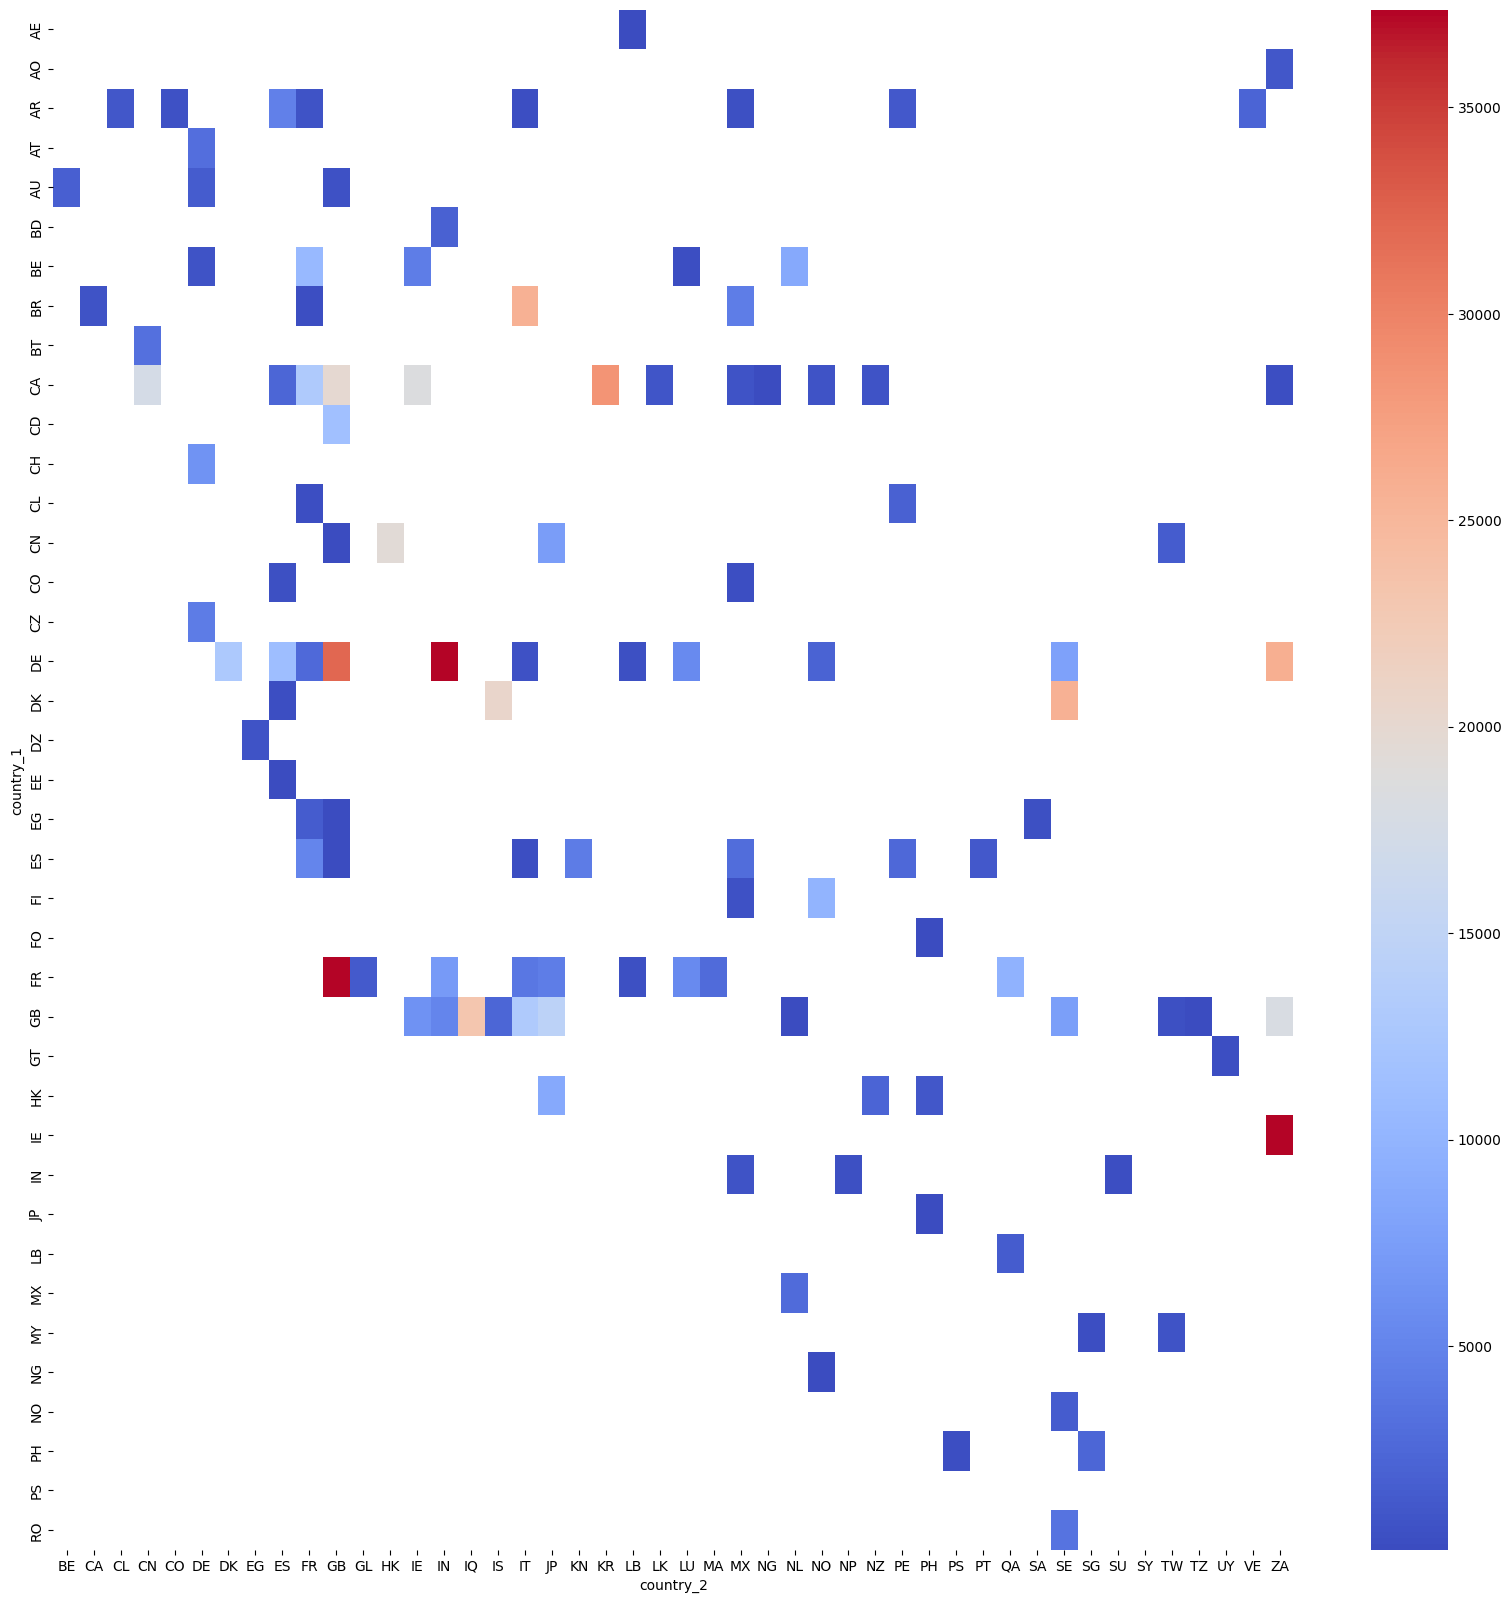

In [36]:
import numpy as np
import seaborn as sns

# Let's compare the average imdb_votes between production country pairs

# First, extract from the df the movies/shows that were produced by only two countries
two_countries_df = df[df['production_countries_count'] == 2]
two_countries_df.reset_index(drop=True, inplace=True)

country_pairs = {} # Stores country pairs and list of imdb_votes
for _, row in two_countries_df.iterrows():
  # Convert to list and store imdb_votes of entry
  countries = ast.literal_eval(row['production_countries'])
  imdb_votes = row['imdb_votes']
  pair = tuple(countries)
  if pair in country_pairs: # Add as new dict entry if unique
      country_pairs[pair].append(imdb_votes)
  else:                     # Otherwise add to list of imdb_votes
      country_pairs[pair] = [imdb_votes]

# Store country_pairs and mean imdb_votes of their co-produced movies/shows
pair_df = pd.DataFrame(
    [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],
    columns=['country_1', 'country_2', 'average_imdb_votes']
)

# Plot the heatmap with robust quantiles instead of extreme values
pivot_table = pair_df.pivot(index='country_1', columns='country_2', values='average_imdb_votes')
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, cmap='coolwarm', robust=True)

In [37]:
import numpy as np

# Store in a dataframe the country pair along with the average of their co-produced movies/shows in imdb_votes
pair_df = pd.DataFrame(
    [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],
    columns=['country_1', 'country_2', 'average_imdb_votes']
)

pair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_1           120 non-null    object 
 1   country_2           120 non-null    object 
 2   average_imdb_votes  115 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB


<ipython-input-37-b705629f6c9f>:5: RuntimeWarning: Mean of empty slice
  [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],


<Axes: xlabel='country_2', ylabel='country_1'>

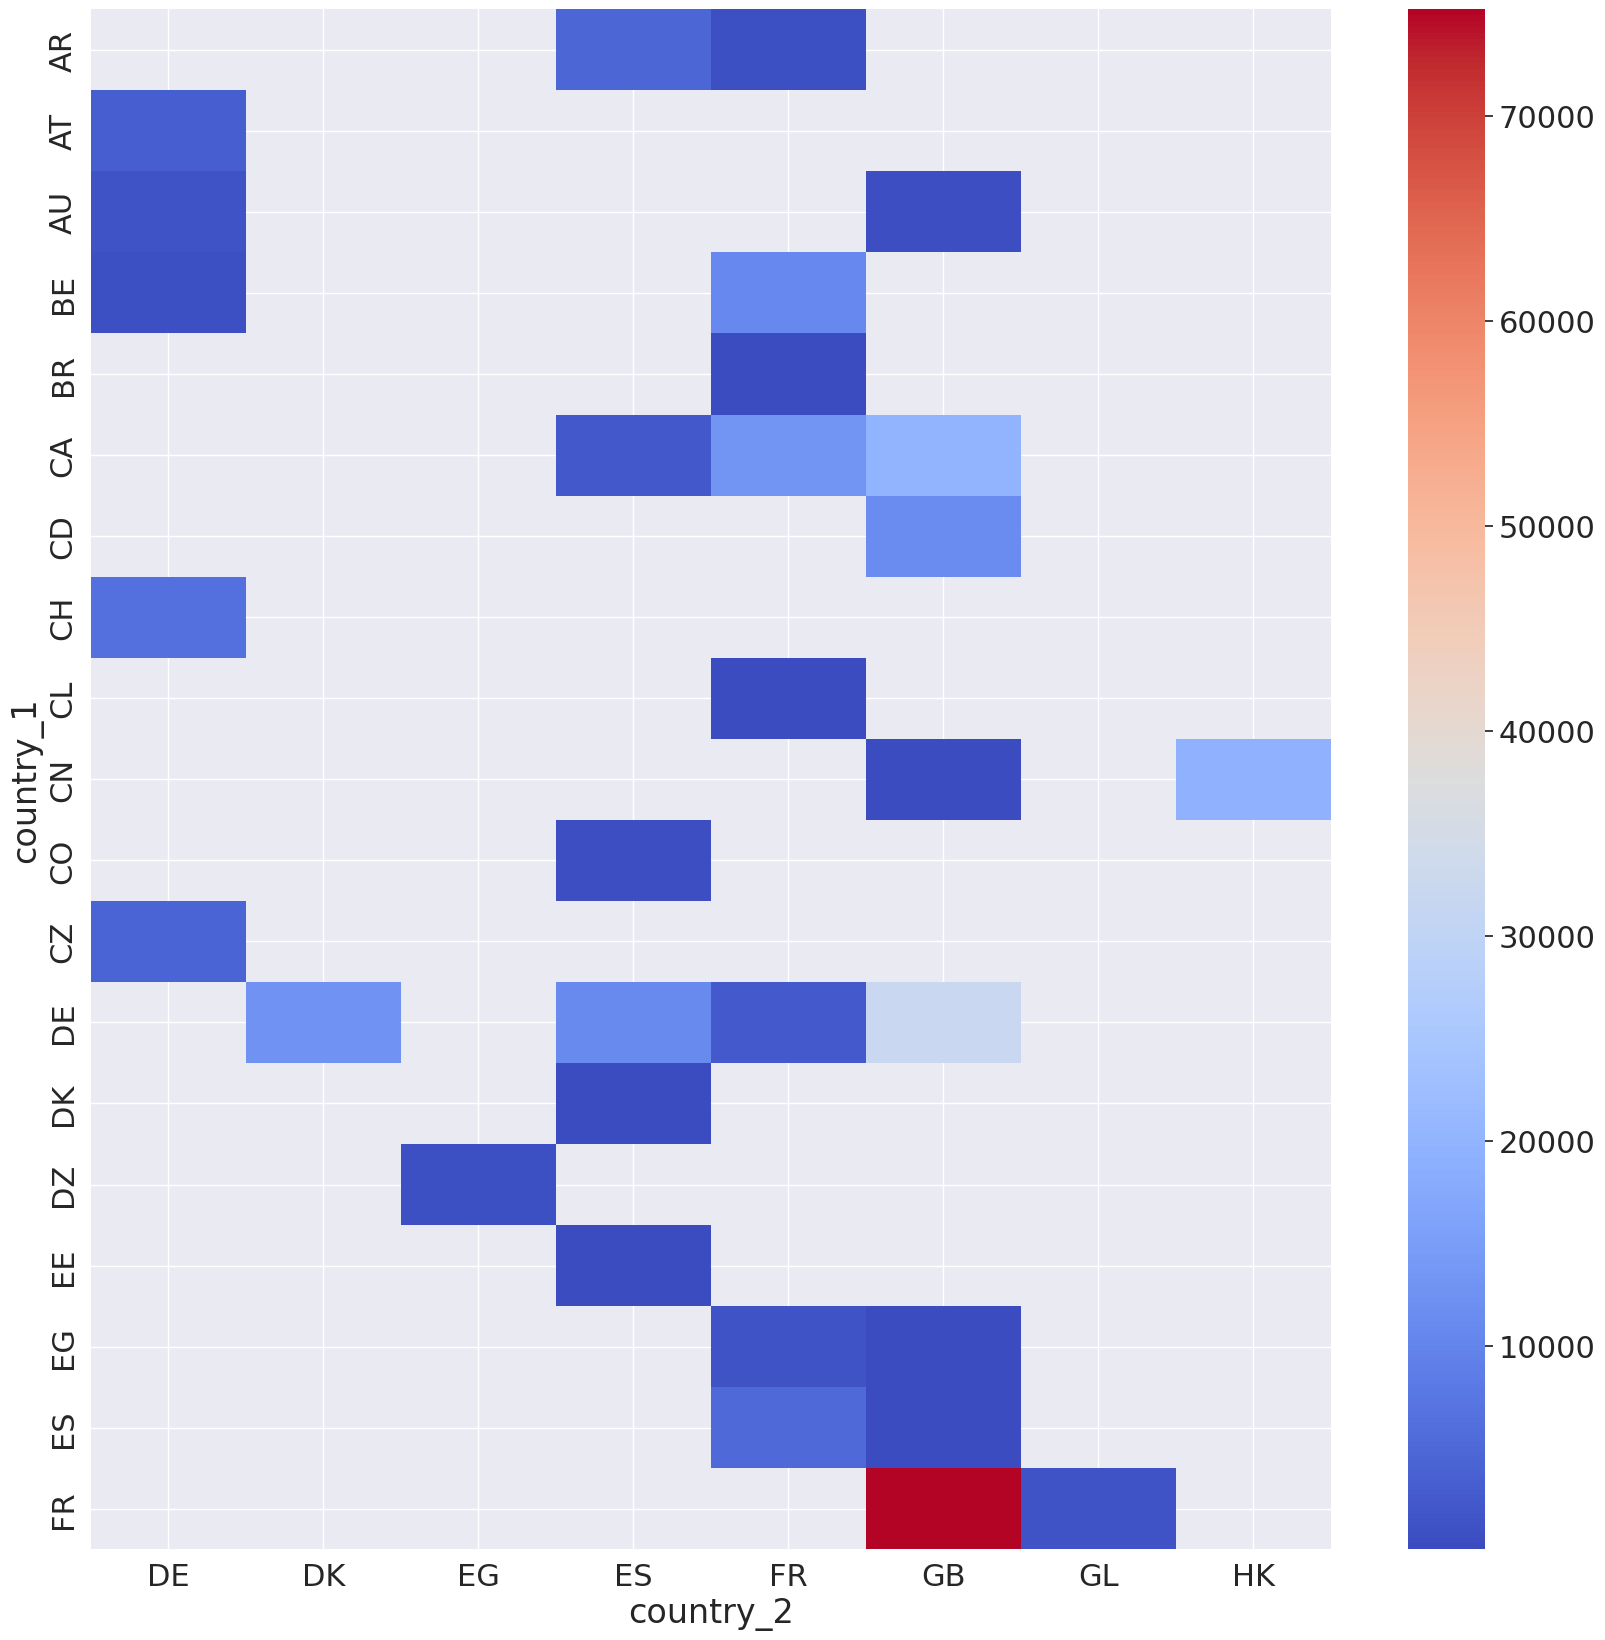

In [39]:
import seaborn as sns
sns.set(font_scale=2)

# Creating the heatmap
# Keep those greater than or equal to 'DE' and less than or equal to 'HK' for country_2
pair_df = pair_df[(pair_df['country_2'] >= 'DE') & (pair_df['country_2'] <= 'HK')]

pivot_table = pair_df.pivot(index='country_1', columns='country_2', values='average_imdb_votes')
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, cmap='coolwarm', robust=True)
# Increase fontsize of this heatmap


In [40]:
# Extracting rows where either Great Britian OR France is a production country, not both
pair_df[((pair_df['country_1'] != 'FR') & (pair_df['country_2'] == 'GB')) | ((pair_df['country_1'] == 'FR') & (pair_df['country_2'] != 'GB'))]

,country_1,country_2,average_imdb_votes
1,DE,GB,32123.000000
20,CA,GB,19908.333333
29,AU,GB,553.000000
31,EG,GB,84.000000
37,ES,GB,93.000000
41,CD,GB,11476.000000
52,FR,GL,1343.000000
115,CN,GB,137.000000


In [41]:
# Looking for row with France and Great Britain, this is the outlier
pair_df[(pair_df['country_1'] == 'FR') & (pair_df['country_2'] == 'GB')]

,country_1,country_2,average_imdb_votes
0,FR,GB,139796.75


<Axes: xlabel='country_2', ylabel='country_1'>

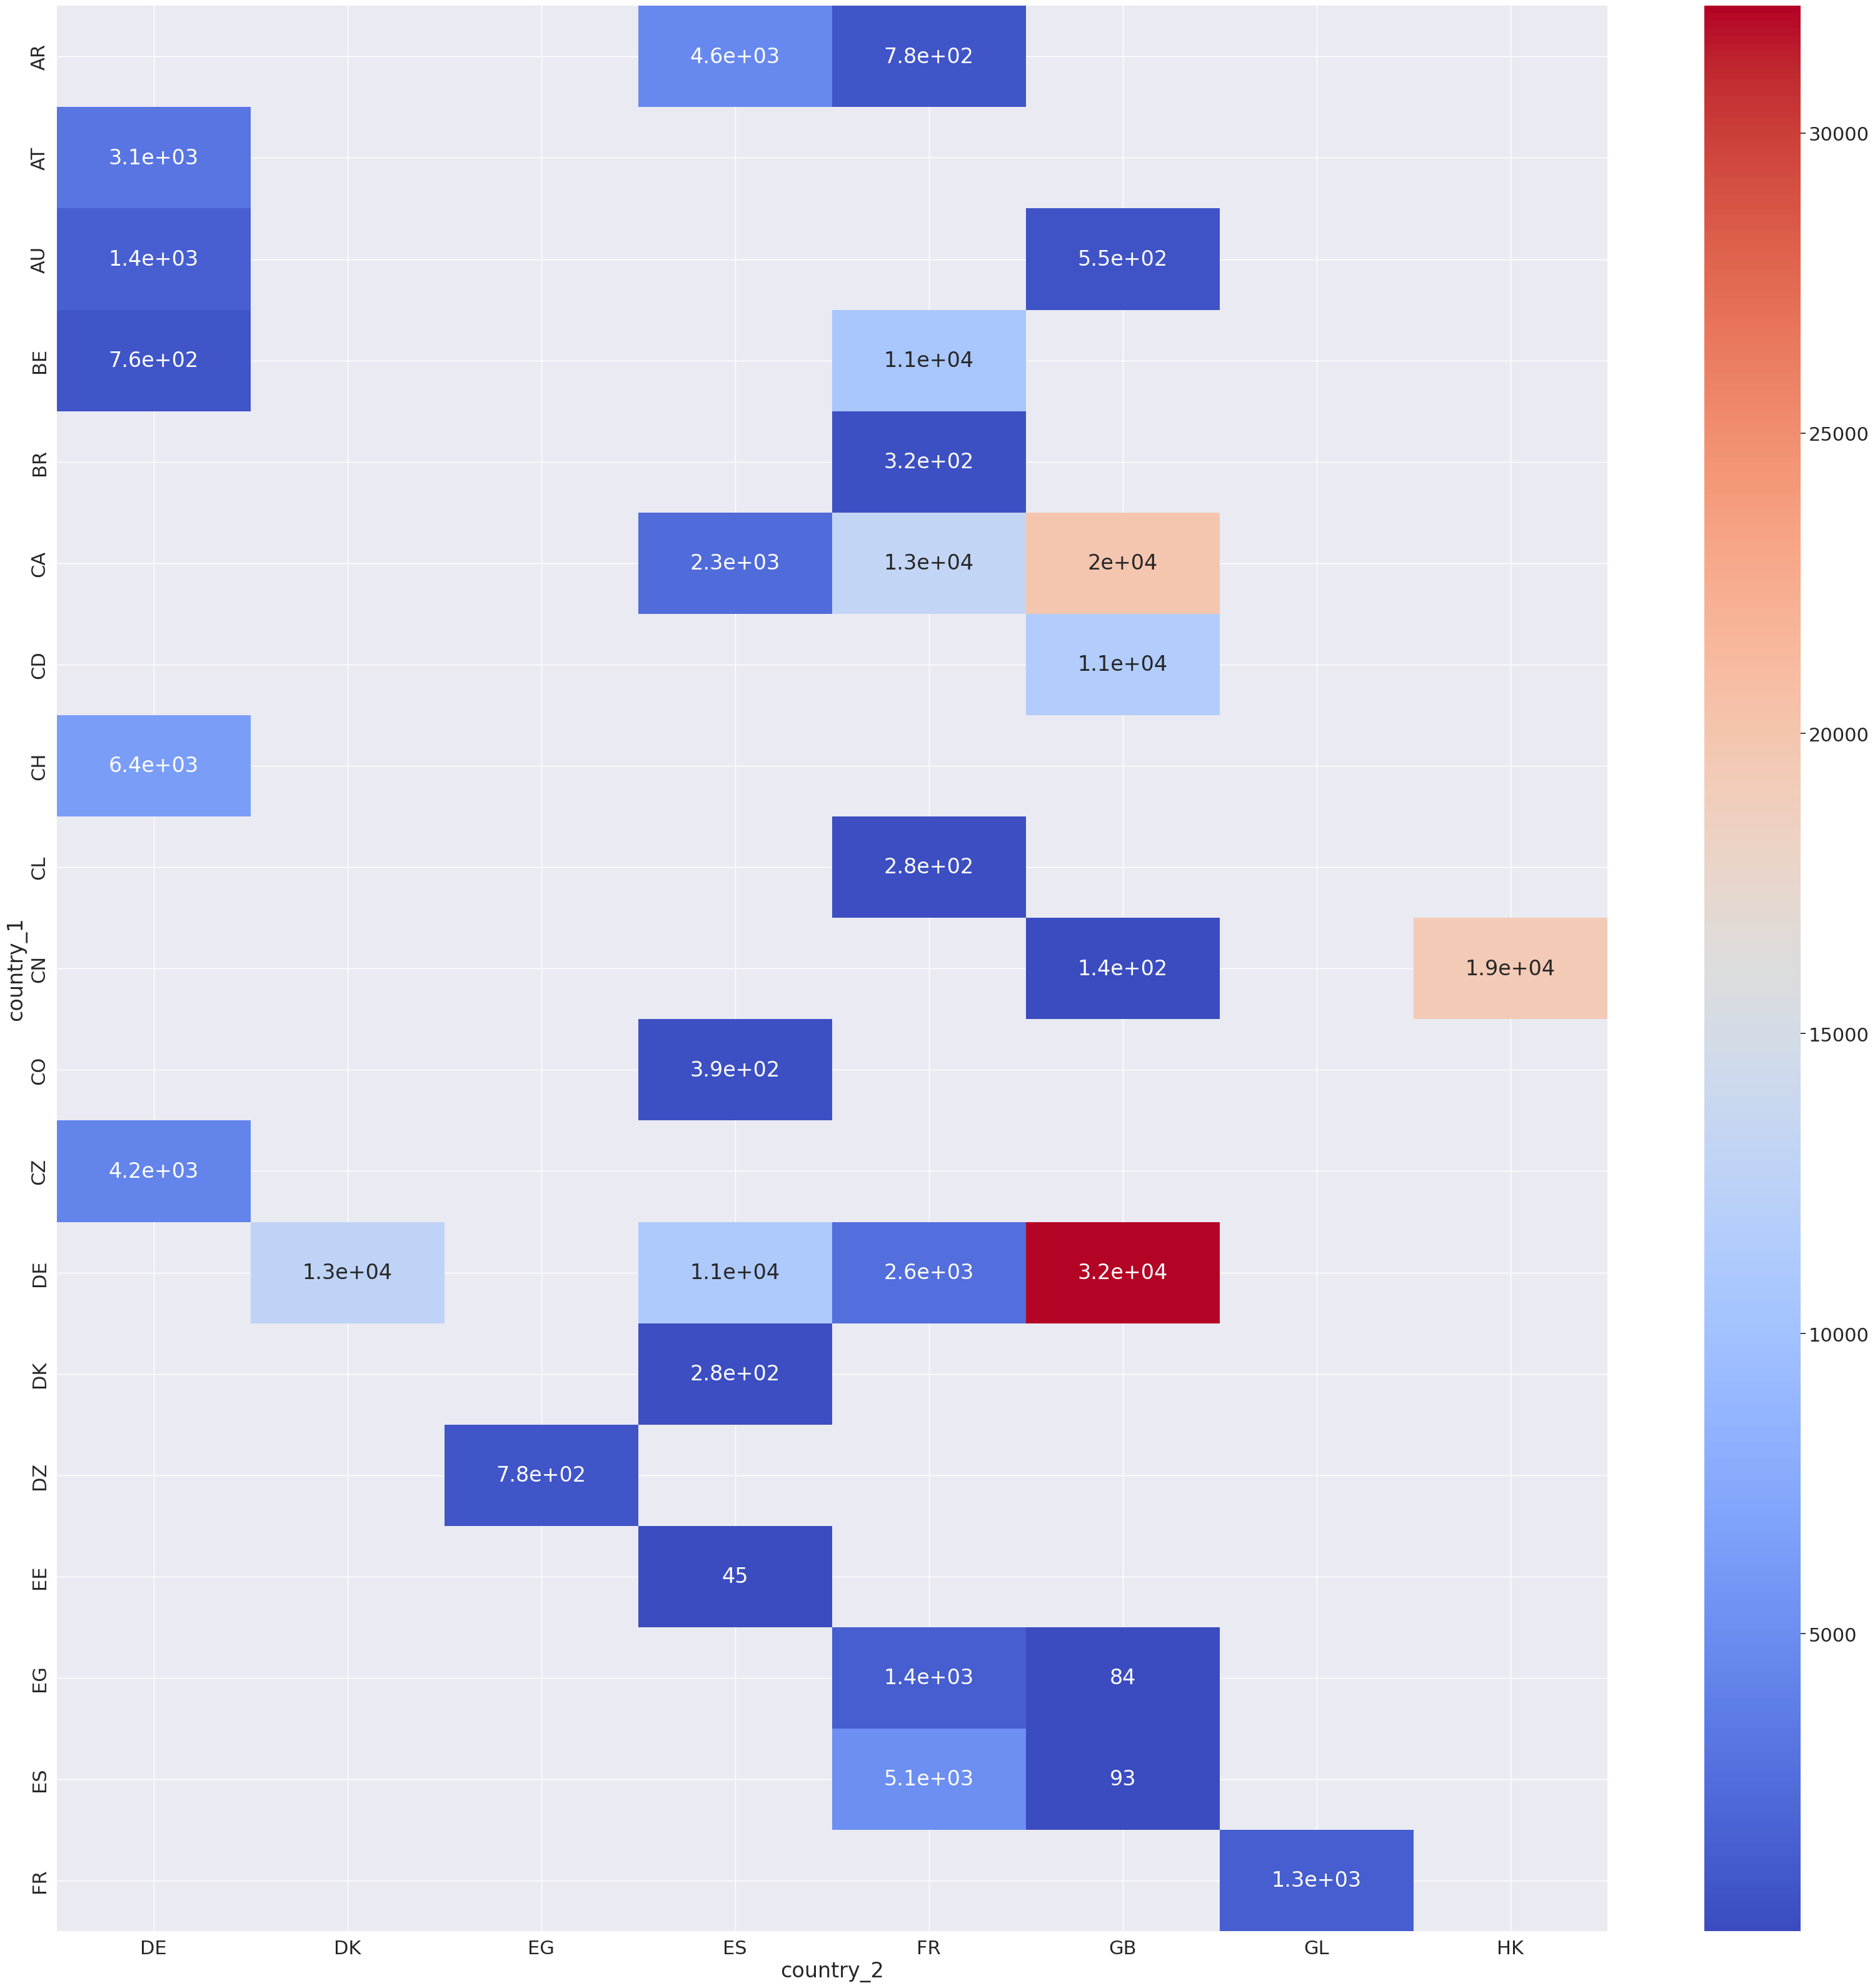

In [42]:
# Co-productions of France and Great Britain seem to be the outliers. What if we remove their cells as co-producers?
pair_df_2 = pair_df.drop(0, axis=0)
pair_df_2.reset_index(drop=True, inplace=True);

pivot_table = pair_df_2.pivot(index='country_1', columns='country_2', values='average_imdb_votes')

plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

<Axes: xlabel='country_2', ylabel='country_1'>

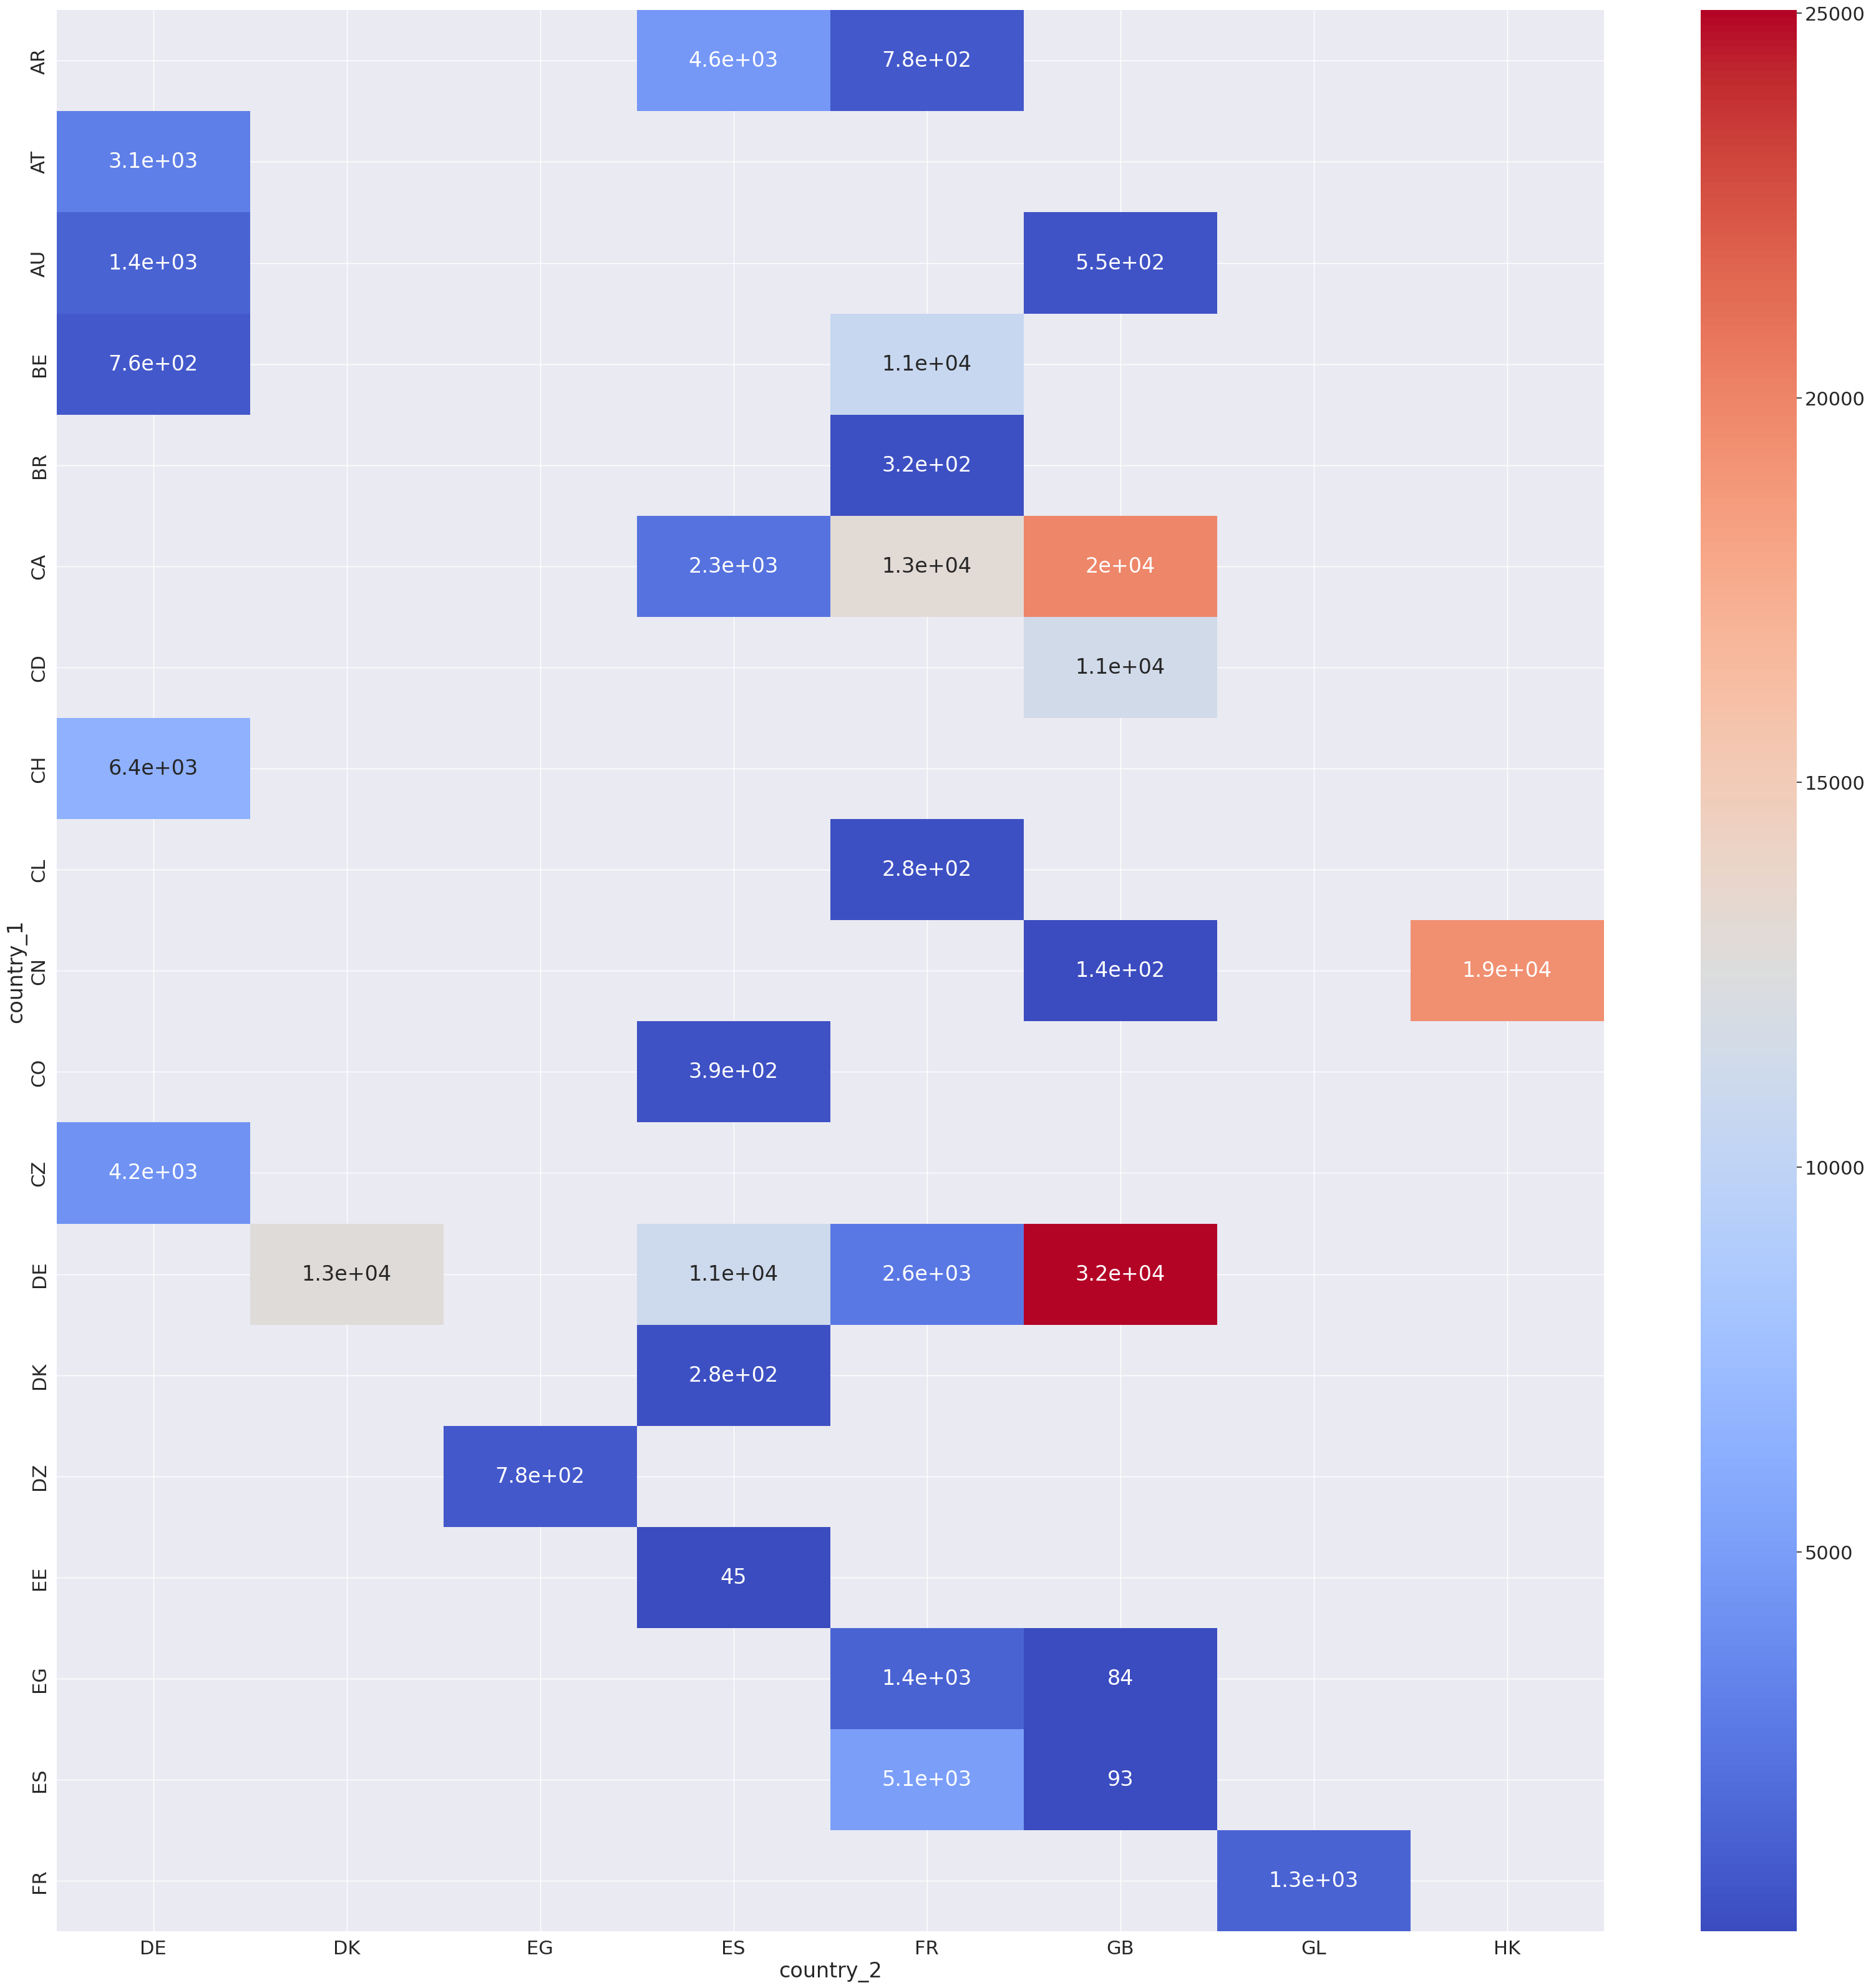

In [43]:
# Try again with the robust option to determine colormap range
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', robust=True)
# This heatmap makes identifying higher than normal co-production imdb_votes stand out

In [44]:
# Just for fun, let's try this tmdb_popularity

country_pairs = {}
for _, row in two_countries_df.iterrows():
  # Convert to list
  countries = ast.literal_eval(row['production_countries'])
  tmdb_popularity = row['tmdb_popularity']

  for i in range(len(countries)):
    for j in range(i + 1, len(countries)):
      pair = tuple(sorted([countries[i], countries[j]]))
      # Checking for duplicates, otherwise, create a new list
      if pair in country_pairs:
        country_pairs[pair].append(tmdb_popularity)
      else:
        country_pairs[pair] = [tmdb_popularity]

# Store in a dataframe the country pair along with the average of their co-produced movies/shows in tmdb_popularity
pair_df = pd.DataFrame(
    [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],
    columns=['country_1', 'country_2', 'average_tmdb_popularity']
)

pair_df.head()

,country_1,country_2,average_tmdb_popularity
0,FR,GB,18.6316
1,DE,GB,41.8954
2,GB,IE,8.1890
3,BE,FR,47.9320
4,CA,MX,4.0490


<Axes: xlabel='country_2', ylabel='country_1'>

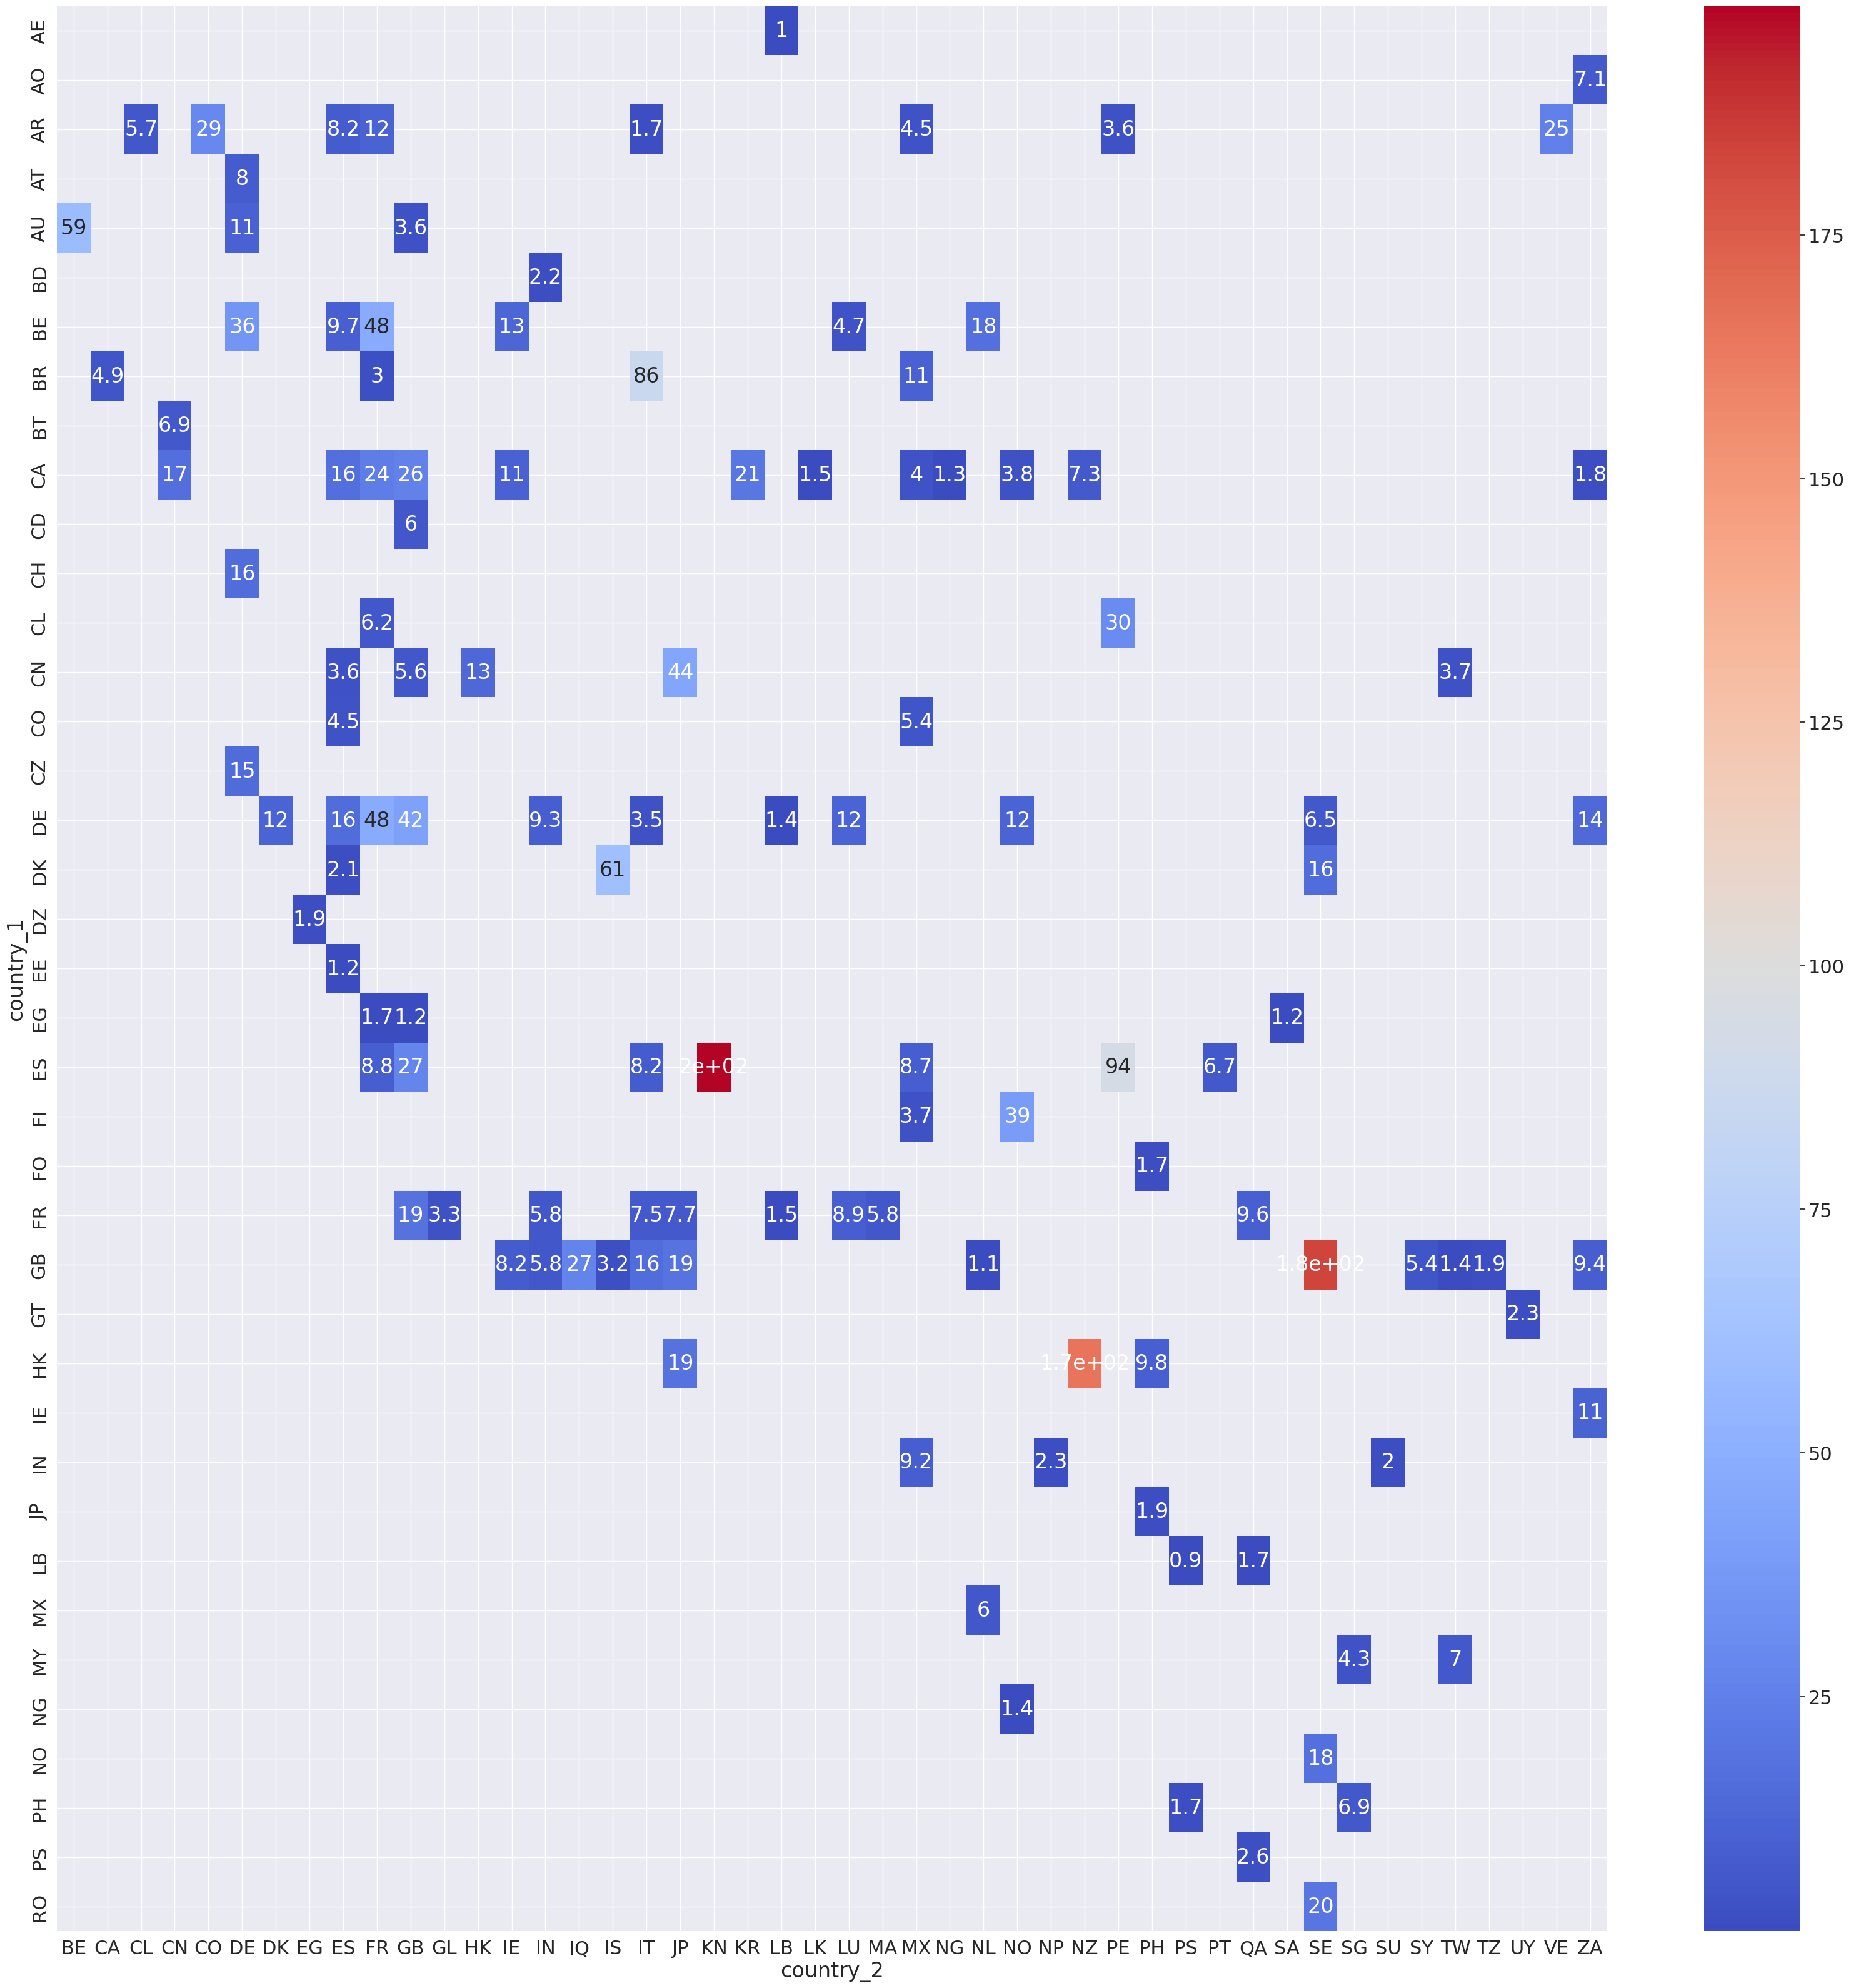

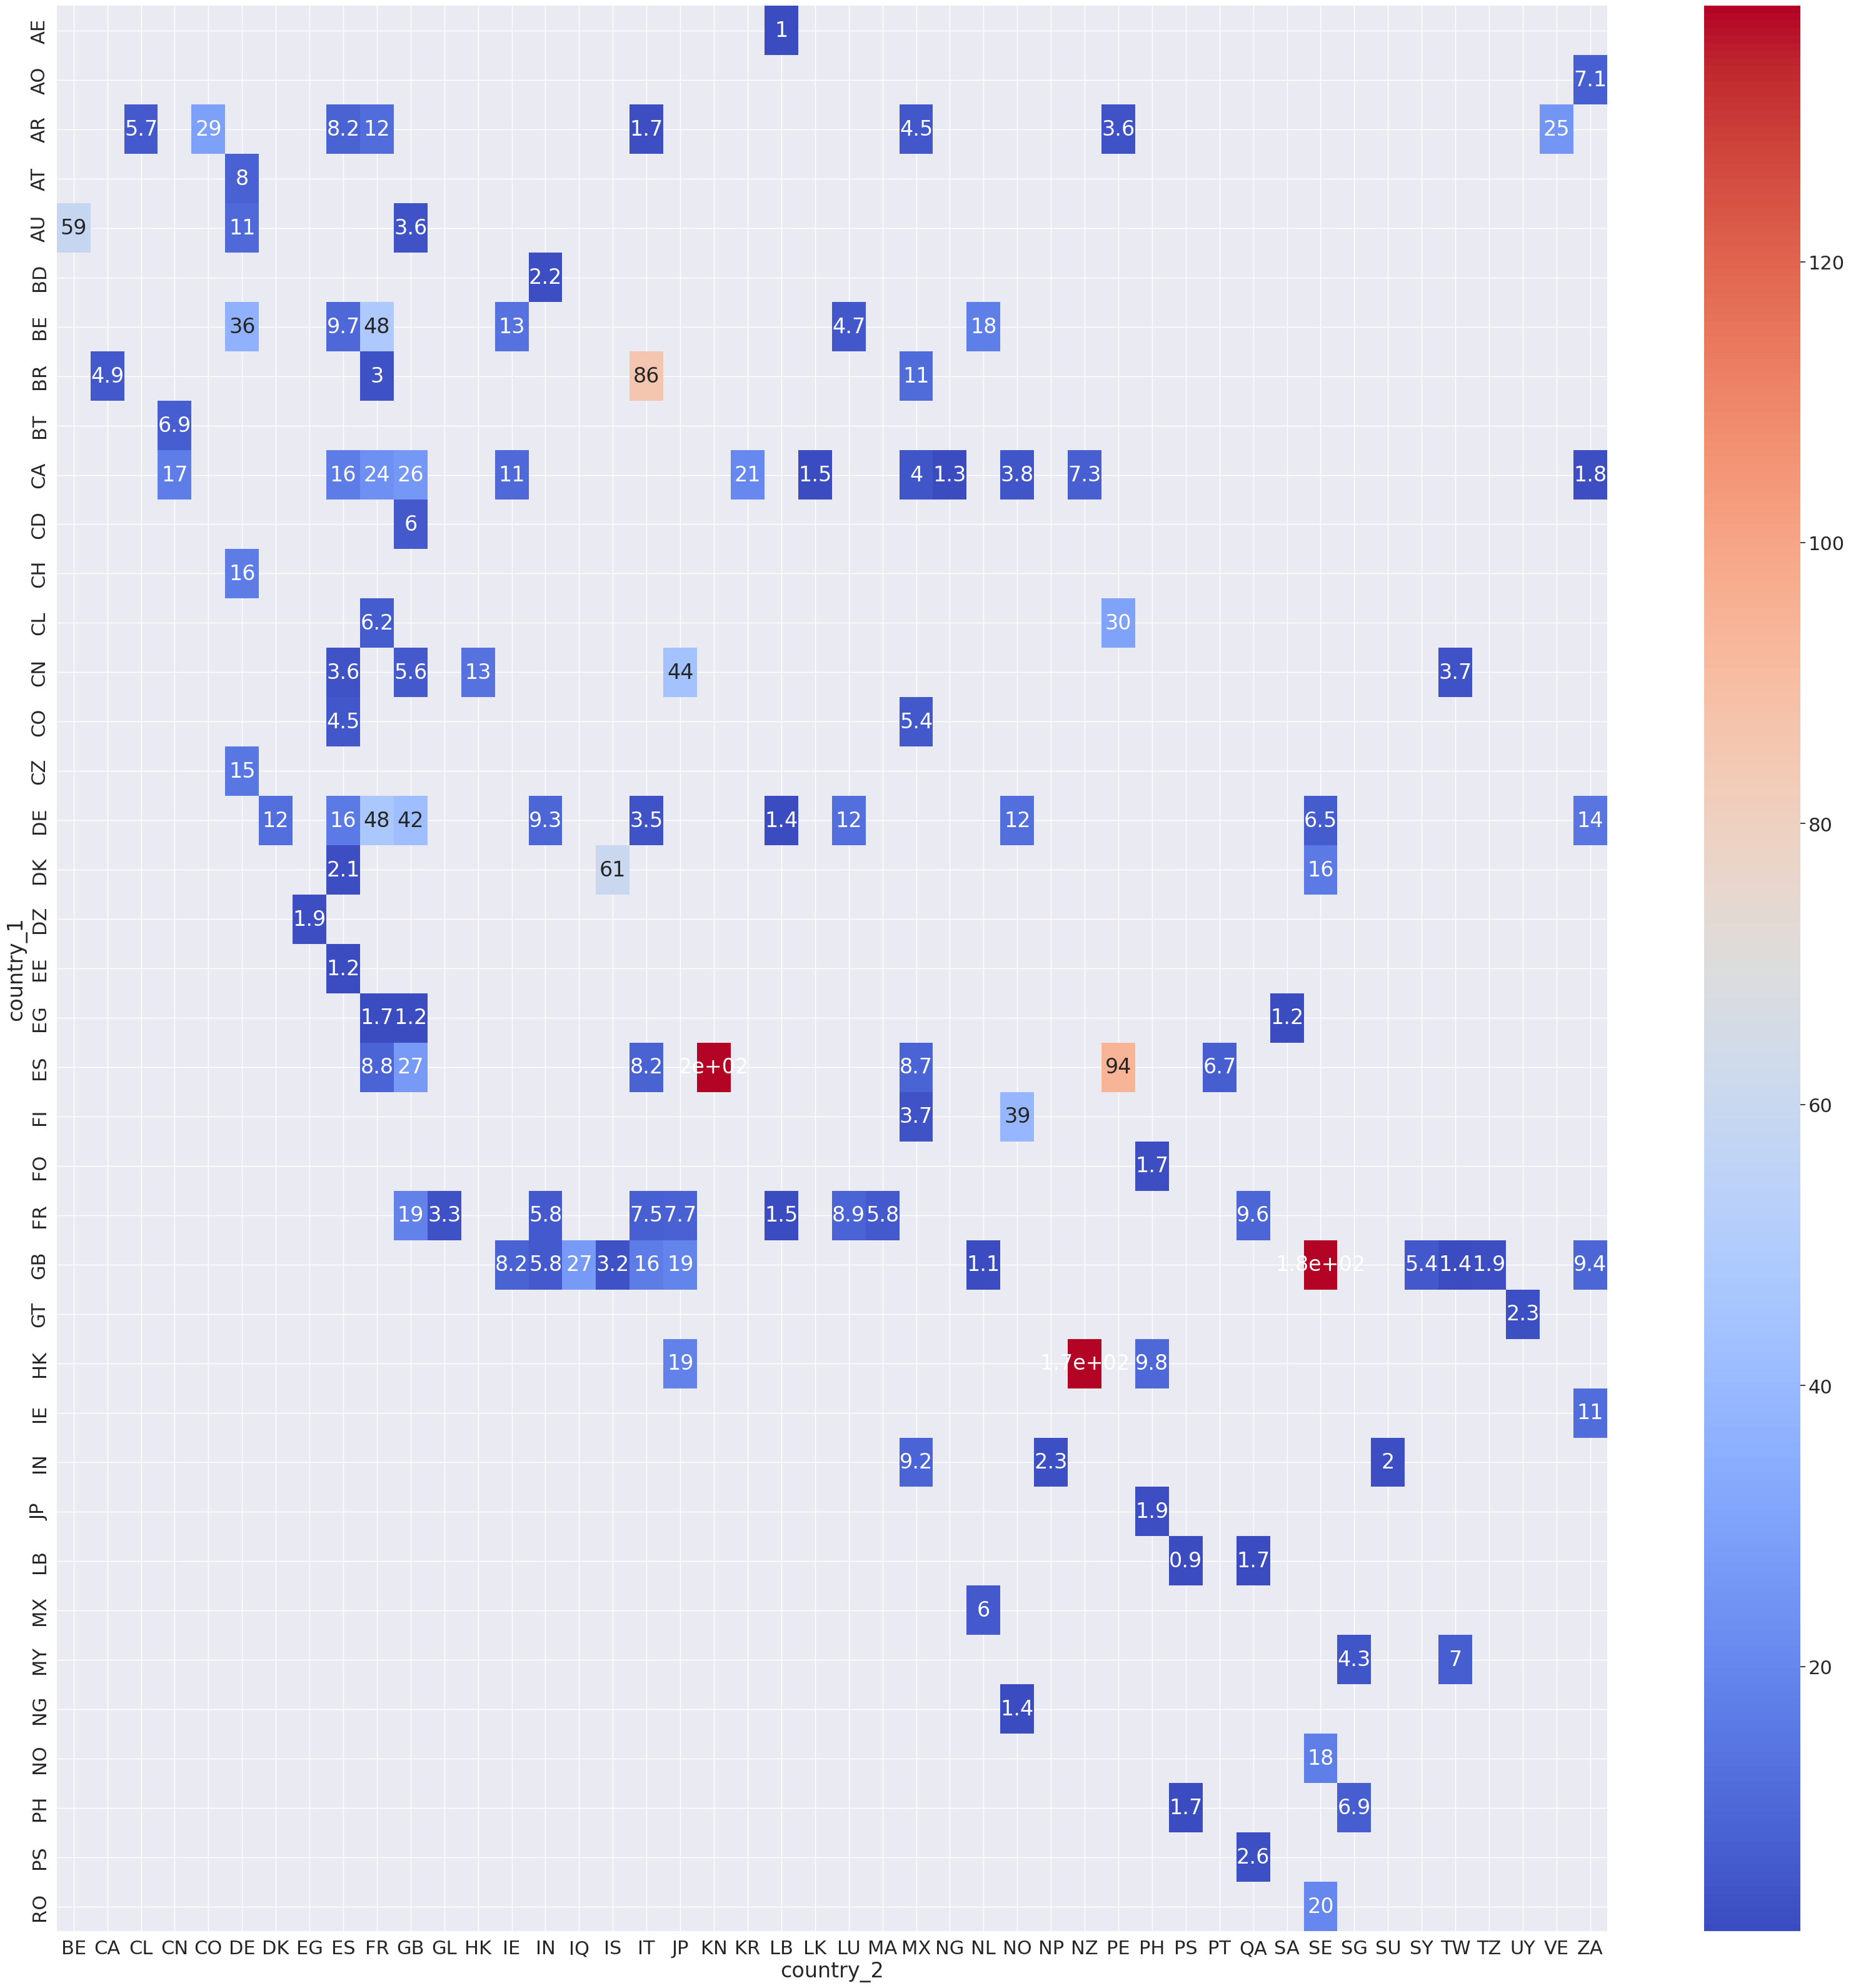

In [45]:
pivot_table = pair_df.pivot(index='country_1', columns='country_2', values='average_tmdb_popularity')

# W/o robustness
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.show

# W/ robustness
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', robust=True)

# Not much difference between the two heatmaps

In [46]:
# Finally with average_score

country_pairs = {}
for _, row in two_countries_df.iterrows():
  # Convert to list
  countries = ast.literal_eval(row['production_countries'])
  average_score = row['average_score']

  for i in range(len(countries)):
    for j in range(i + 1, len(countries)):
      pair = tuple(sorted([countries[i], countries[j]]))
      # Checking for duplicates, otherwise, create a new list
      if pair in country_pairs:
        country_pairs[pair].append(average_score)
      else:
        country_pairs[pair] = [average_score]

# Store in a dataframe the country pair along with the average of their co-produced movies/shows in average score
pair_df = pd.DataFrame(
    [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],
    columns=['country_1', 'country_2', 'average_average_score']
)

pair_df.head()

,country_1,country_2,average_average_score
0,FR,GB,6.875700
1,DE,GB,6.252000
2,GB,IE,6.565000
3,BE,FR,6.559585
4,CA,MX,6.020000


<Axes: xlabel='country_2', ylabel='country_1'>

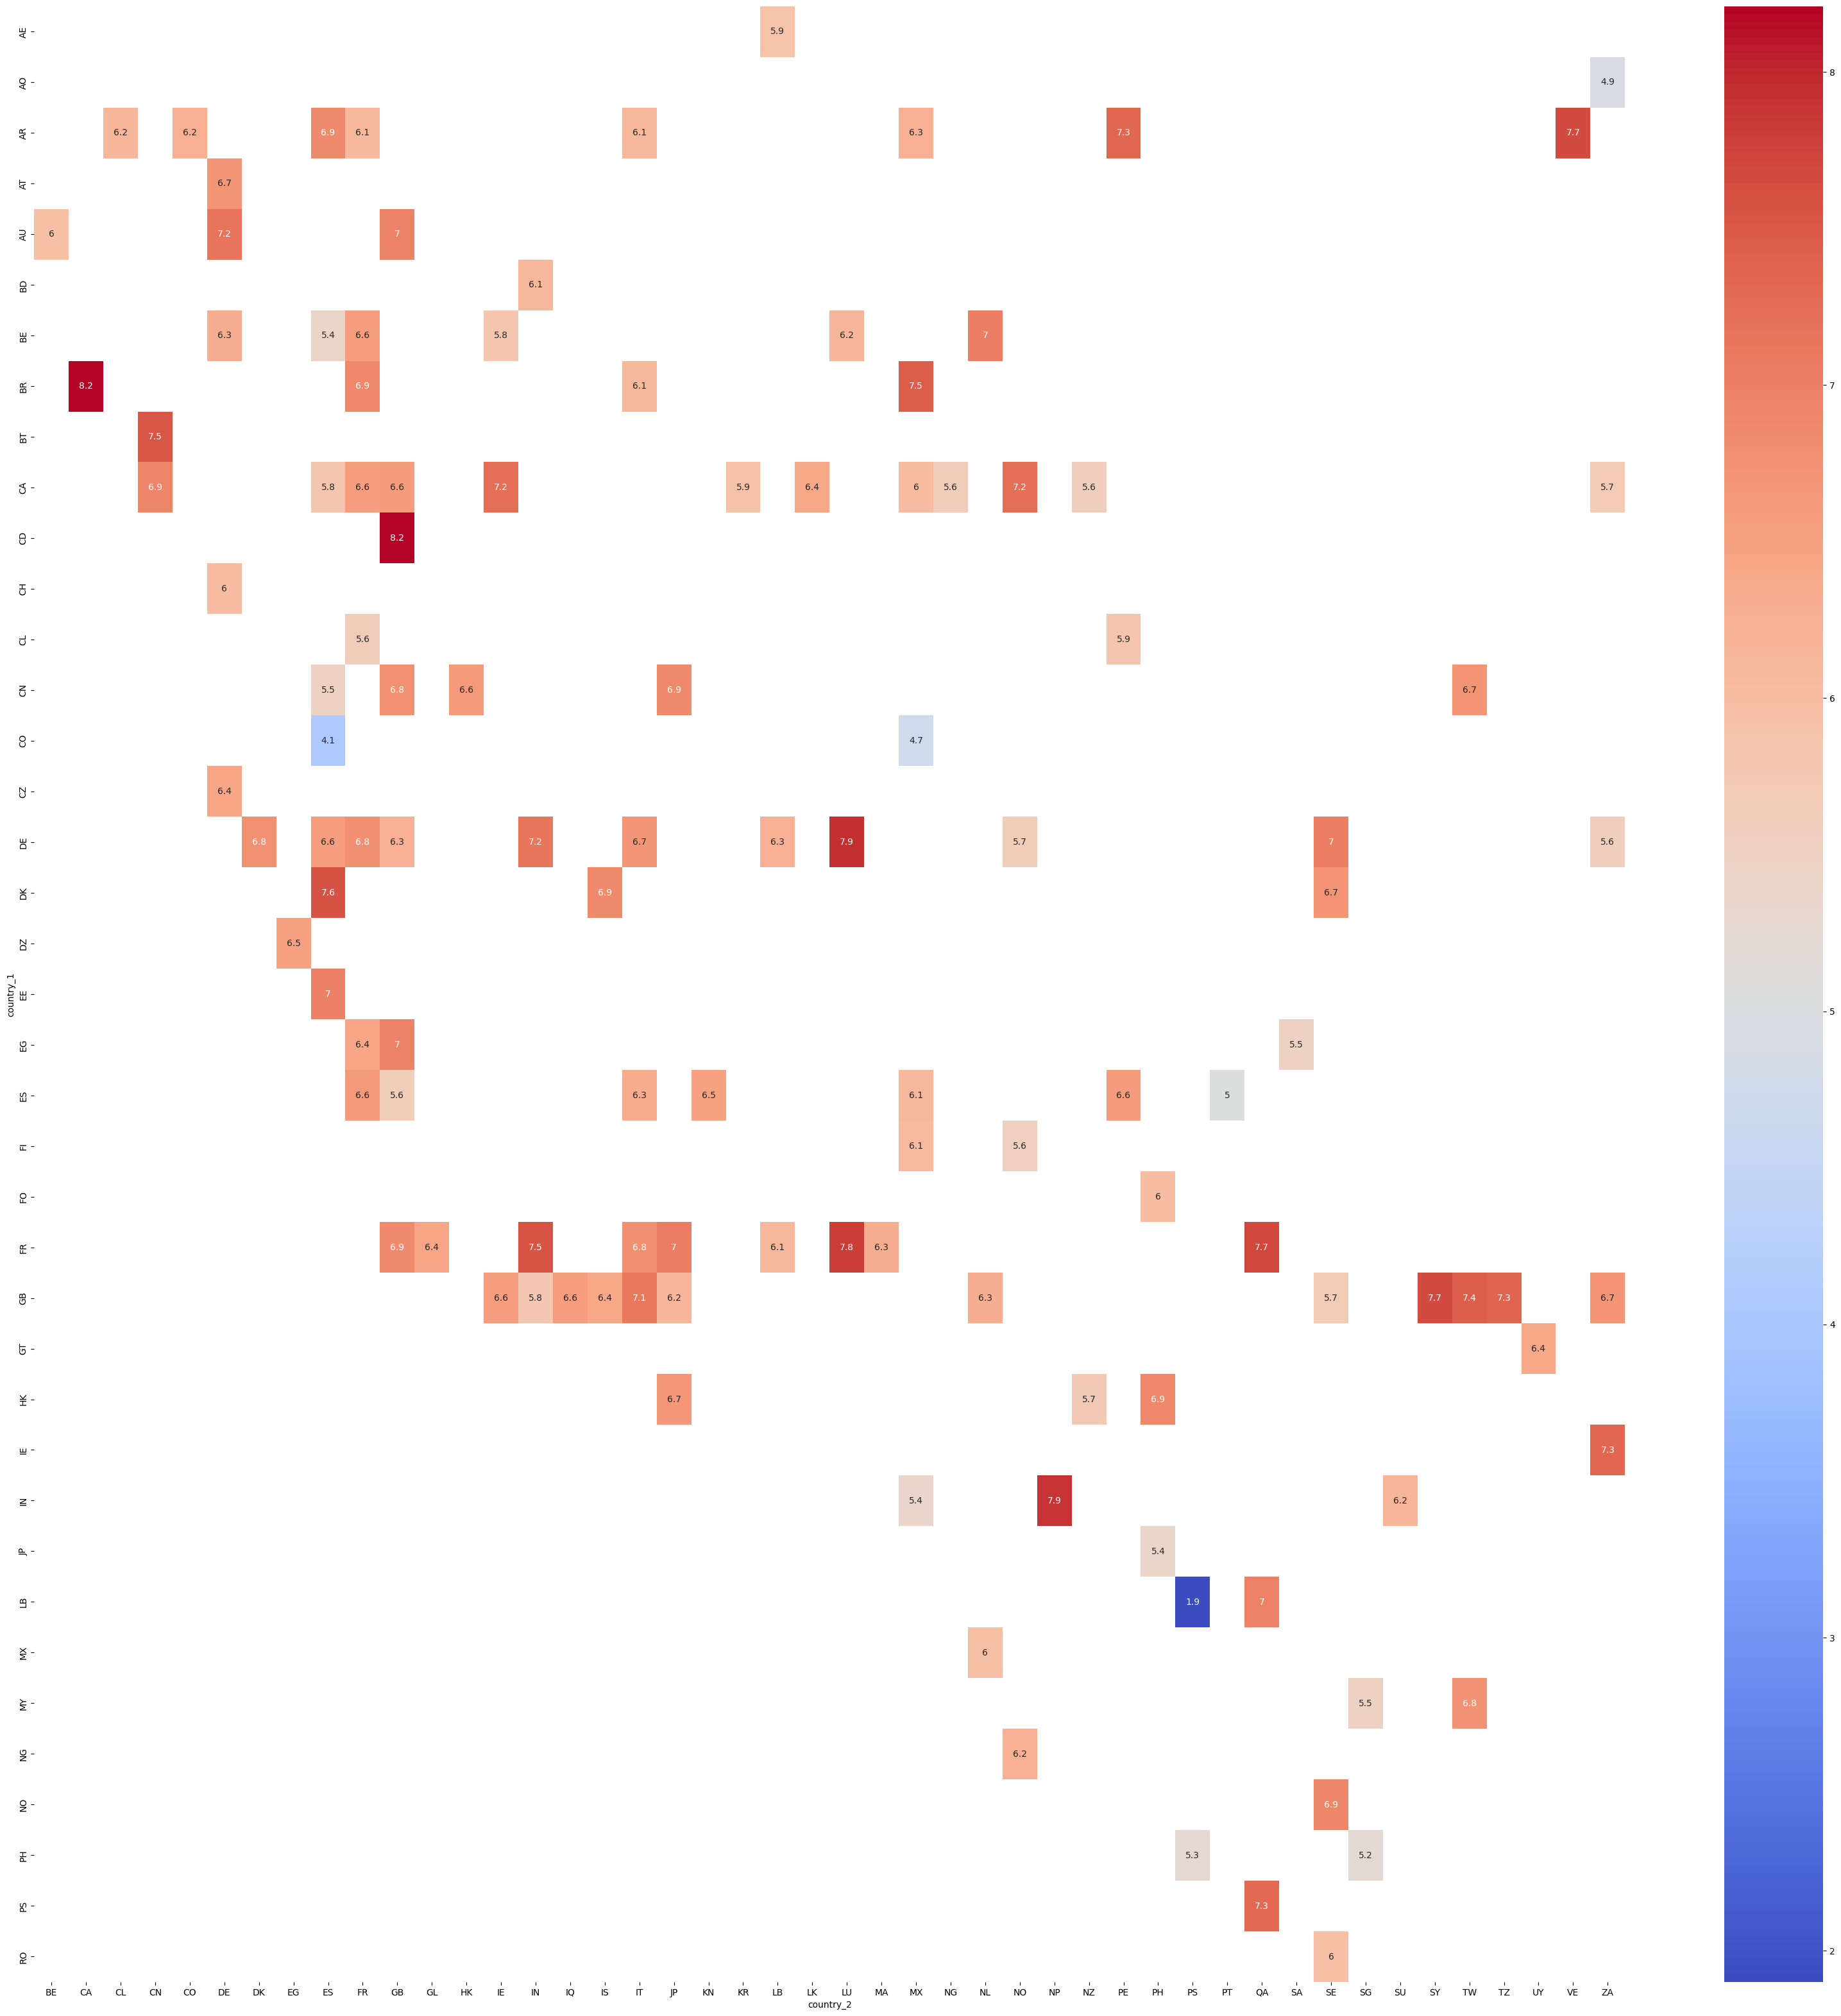

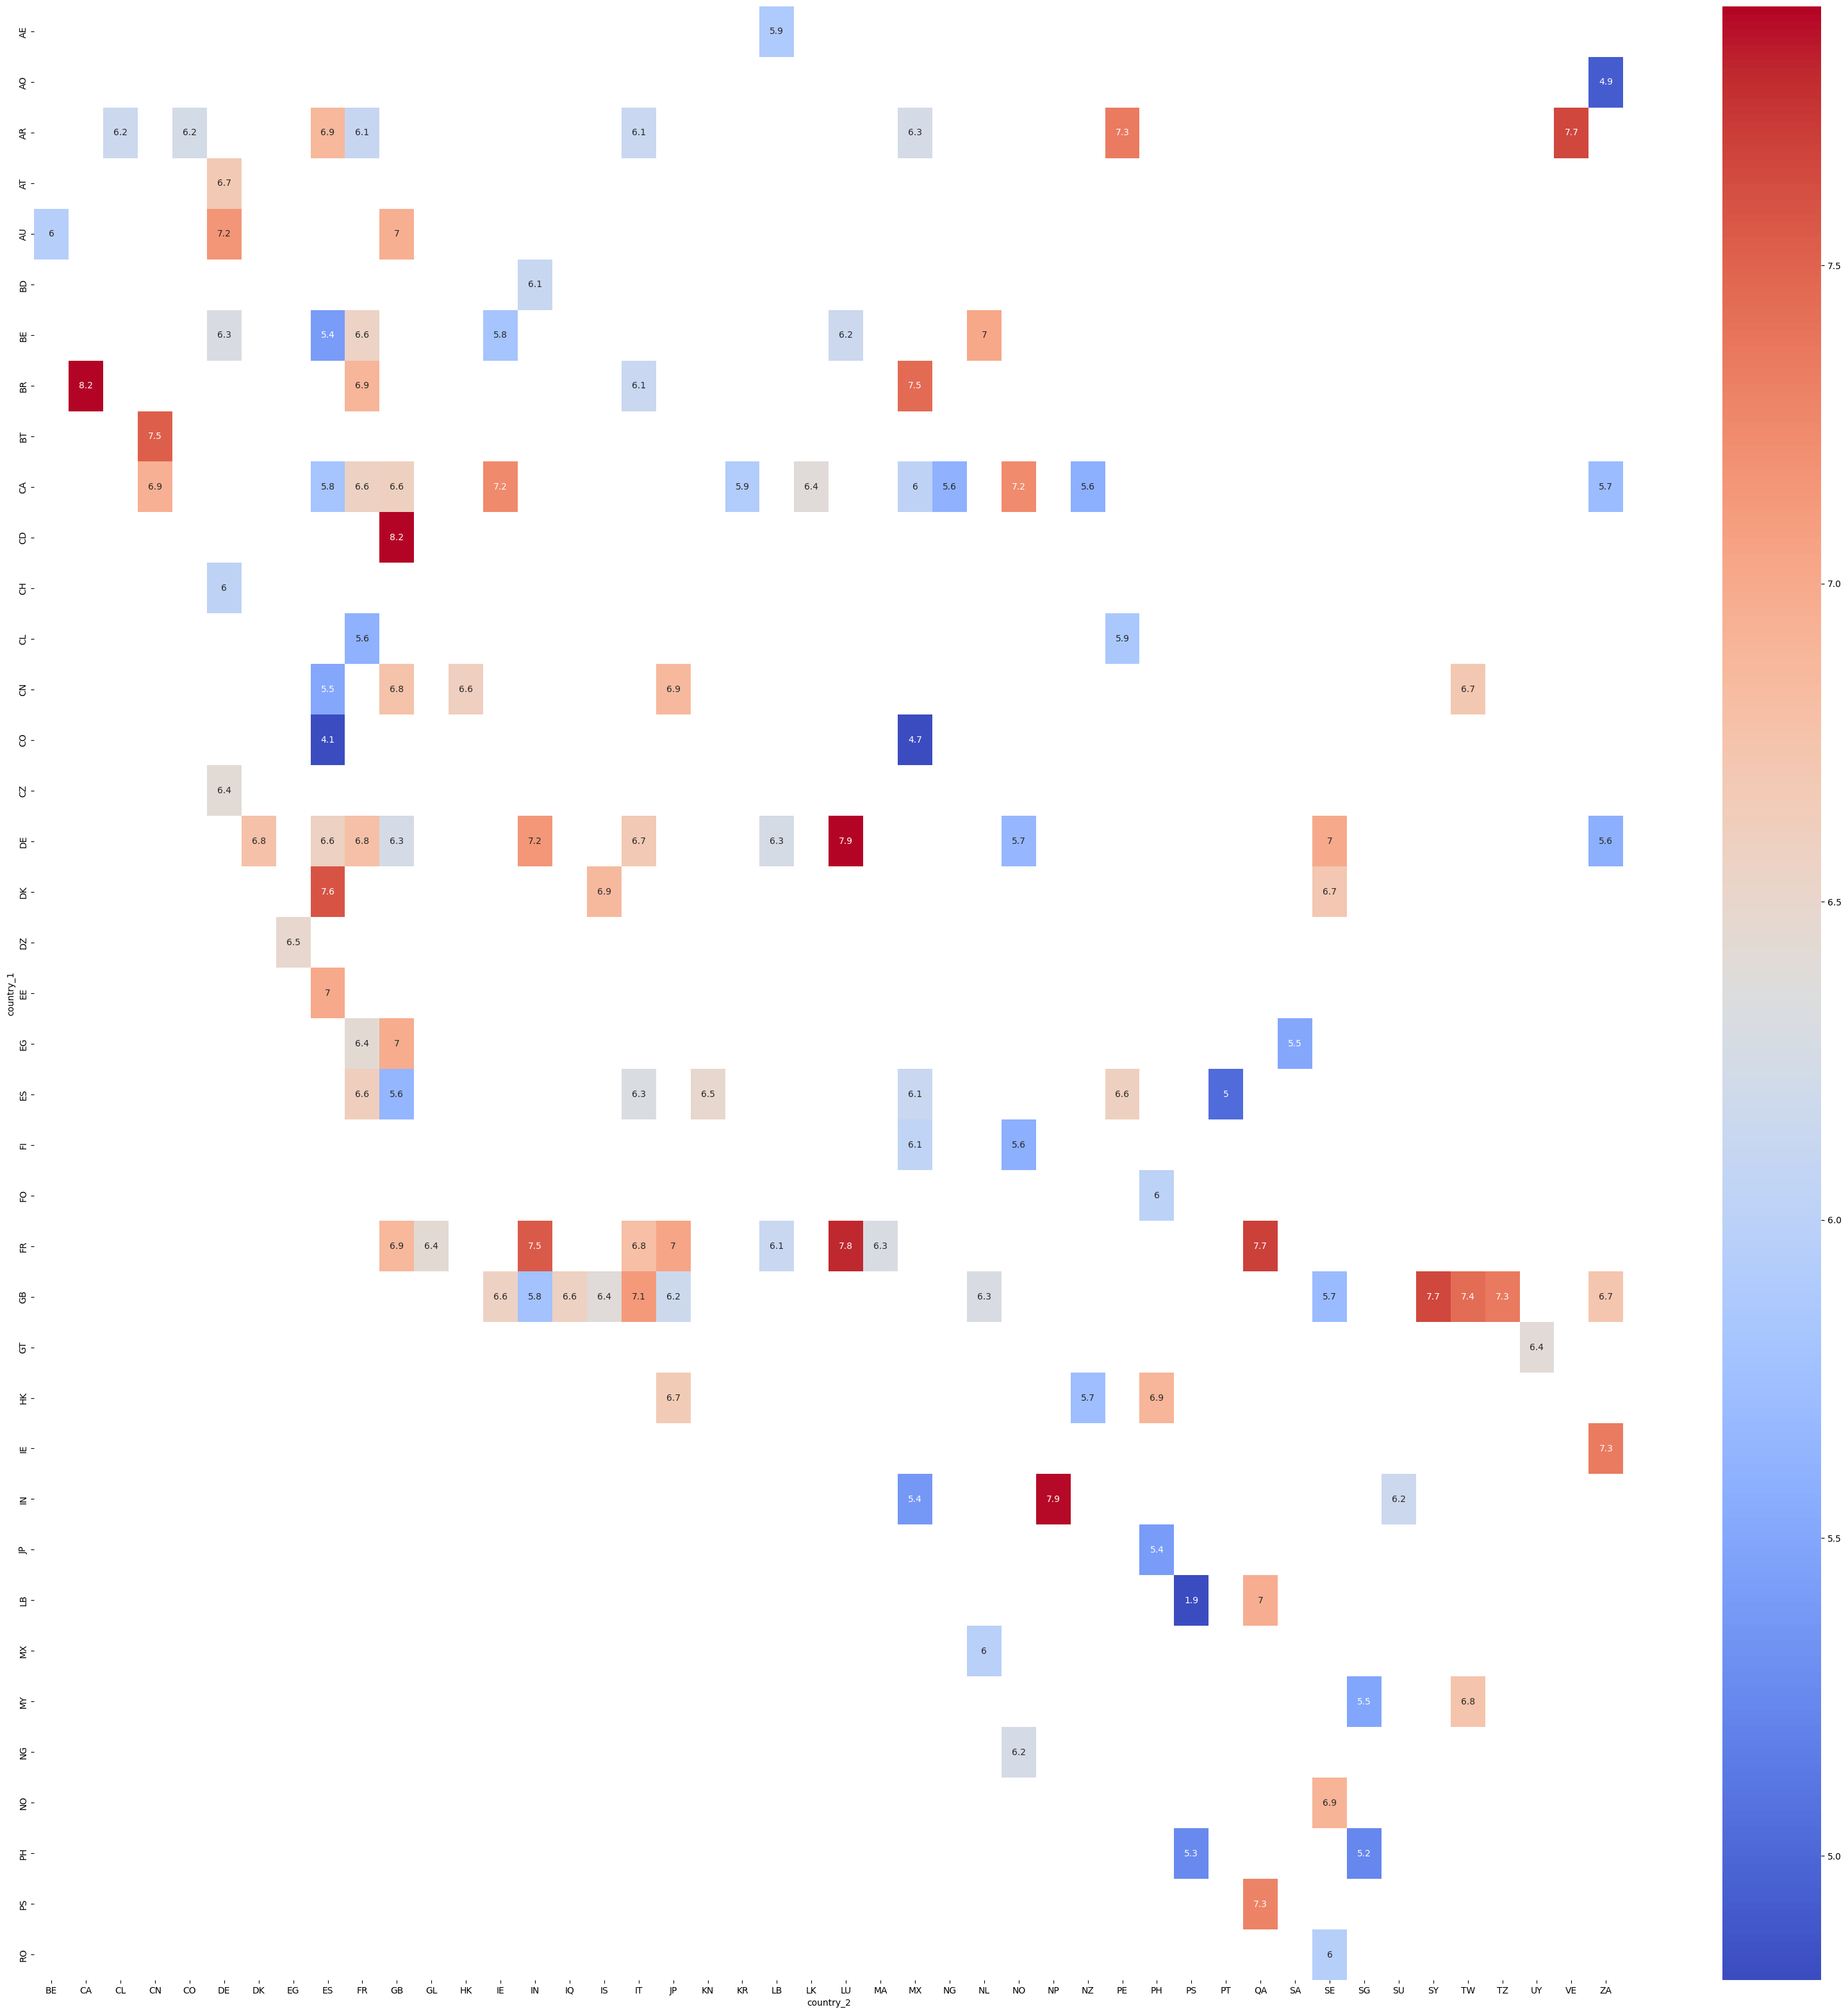

In [ ]:
pivot_table = pair_df.pivot(index='country_1', columns='country_2', values='average_average_score')

# W/o robustness
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.show

# W/ robustness
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', robust=True)

# Smaller differences between the average of average scores shows up more in the second heatmap

In [48]:
'''
Let's try this with the original dataset including United States as a production country
'''

df = pd.read_csv('https://raw.githubusercontent.com/cacress/CSC442/refs/heads/main/datasets/modified_v2.csv')

# First, extract from the df the movies/shows that were produced by at least 2 countries
two_countries_df = df[df['production_countries_count'] >= 2]
two_countries_df.reset_index(drop=True, inplace=True)

country_pairs = {}
for _, row in two_countries_df.iterrows():
  # Convert to list
  countries = ast.literal_eval(row['production_countries'])
  imdb_votes = row['imdb_votes']

  for i in range(len(countries)):
    for j in range(i + 1, len(countries)):
      pair = tuple(sorted([countries[i], countries[j]]))
      # Checking for duplicates, otherwise, create a new list storing imdb_votes
      if pair in country_pairs:
        country_pairs[pair].append(imdb_votes)
      else:
        country_pairs[pair] = [imdb_votes]

pair_df = pd.DataFrame(
    [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],
    columns=['country_1', 'country_2', 'average_imdb_votes']
)

pair_df.head()

<ipython-input-48-24b521bd9e3d>:27: RuntimeWarning: Mean of empty slice
  [(k[0], k[1], np.nanmean(v)) for k, v in country_pairs.items()],


,country_1,country_2,average_imdb_votes
0,CA,US,48185.220183
1,GB,US,104592.810811
2,JP,US,34534.421053
3,DE,US,118916.689655
4,FR,US,88351.017241


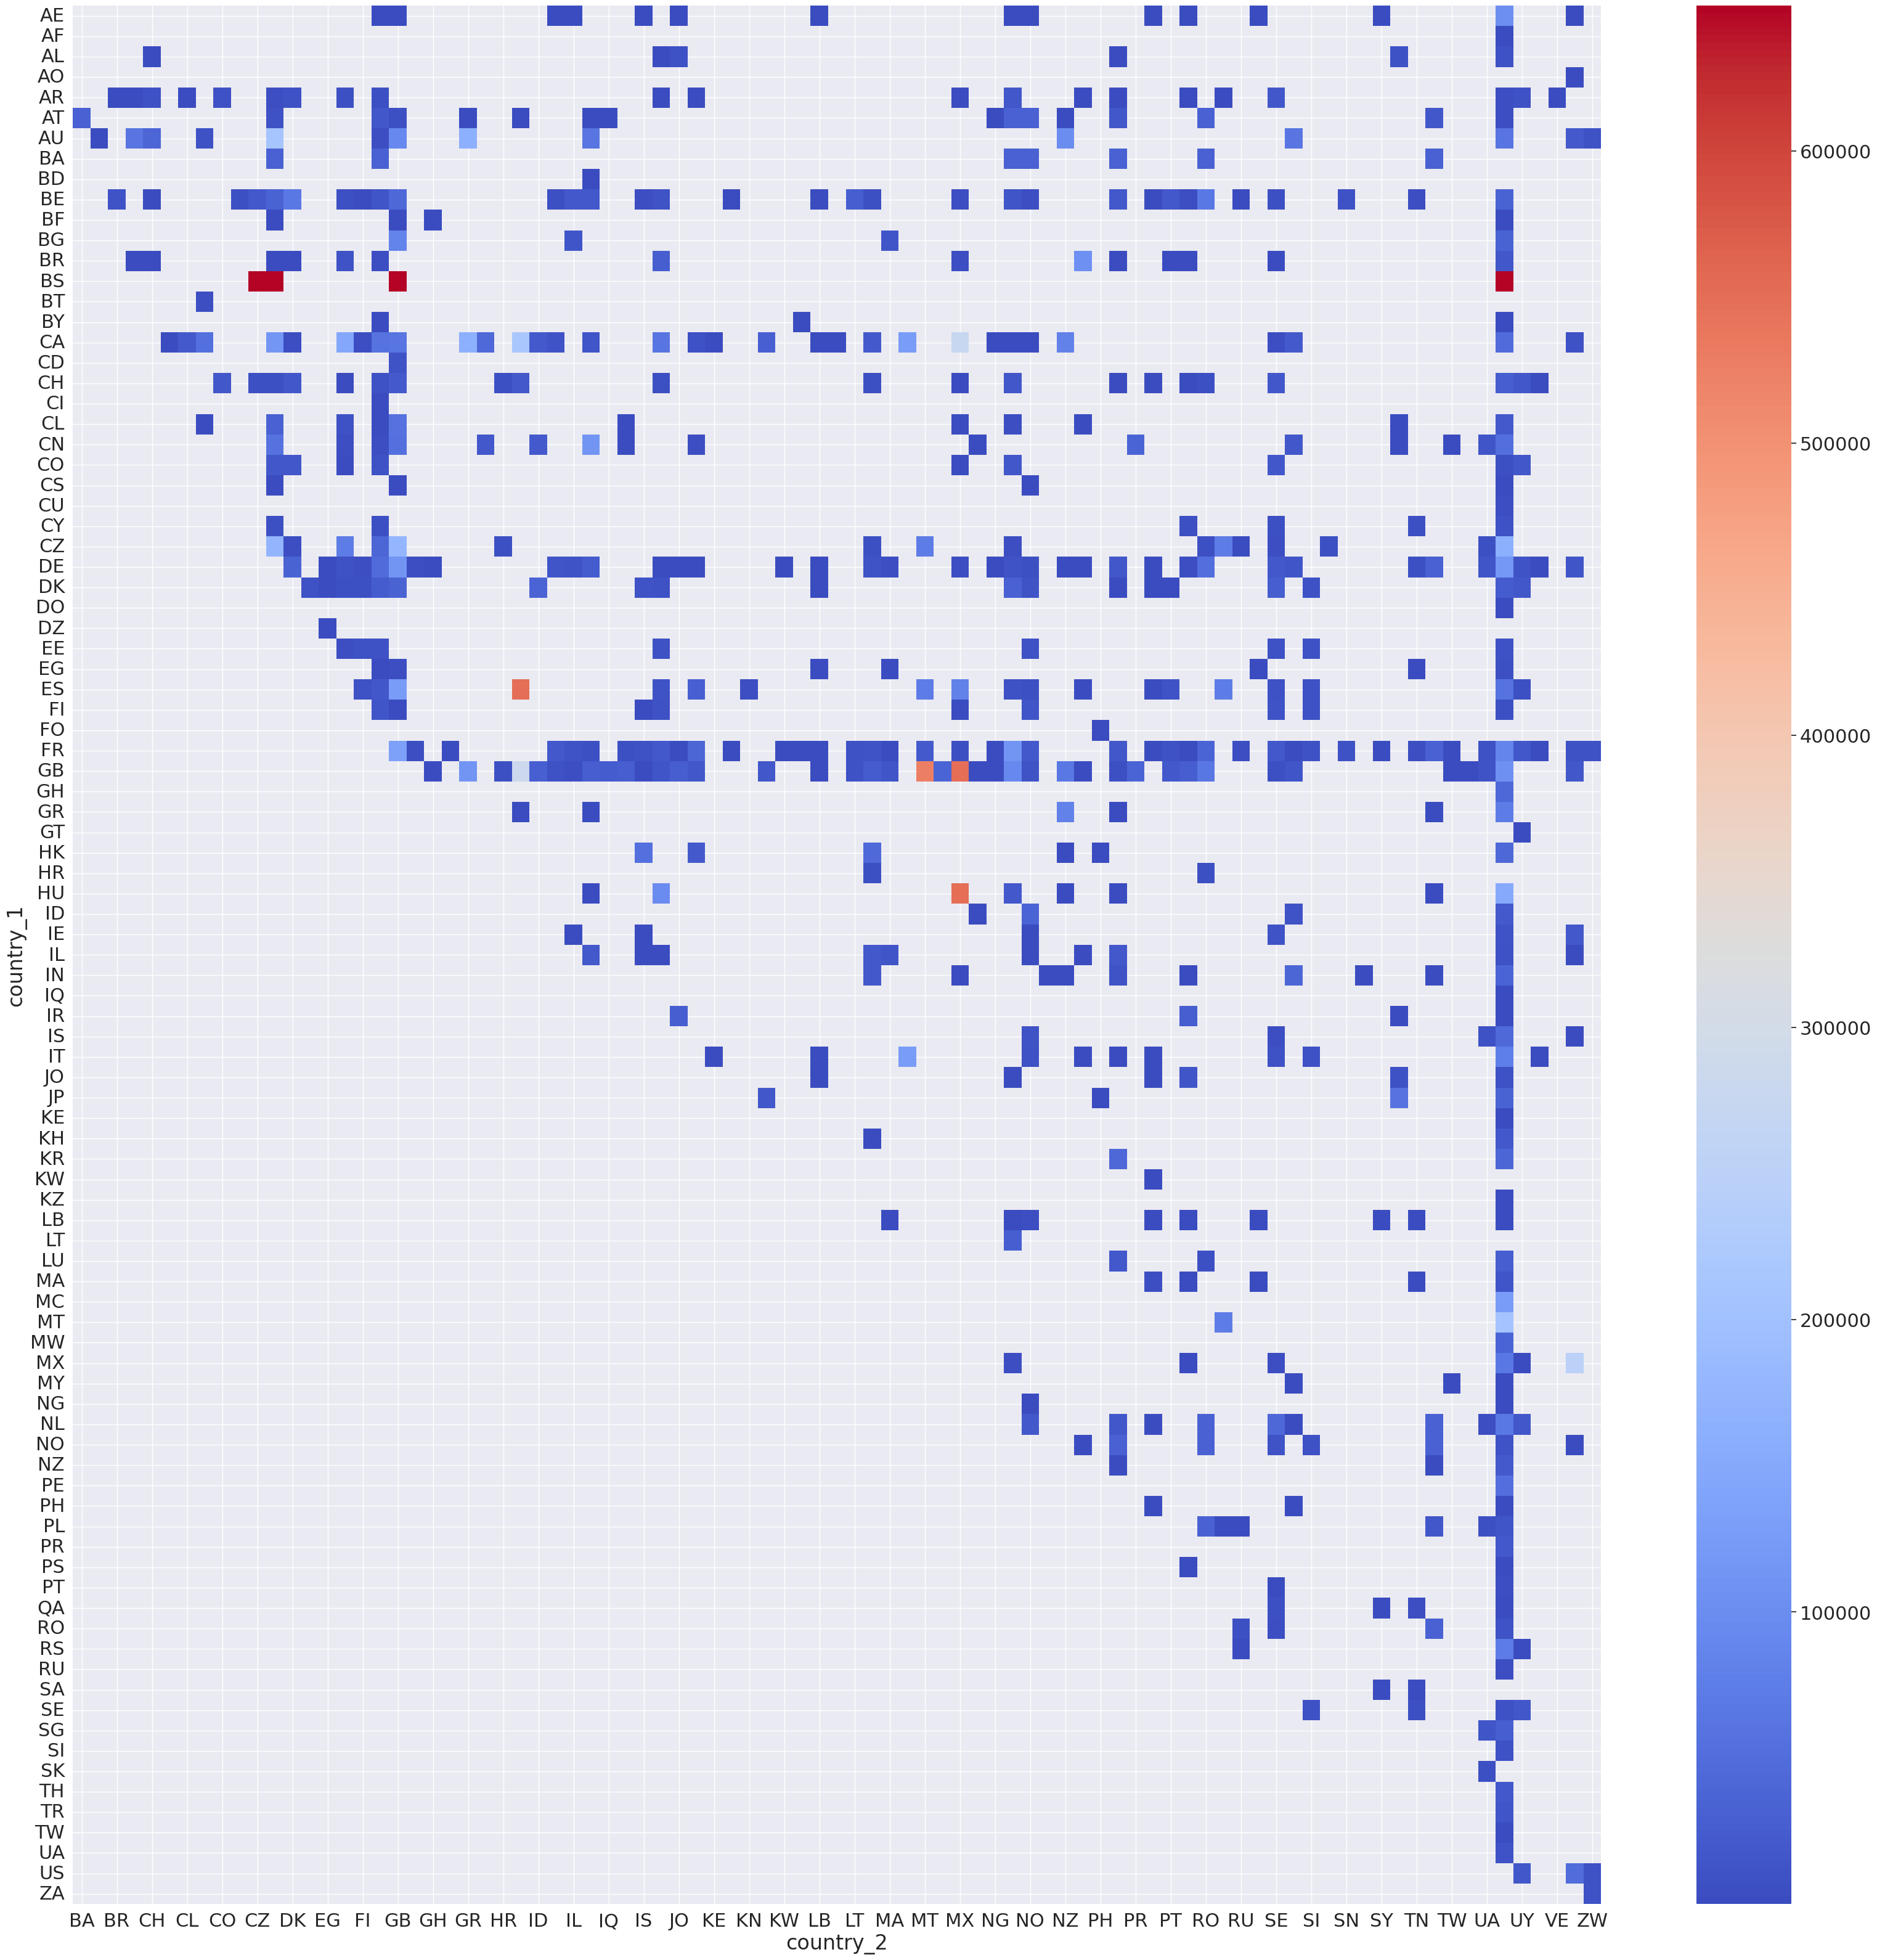

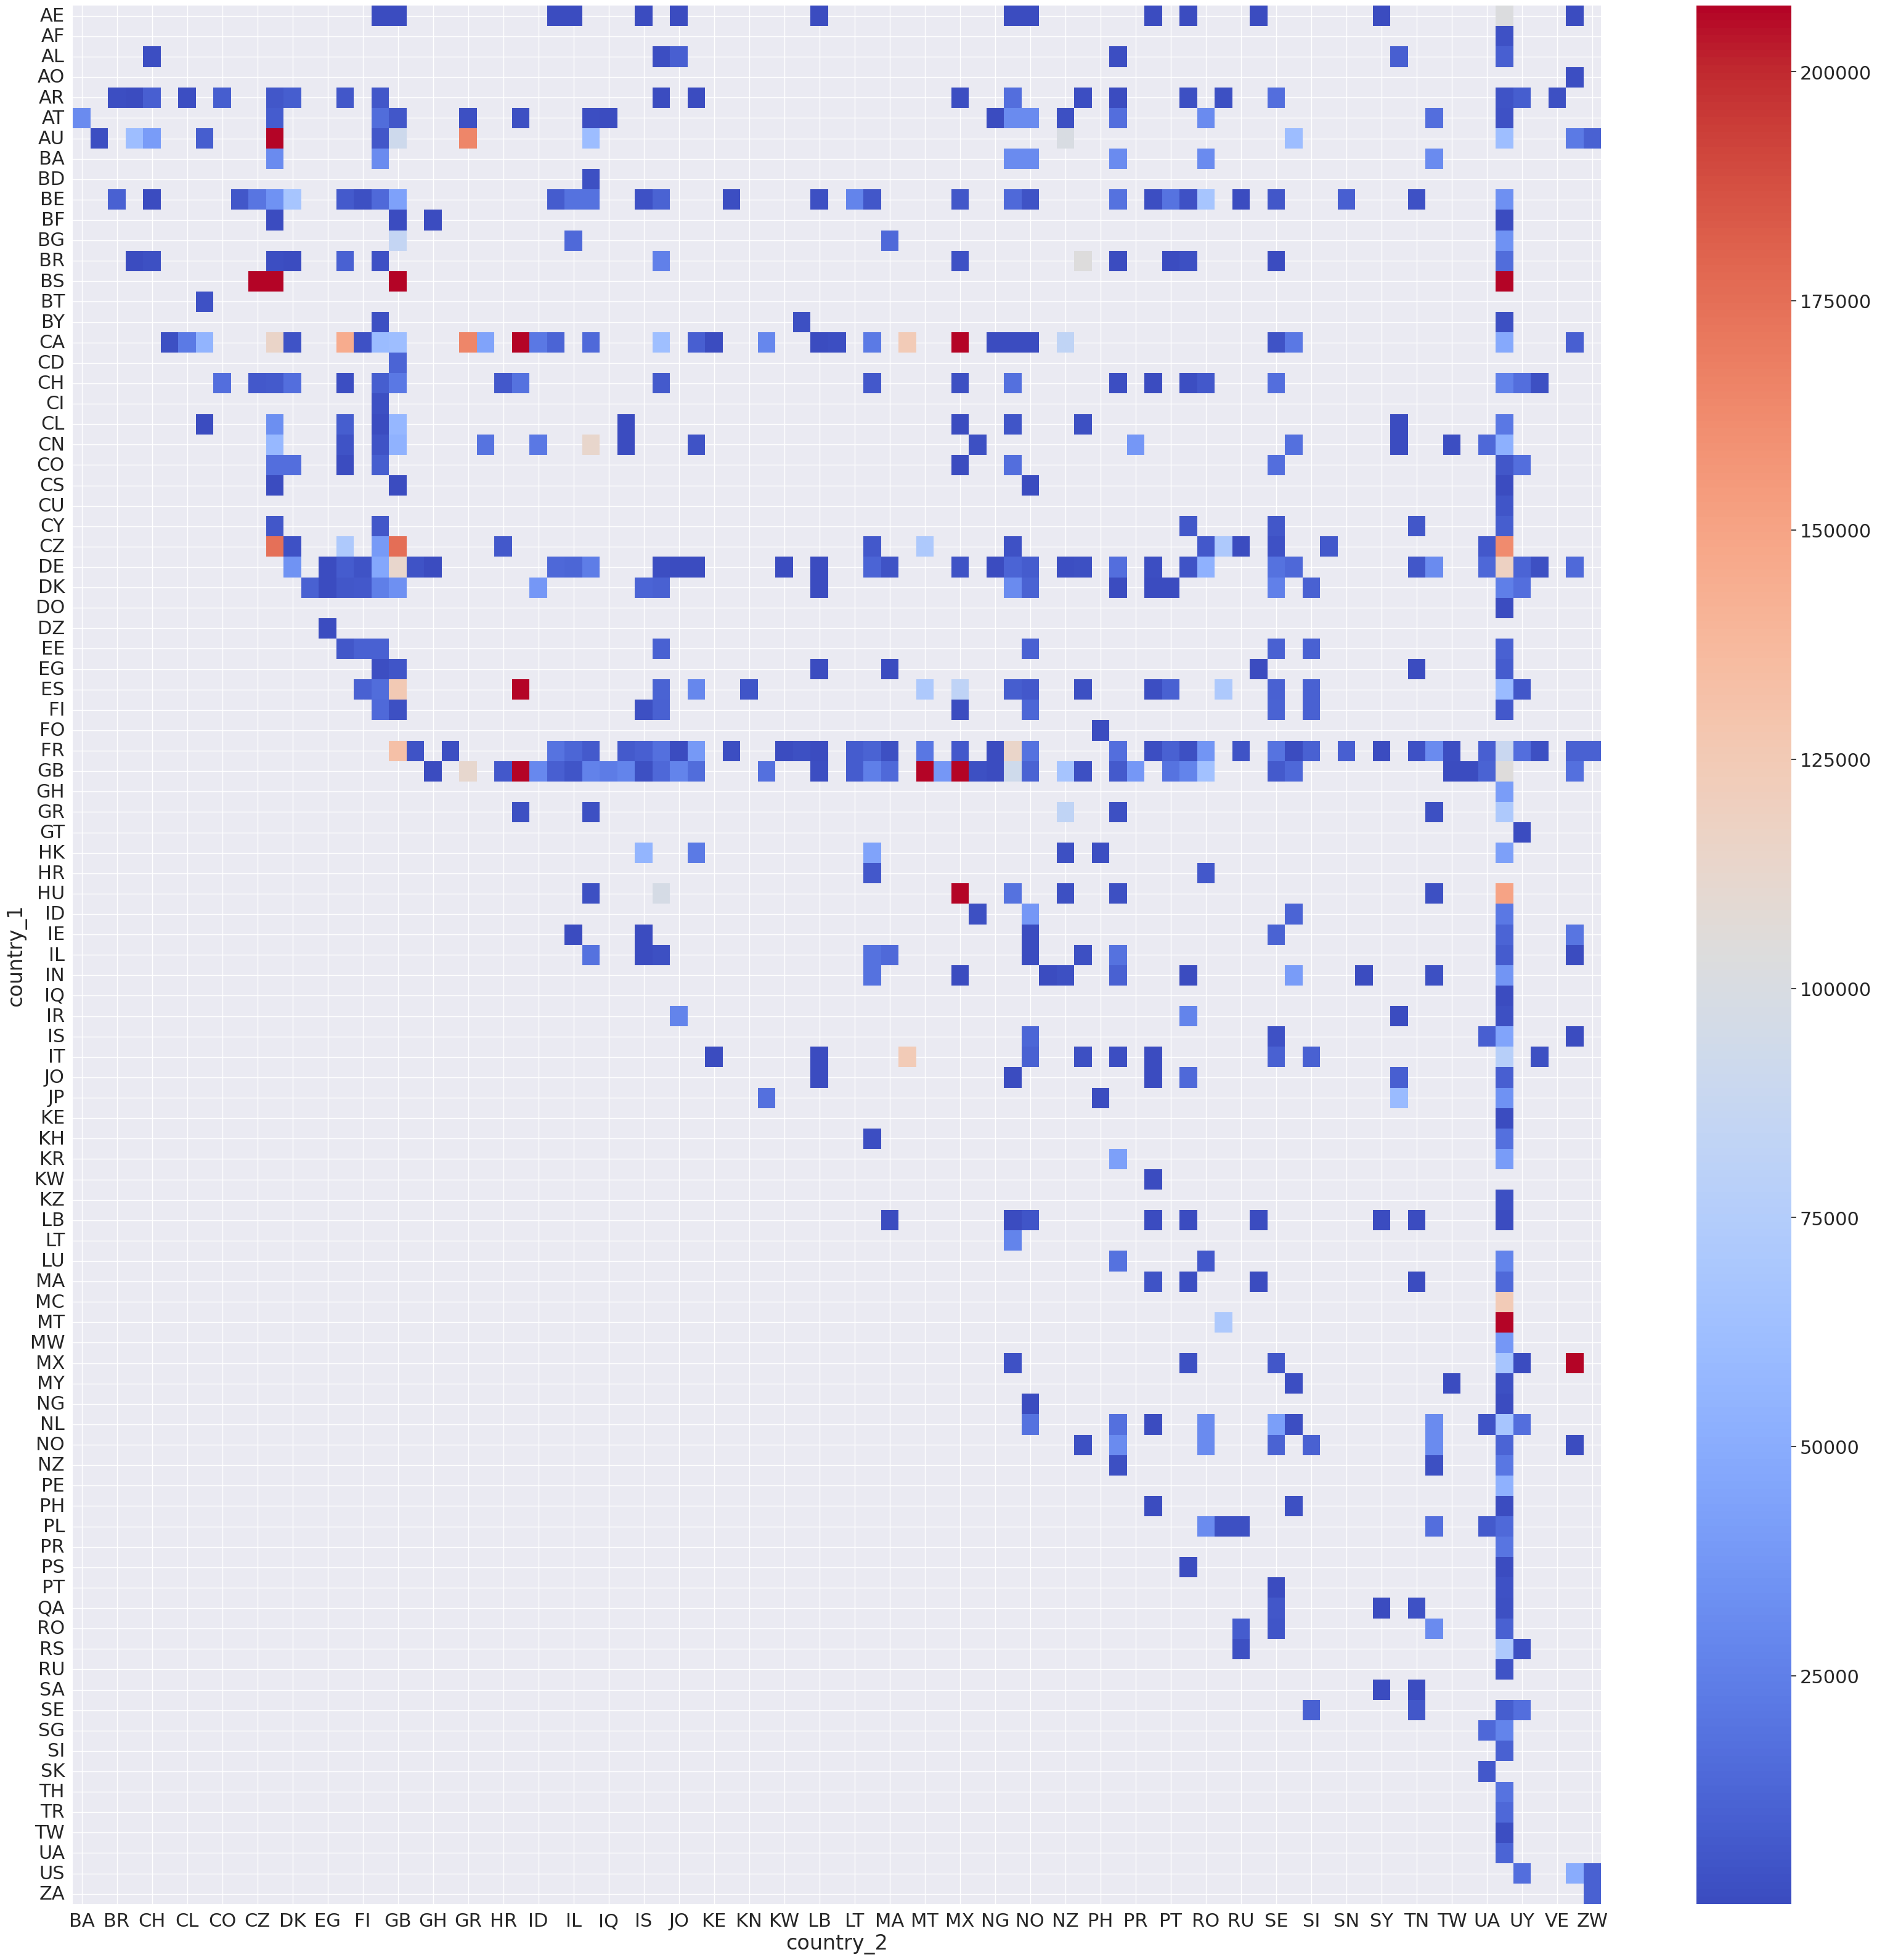

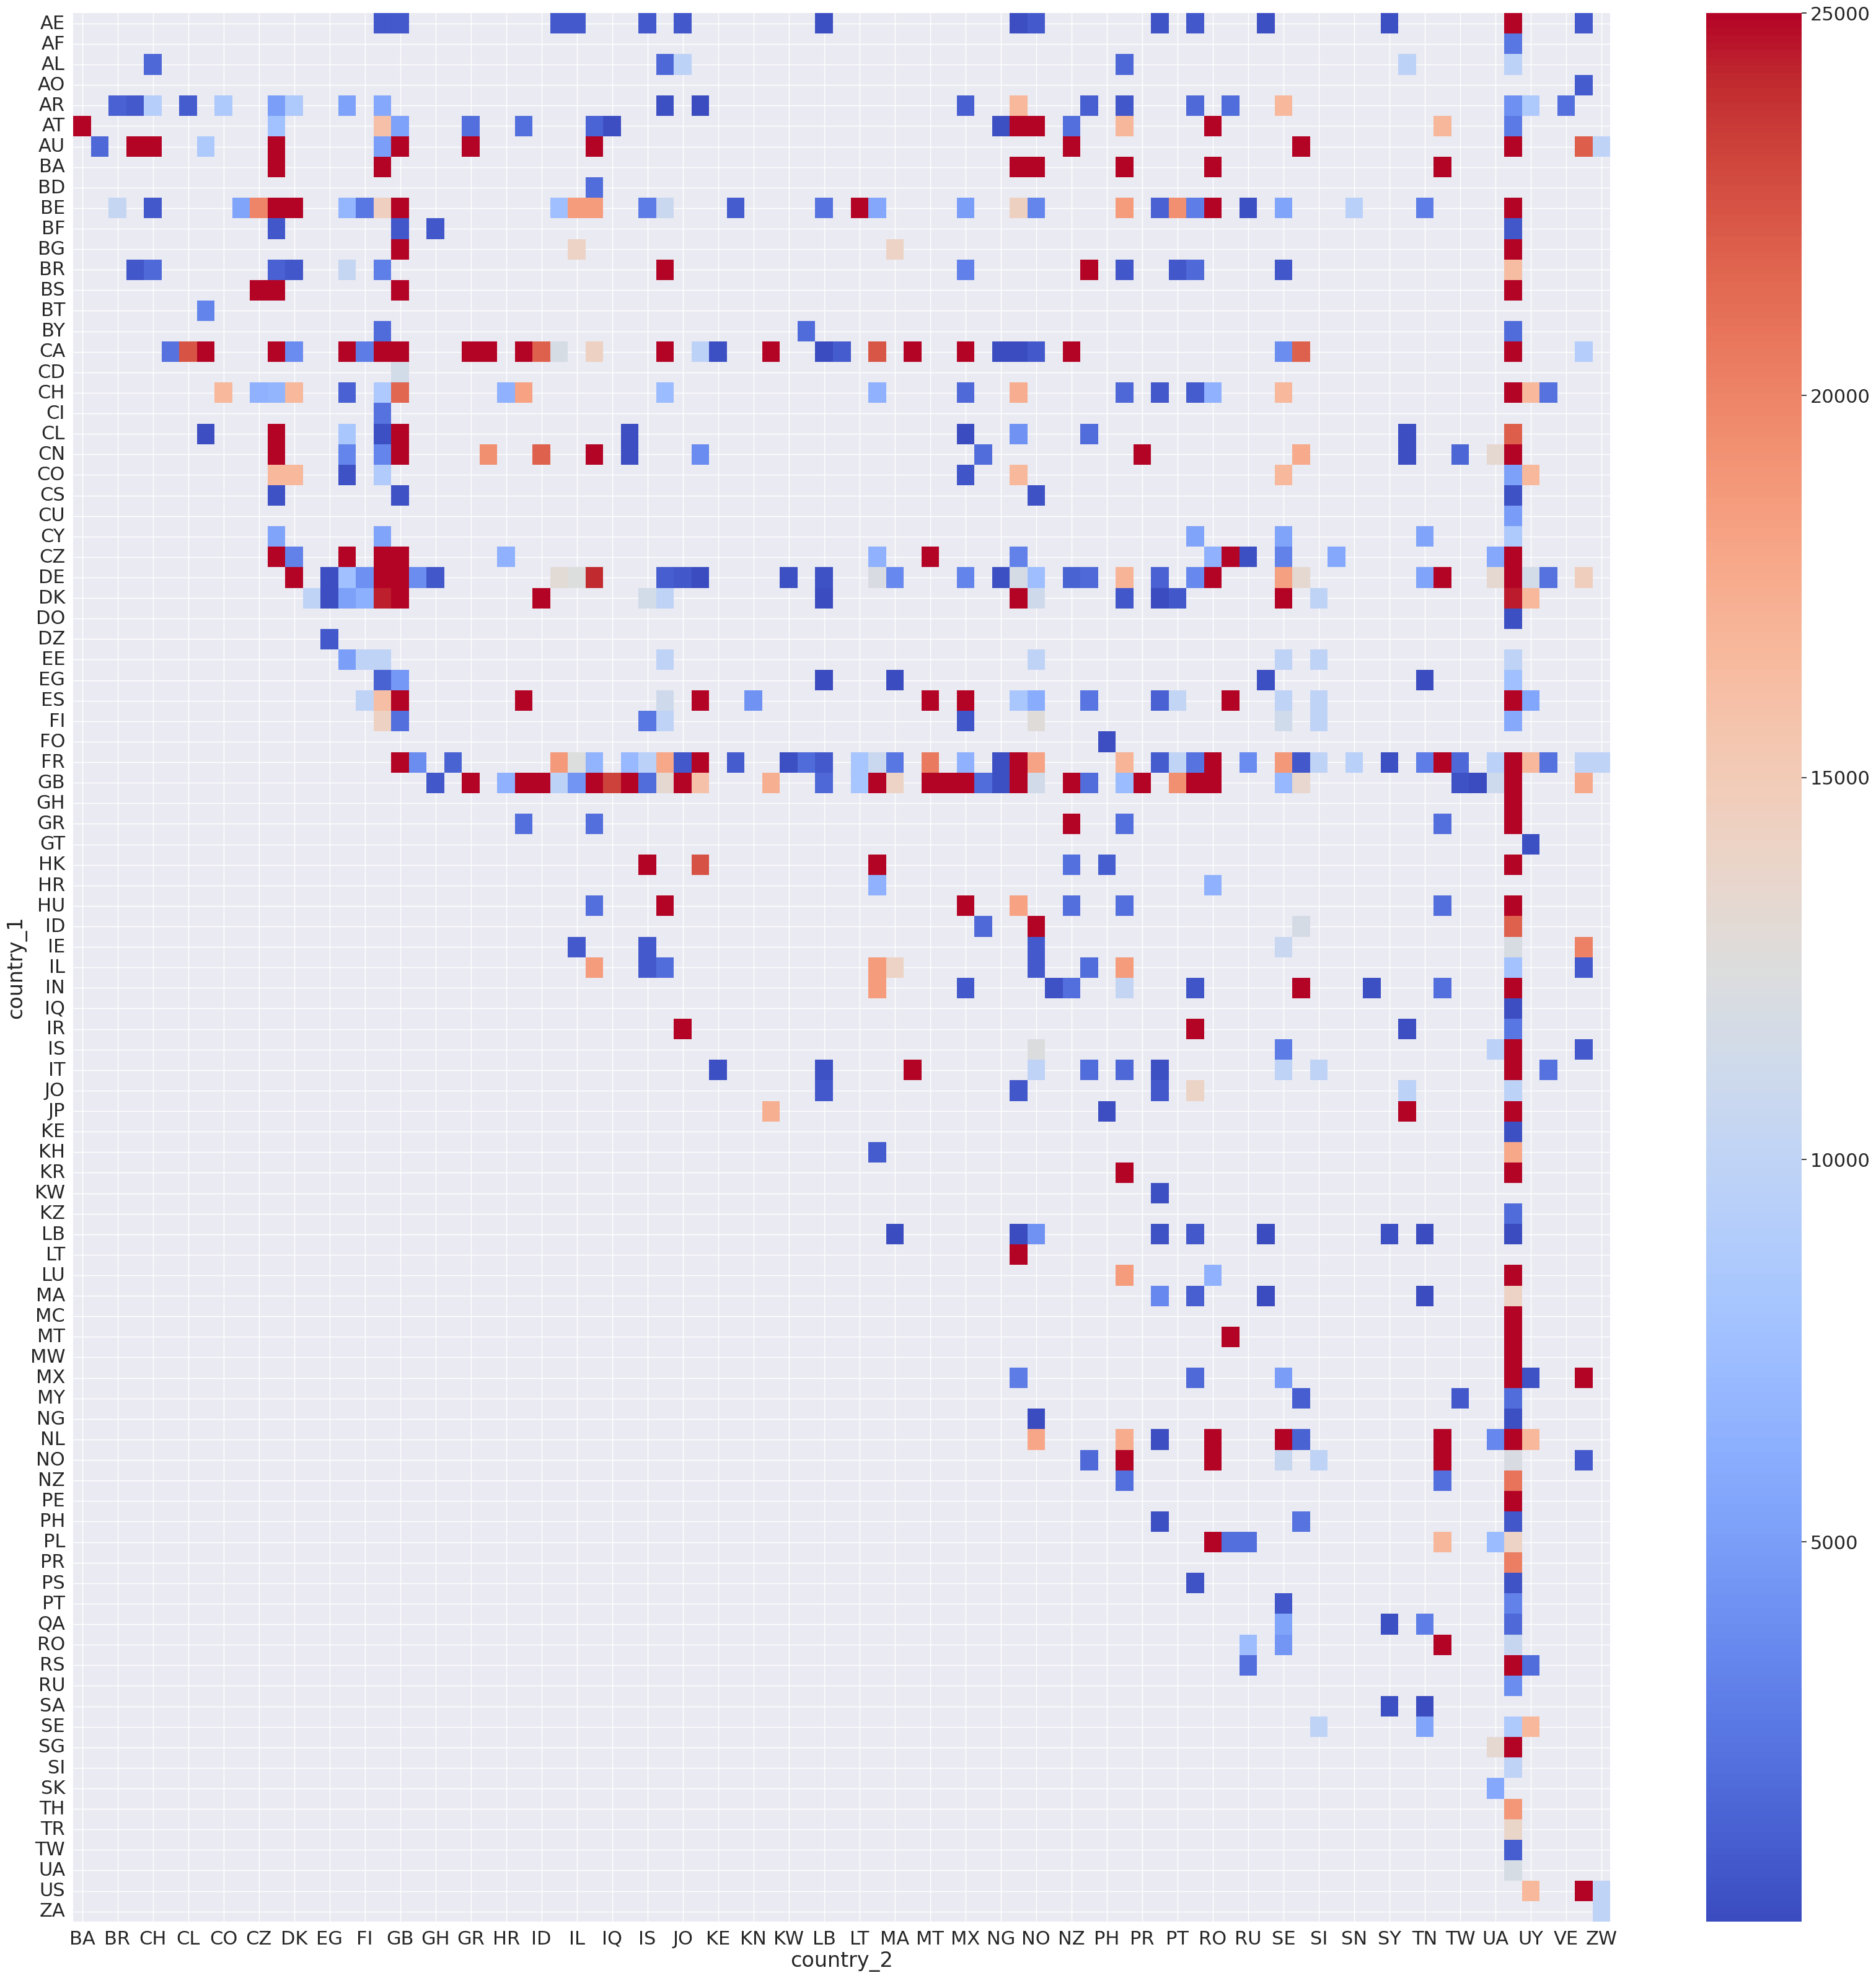

In [49]:
pivot_table = pair_df.pivot(index='country_1', columns='country_2', values='average_imdb_votes')

# W/o robustness
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.show()

# W/ robustness
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, cmap='coolwarm', robust=True)
plt.show()

# Setting max value
plt.figure(figsize=(40, 40))
sns.heatmap(pivot_table, cmap='coolwarm', vmax=25000)
plt.show()

In [ ]:
'''
Clearly, the United States seems to be a heavy co-producer in the movies/shows available on Netflix and Hulu.
Makes sense. This data was pulled from the US, so there would be more US-produced movies/shows
'''

'\nClearly, the United States seems to be a heavy co-producer in the movies/shows available on Netflix and Hulu.\nMakes sense. This data was pulled from the US, so there would be more US-produced movies/shows\n'